# Predict House Prices on the Ames Dataset🏠
### Part 1: A Real Estate Problem Analysis 

[Kaggle Competition Name](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

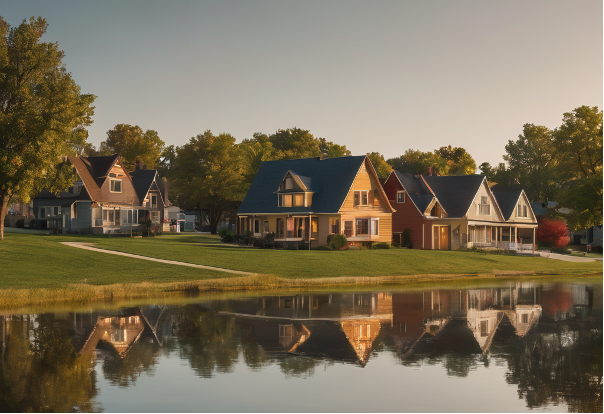

***Objective:*** Analyze various factors that help predict the sale price for houses in Ames, Iowa. 

***Packages Used:*** Pandas, Numpy, Seaborn, Matplotlib, Scipy, Sklearn

Pandas creates and manipulates dataframes, Numpy performs algebraic computations, Matplotlib and Seaborn are visualization libraries used to graphically plot the data points, Scipy for statistical calculations and Sklearn to work with machine learning algorithms.

***Scenario Brief***

During the process of finding a house, we often encounter properties deliberately priced above their actual value for the purpose of bargain or significantly under-priced to trigger bidding wars. This can make it difficult to figure out the actual cost and to assess whether the asking price aligns with the property's worth. 
Today, websites like Zillow (US), HouseSigma (Canada) provide estimates on the market value of a particular home. But we need to understand what really drives the prices to better understand the market value. With that view, in this analysis, my aim is to delve into the key features influencing property sale prices and develop a model later for pricing homes, specifically in Ames, Iowa. 

***Data***

Dataset consists of ***2,919*** residential property sales in ***Ames, Iowa between 2006 and 2010***. It was given as 2 sets. Training dataset with 1460 observations and 81 columns, contains each house’s ID and the sale price. The other dataset is the test file, which includes 1459 observations. These ***80 explanatory variables***, categorised into 19 continuous, 14 discrete, 21 nominal, and 26 ordinal variables, encapsulates every facet of the house.

* ***Continuous variables:*** Measurable data, relates to various area dimensions, such as Lot area, the basement and the porch. E.g. LotFrontage, LotArea
* ***Discrete variables:*** Measures the occurrences of elements within the house, such as  rooms, bathrooms, and parking spaces. E.g. Bedroom, FulBath
* ***Nominal variables:*** Categories with no specific order to them. Data has various types of dwellings, garages. E.g. MSZoning, Neighborhood
* ***Ordinal variables:*** Categories that can be ordered. Data rates various features within the property. E.g. OverallQual, OverallCond


Initiated the House Price analysis by importing essential libraries and modules.

In [1]:
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
#style.use('fivethirtyeight')

#for some statistics
from scipy import stats
from scipy.stats import skew, norm, boxcox_normmax, boxcox

#Encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#To show all the values within the cell
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#Ignore FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

# Models
# from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.svm import SVR
# from mlxtend.regressor import StackingCVRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

# # Misc
# from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
# from sklearn.metrics import mean_squared_error
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import scale, StandardScaler, RobustScaler
# from sklearn.decomposition import PCA


Files “train.csv” and “test.csv” were read and loaded as dataframes. Certain columns exhibit 'None' as a value, indicating the absence of that specific attribute for the house rather than a missing value. Pandas interprets a set of values, including 'None', as NaN (Not a Number) by default when reading a file. Hence, while loading the files, the list of values recognized as NaN was redefined. 

In [2]:
#Removed 'None' value from the default list of nan values as MasVnrType col as some None values which don't mean nan. It also has some missing values which are nan.
valid_none = [' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null '] #,'None']

#Loaded the datasets into the system and created dataframes 
hp_train = pd.read_csv("./Dataset Housing Kaggle/train.csv", keep_default_na=False, na_values=valid_none)
hp_test = pd.read_csv("./Dataset Housing Kaggle/test.csv", keep_default_na=False, na_values=valid_none)

I’ll perform the analysis on Train set. Although, in order to not repeat our cleaning steps twice (both for train and test), will concatenate both datasets, to make a single dataframe, hp. This dataset will be separated just before the modelling step. Before concatenating them, have added a column which will differentiate both sets.

In [3]:
#Combining train and test datasets together so that we can do all the work at once. 
hp_train['Data_type'] = 'Train'
hp_test['Data_type'] = 'Test'

#Concat combines dfs with overlapping cols & returns everything. Cols outside the intersection will be filled with NaN
hp = pd.concat([hp_train, hp_test], axis = 0)

print(hp_train.shape, hp_test.shape, hp.shape)

(1460, 82) (1459, 81) (2919, 82)


In [4]:
hp_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
hp_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [6]:
hp['YrSold'].unique()#.sort_values()

array([2008, 2007, 2006, 2009, 2010])

In [7]:
print('unique column values')
hp_train.apply(lambda x: len(x.unique())).sort_values(ascending=False)

unique column values


Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        328
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       111
GarageYrBlt        98
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
SaleType            9
OverallCond         9
Condition1          9
HouseStyle          8
PoolArea            8
Condition2          8
BedroomAbvGr        8
RoofMatl            8
Functional          7
GarageType          7
BsmtFinType1        7
BsmtFinType2        7
FireplaceQu         6
GarageQual          6
GarageCond          6
Heating   

In [8]:
hp_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# 1. Exploratory Data Analysis

EDA involves delving into the dataset to unveil patterns, correlations, and anomalies. Through EDA, we gain insight into the factors that significantly impact a house's value by examining the data closely.

## 1.1 Univariate Analysis

### A. Analysing the Target Variable

A quick analysis of ‘SalePrice’ through describe() method shows that Mean is substantially higher than the 50th percentile or median, suggesting the presence of outliers or skewed distribution in the data.

In [9]:
hp_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Minimum sale price is larger than zero
* Mean value substantially higher than the 50th percentile or median value suggests presence of outliers or skewed distribution in the data.
* Minimum, maximum, and average sale prices are 34900, 755000, and 180921 respectively.

<Axes: xlabel='SalePrice'>

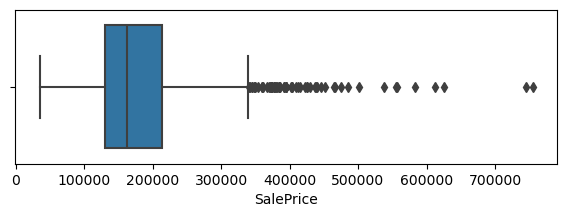

In [10]:
plt.figure(figsize=(7,2))
sns.boxplot(x = hp_train['SalePrice'])

In [11]:
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(5,4))
# #sns.histplot(hp_train.SalePrice, bins=25)
# sns.distplot(hp_train['SalePrice'], fit=norm);
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 1))
# plt.xlabel("House Sales Price (10^5) in USD")
# plt.ylabel("Number of Houses")
# plt.title("House Sale Price Distribution")
# plt.show()

# fig = plt.figure()
# res = stats.probplot(hp_train['SalePrice'], plot=plt)

Since the initial analysis suggested the skewness in distribution, let’s take a look at the distribution first. Histograms are a great way to analyze the distribution of numerical variables. For it to be a normal distribution, that is the assumption of some models, distribution should closely follow the diagonal that represents the normal distribution, in the graph.

/var/folders/0_/hkxp5tnx7ls1223y5s_0vk700000gn/T/ipykernel_25277/122952536.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp_train['SalePrice'], fit=norm, ax=axs[0, 0])
/var/folders/0_/hkxp5tnx7ls1223y5s_0vk700000gn/T/ipykernel_25277/122952536.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

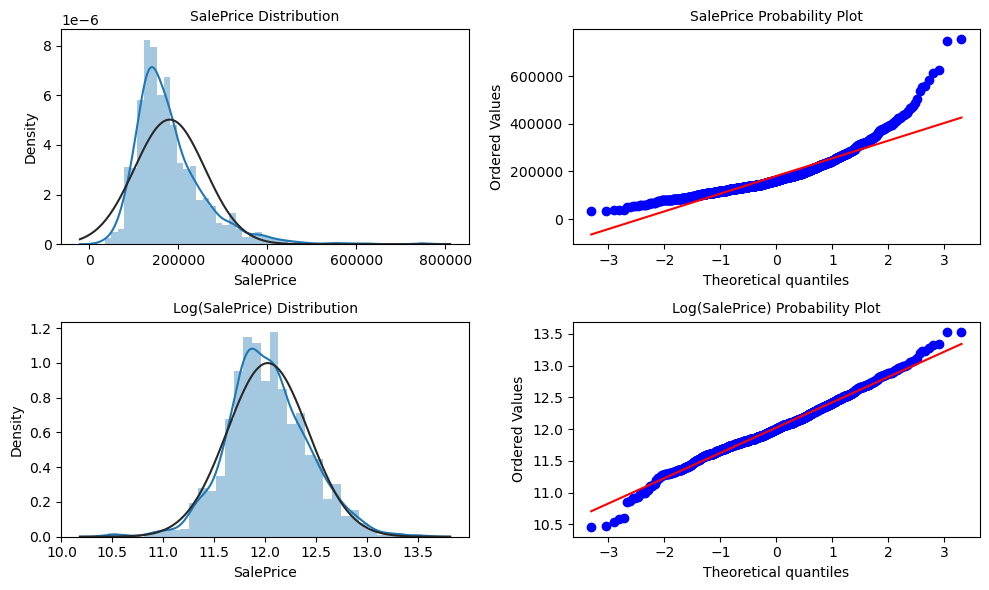

In [12]:
#Create a figure with a grid of four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

#Plot the first graph in the upper-left subplot
#sns.histplot(np.log(hp_train.SalePrice), bins = 25) #As distplot is getting deprecated, will need to work with histplot or displot later
sns.distplot(hp_train['SalePrice'], fit=norm, ax=axs[0, 0])
axs[0, 0].set_title('SalePrice Distribution', size=10)

#Plot the second graph in the upper-right subplot
res1 = stats.probplot(hp_train['SalePrice'], plot=axs[0, 1])
axs[0, 1].set_title('SalePrice Probability Plot', size=10)

#Checking Logarithimic distribution of SalesPrice. To bring the distribution to Normal distribution
# Plot the third graph in the lower-left subplot
sns.distplot(np.log(hp_train['SalePrice']), fit=norm, ax=axs[1, 0])
axs[1, 0].set_title('Log(SalePrice) Distribution', size=10)

#Plot the fourth graph in the lower-right subplot
res2 = stats.probplot(np.log(hp_train['SalePrice']), plot=axs[1, 1])
axs[1, 1].set_title('Log(SalePrice) Probability Plot', size=10)

plt.tight_layout()
plt.show()

Data distribution should closely follow the diagonal that represents the normal distribution.

In [13]:
print('Skew is:', hp_train.SalePrice.skew())
print('Kurtosis:', hp_train.SalePrice.kurt())

Skew is: 1.8828757597682129
Kurtosis: 6.536281860064529


***Observation on Target Variable:***
* SalePrice Distribution plot shows deviation from the normal distribution.
* Positive skewness visible as right-handed tail is larger than left-handed tail. Skewed to the right, towards more expensive homes.
* Kurtosis > 3 shows heavier tails than a normal distribution
* Data distribution should closely follow the diagonal that represents the normal distribution in the second figure.

Need to make the target variable normally distributed. This is because if we want to create any linear model, it is essential that the features are normally distributed. In case of positive skewness, log transformations usually works well

In [14]:
print("Skew is:", np.log(hp_train.SalePrice).skew())
print("Kurtosis:", np.log(hp_train.SalePrice).kurt())

Skew is: 0.12133506220520406
Kurtosis: 0.8095319958036296


Let’s understand the observations.
* ***Skewness*** is described as a measure of a dataset’s symmetry. Normal distribution has a skewness of 0. The distribution of SalePrice is skewed-right, i.e. the mean is greater than the median. The more skewed the data, the less accurate the prediction will be.
* ***Kurtosis*** 
    * If the kurtosis > 3, then the dataset has heavier tails than a normal distribution. 
	* If the kurtosis < 3, then the dataset has lighter tails than a normal distribution.
	* In our case, its High kurtosis representing heavy tails, meaning more outliers.

As certain statistical models fit better on normally distributed data, need to transform the target variable. In this case, I'll apply a logarithmic transformation to the target variable. By doing so, it's possible to compress larger values while expanding smaller ones, often resulting in a more symmetric distribution. That is, it ensures that discrepancies in relative errors between less expensive and more costly homes are handled consistently.
Note: This approach assumes positive values since logarithm is not defined for zero or negative numbers, which aligns with our target variable.

Furthermore, Kaggle competition specifies that “ Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.” Hence, should assume log(SalePrice) as our true target variable.


Normalizing Target by converting to log value 

In [15]:
#SalePrice doesn't have 0 or -ve values so can apply Log. If presence of 0, would have applied Log(1+x): log1p(x) 
hp.SalePrice = np.log(hp.SalePrice)
#hp.rename(columns={'SalePrice': 'Log_SalePrice'}, inplace=True)

In [16]:
# #Checking Logarithimic distribution of SalesPrice. To bring the distribution to Normal distribution
# #sns.histplot(np.log(hp_train.SalePrice), bins = 25)
# sns.distplot(np.log(hp_train['SalePrice']), fit=norm);
# plt.xlabel("log(House Sales Price) in USD")
# plt.ylabel("Number of Houses")
# plt.title("House Sales Price Distribution")

# fig = plt.figure()
# res = stats.probplot(hp_train['SalePrice'], plot=plt)

### B. Analysing the Predictor Variables - Numerical Variables

Let’s start analysing predictor variables by first focusing on the numerical variables. There are 38 numerical columns. I’ll first filter out all the numerical and categorical variables from the features. For the purpose of visualization will divide the variables into numerical, ordinal and nominal variables. 

In [17]:
#Continuous features
numerical_cols = [col for col in hp.columns if hp.dtypes[col] != 'object']
print("Numerical features:",len(numerical_cols), '\n', numerical_cols, '\n')

Numerical features: 38 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 



Since some numerical features have ordinal nature, will work with them under categorical variables
['OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

##### Visualisation of Numerical Features through Box Plot

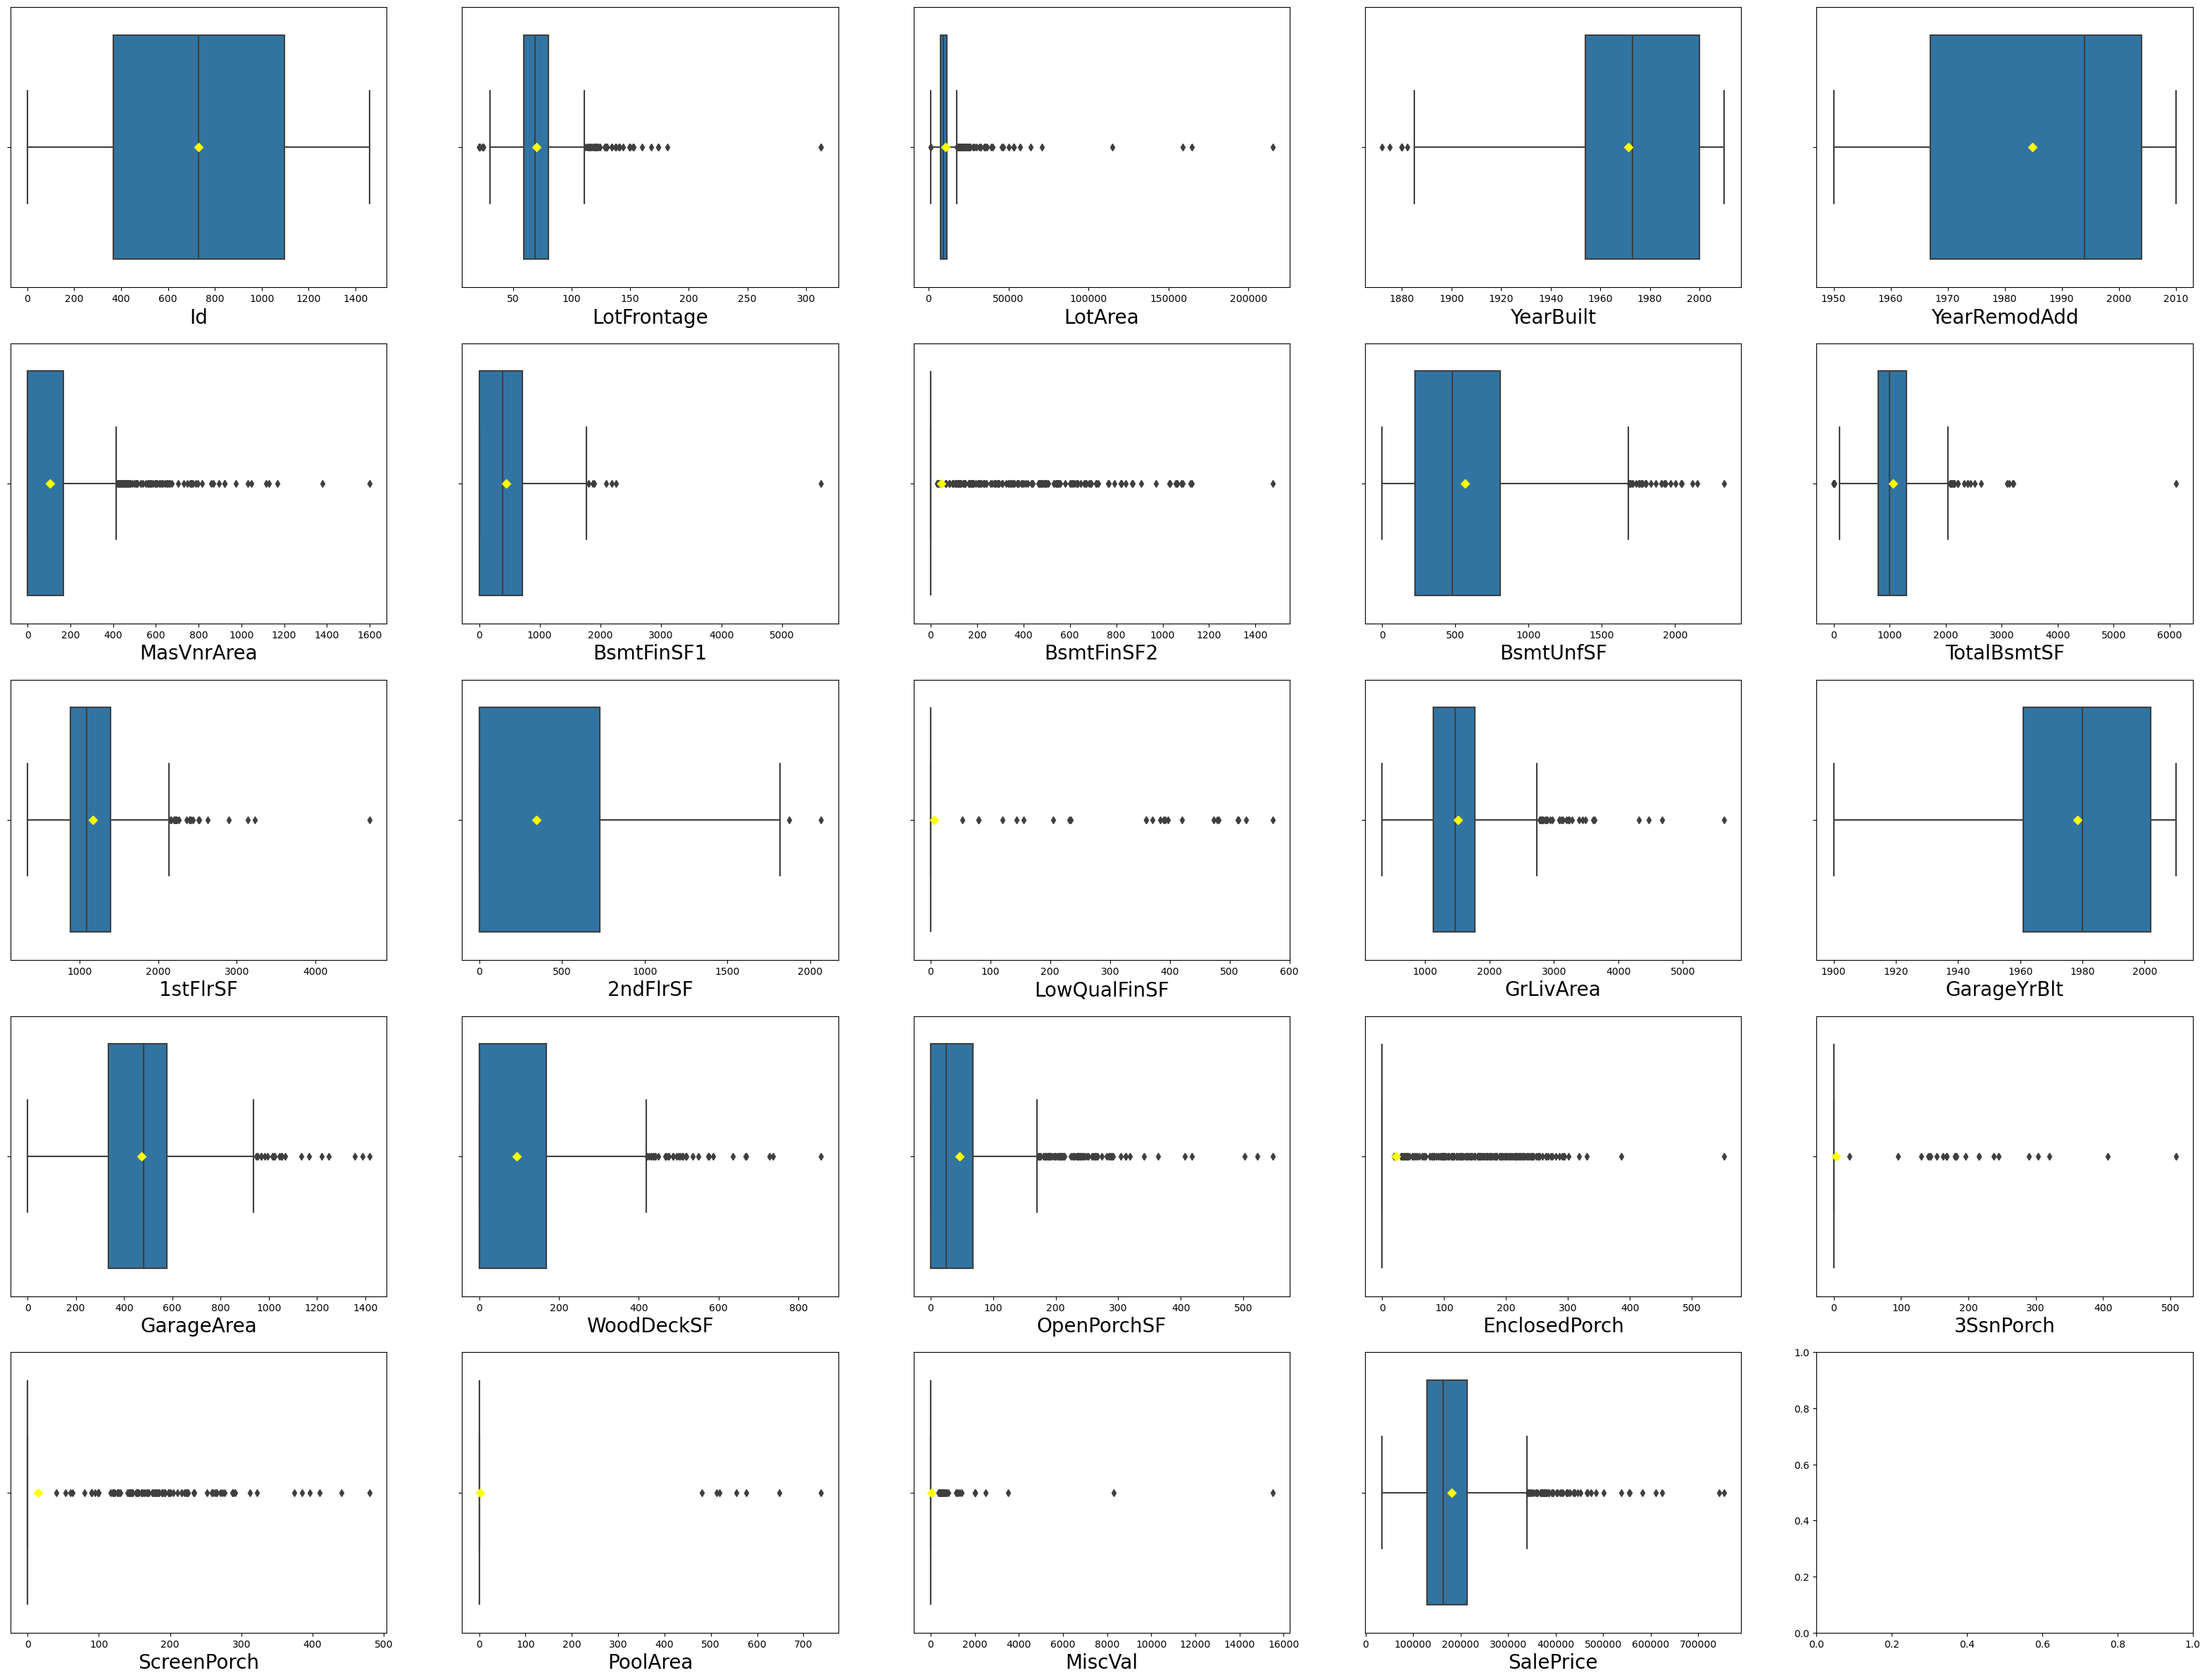

In [18]:
num = [col for col in numerical_cols if col not in ['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 
'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']]

ncols = 5
nrows = int(np.ceil(len(num)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 30))
for i, feature in enumerate(num, 1):
    plt.subplot(nrows, ncols, i) 
    sns.boxplot(x=hp_train[feature], showmeans=True, meanprops={"marker":"D", "markerfacecolor":"yellow", 
                                                                "markeredgecolor":"yellow"})
    plt.xlabel(feature, size=20)
    
plt.show()

***Observations***
* Almost all the variables show ***presence of outliers***. Feature '2ndFlrSF' shows least outliers. 
* A lot of variables show presence of an ***outlier on extreme right, secluded from other outliers***. (Features like LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, WoodDeckSF and so on)
* Features like MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, LowQualFinSF, BsmtFinSF2 show ***outliers and a line only**** means data is highly skewed or highly concentrated around a narrow range of values. This configuration indicates a lack of substantial variability within the dataset.
* A few features like LotFrontage, LotArea, GrLivArea have ***symmetrical distribution within the quartiles but with several extreme values*** located far from the bulk of the data. Despite the symmetry within the quartiles, the presence of numerous outliers indicates that dataset deviates from a normal distribution.

In [19]:
hp_train['LotFrontage'][hp_train['LotFrontage'] > 200]

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

In [20]:
hp_train['LotArea'][hp_train['LotArea']>100000]

249    159000
313    215245
335    164660
706    115149
Name: LotArea, dtype: int64

In [21]:
hp_train['MasVnrArea'][hp_train['MasVnrArea']>1250]

297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [22]:
hp_train['BsmtFinSF1'][hp_train['BsmtFinSF1']>5000]

1298    5644
Name: BsmtFinSF1, dtype: int64

In [23]:
hp_train['BsmtFinSF2'][hp_train['BsmtFinSF2']>1400]

322    1474
Name: BsmtFinSF2, dtype: int64

In [24]:
hp_train['TotalBsmtSF'][hp_train['TotalBsmtSF']>6000]

1298    6110
Name: TotalBsmtSF, dtype: int64

In [25]:
hp_train['1stFlrSF'][hp_train['1stFlrSF']>4000]

1298    4692
Name: 1stFlrSF, dtype: int64

In [26]:
hp_train['GrLivArea'][hp_train['GrLivArea']>5000]

1298    5642
Name: GrLivArea, dtype: int64

In [27]:
hp_train['EnclosedPorch'][hp_train['EnclosedPorch']> 500]

197    552
Name: EnclosedPorch, dtype: int64

In [28]:
hp_train['MiscVal'][hp_train['MiscVal'] > 7500]

346     15500
1230     8300
Name: MiscVal, dtype: int64

In [29]:
hp_train['SalePrice'][hp_train['SalePrice']>700000]

691     755000
1182    745000
Name: SalePrice, dtype: int64

In [30]:
#Some of the non-numeric predictors are stored as numbers. Convert them into strings 
hp['MSSubClass'] = hp['MSSubClass'].astype(str)

numerical_cols.remove('MSSubClass')

### C. Analysing the Categorical Variables - Ordinal

Ordinal features are a type of categorical variable that possess an inherent order or ranking among its categories.

In [31]:
#Categorical features
categorical_cols = [col for col in hp.columns if hp.dtypes[col] == 'object']
print("Categorical features:",len(categorical_cols), '\n', categorical_cols)

Categorical features: 45 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Data_type']


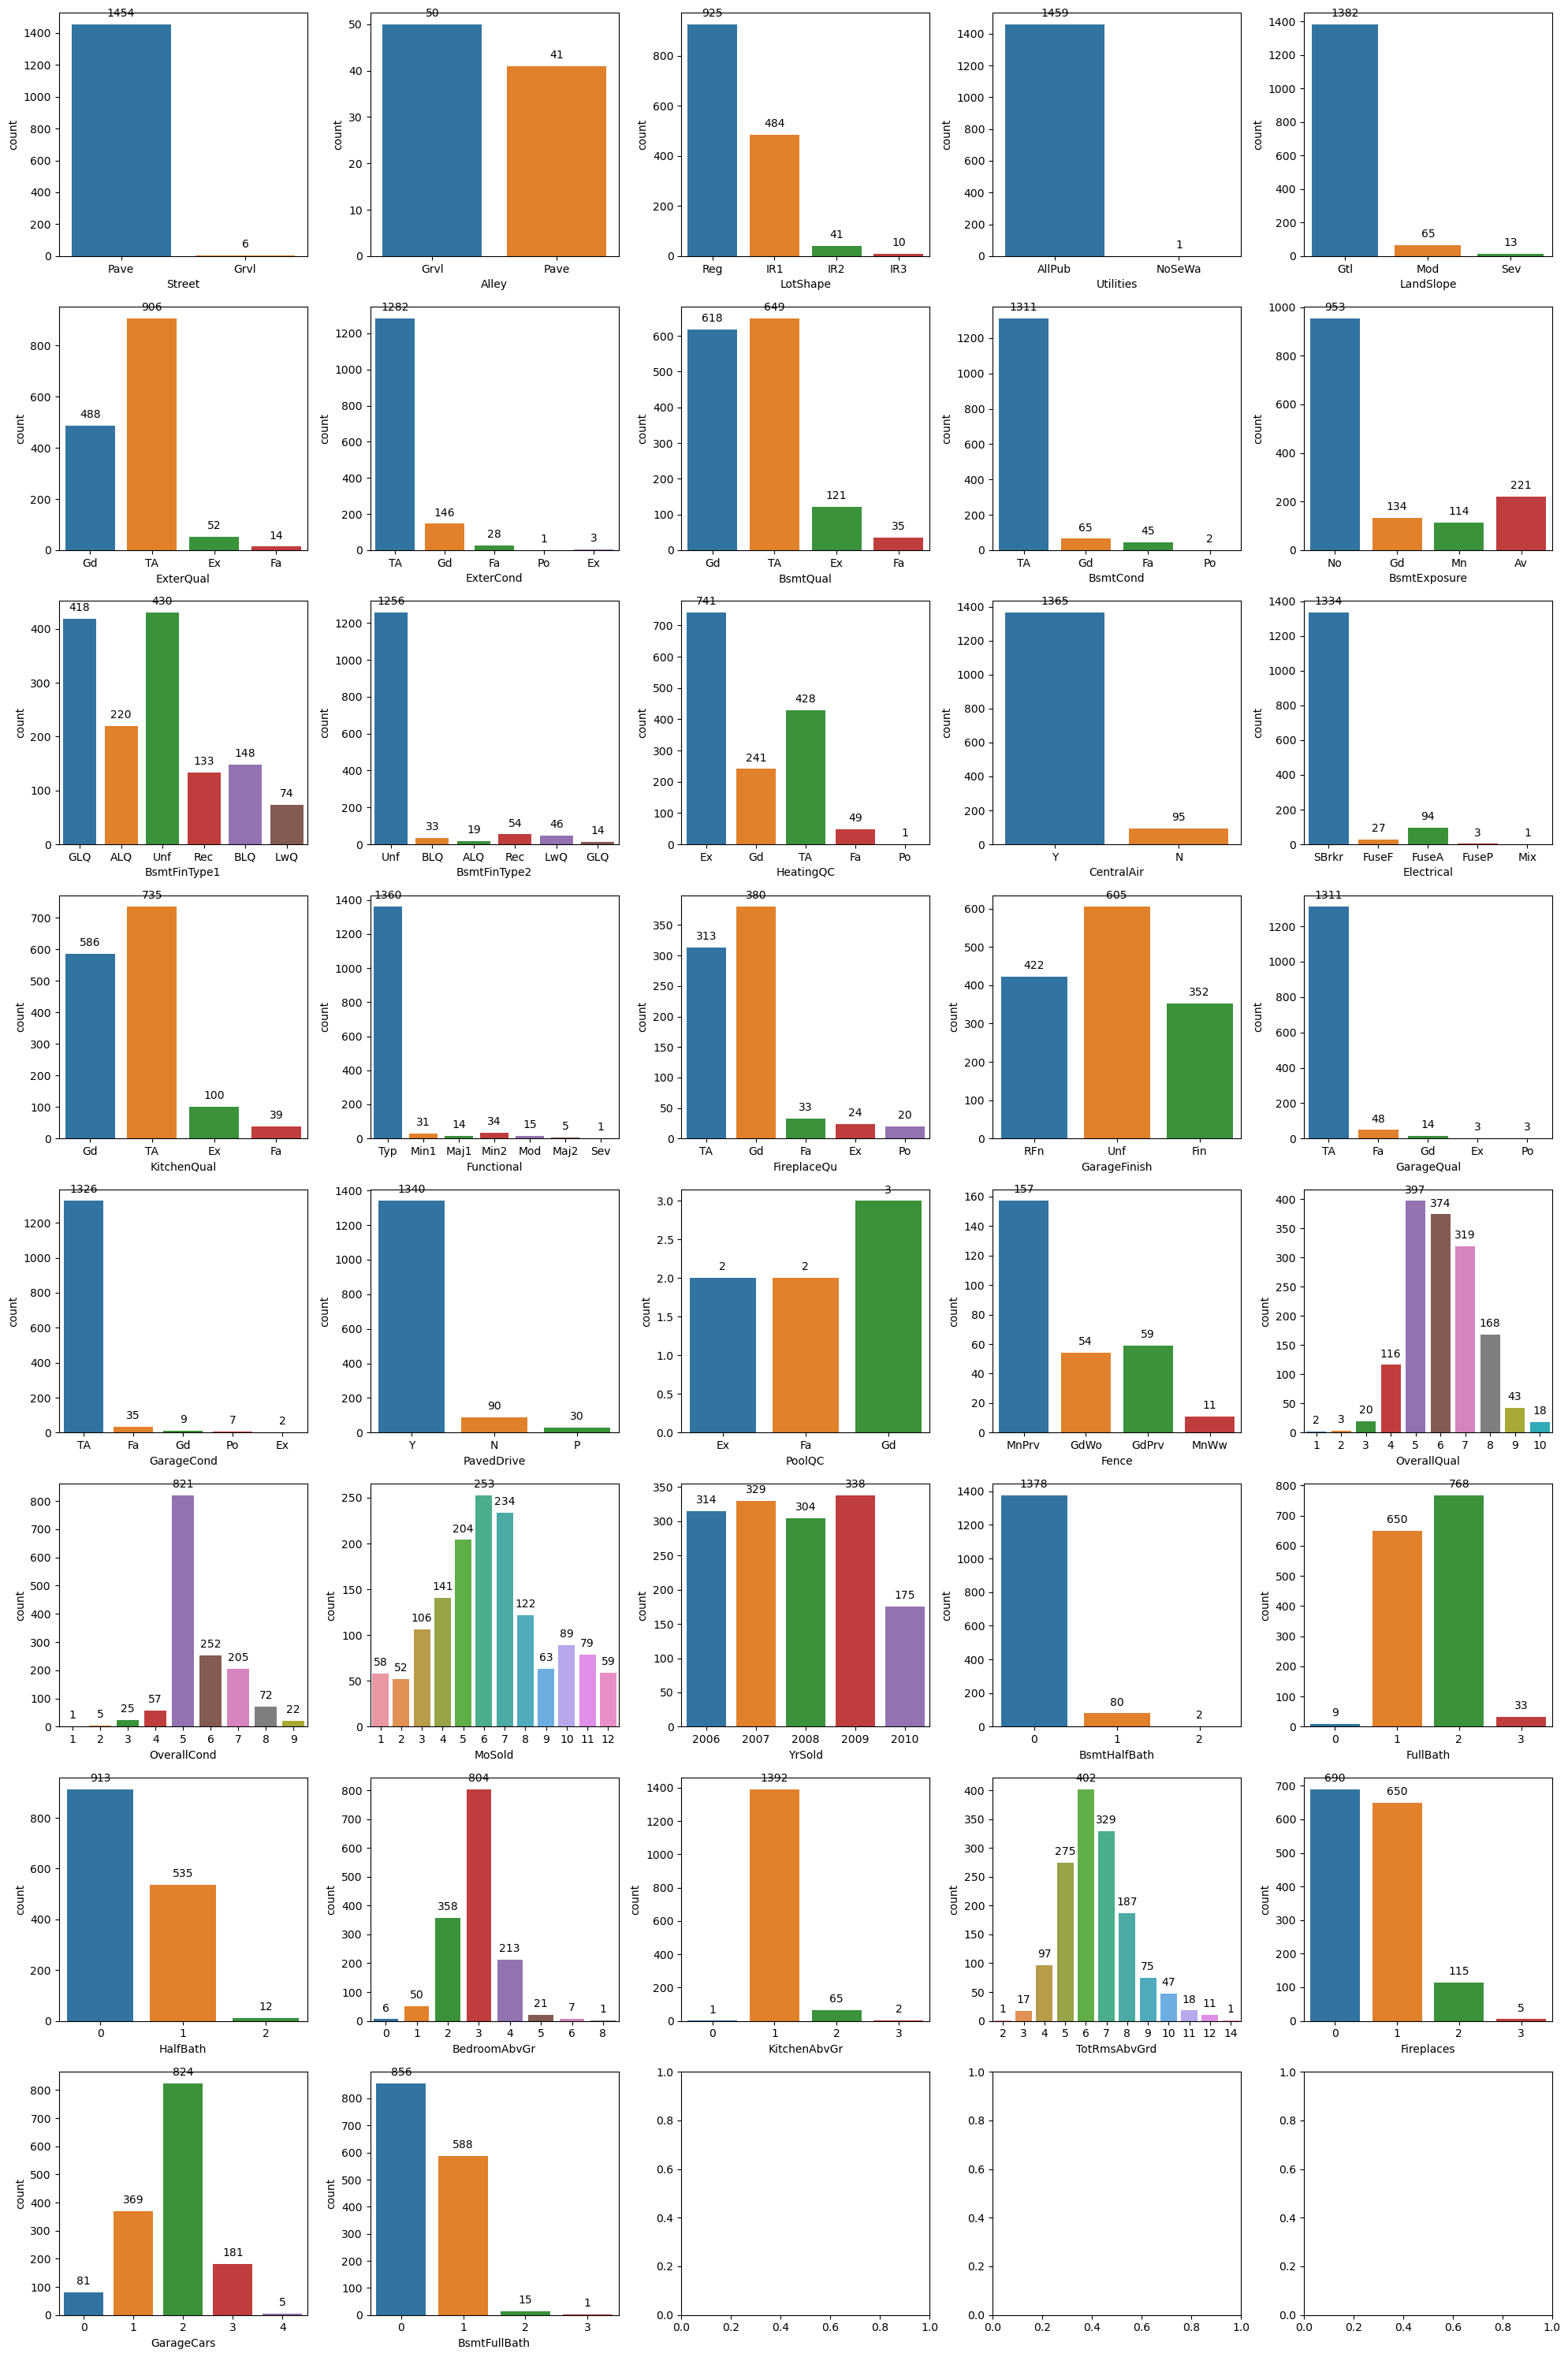

In [32]:
ordinal = ['Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
           'Functional','FireplaceQu', 'GarageFinish','GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
           #numerical variables which are ordinal in nature hence, considered here.
           'OverallQual','OverallCond', 'MoSold', 'YrSold', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'BsmtFullBath']

ncols = 5
nrows = int(np.ceil(len(ordinal)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))
for i, feature in enumerate(ordinal, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.countplot(x=feature, data=hp_train)
    plt.tight_layout()
    
    # Adding count annotations to the bars
    for p in axs.flatten()[i - 1].patches:
        axs.flatten()[i - 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()
plt.close()

***Observations***
* (Street) The type of road access to property is Paved.
* (Utilities) Almost all the houses have all necessary public utilities: Electricity, Gas, and Water.
* (CentralAir) Houses have central air conditioning
* (MSSubClass) Most houses fall under the subclass of 20.
* (OverallQual) Majority houses fall within quality of 5-7.
* (OverallCond) Most of the houses have a condition of 5
* (BsmtFullBath) More than half of the houses don't have basement full bath and almost none have basement half bath
* (KitchenAbvGr) Typically there is at least 1 kitchen in a house.
* (Fireplaces) More than half of the houses have 1 fireplace. 
* (BedroomAbvGr) Most houses have on average 3 bedrooms, followed by 2 & 4 rooms.
* (TotRmsAbvGrd) Most houses have total of 6 rooms including kitchen, living room and dining room.
* (GarageCars) Most houses have at least one parking spot, on average 2 car slots. Parking spot seems important for buyers in this town.
* (MoSold) Month of June has seen the most house sales.

### D. Analysing Categorical Variables - Nominal Variables

#### Visualisation of Nominal Features through Count Plot

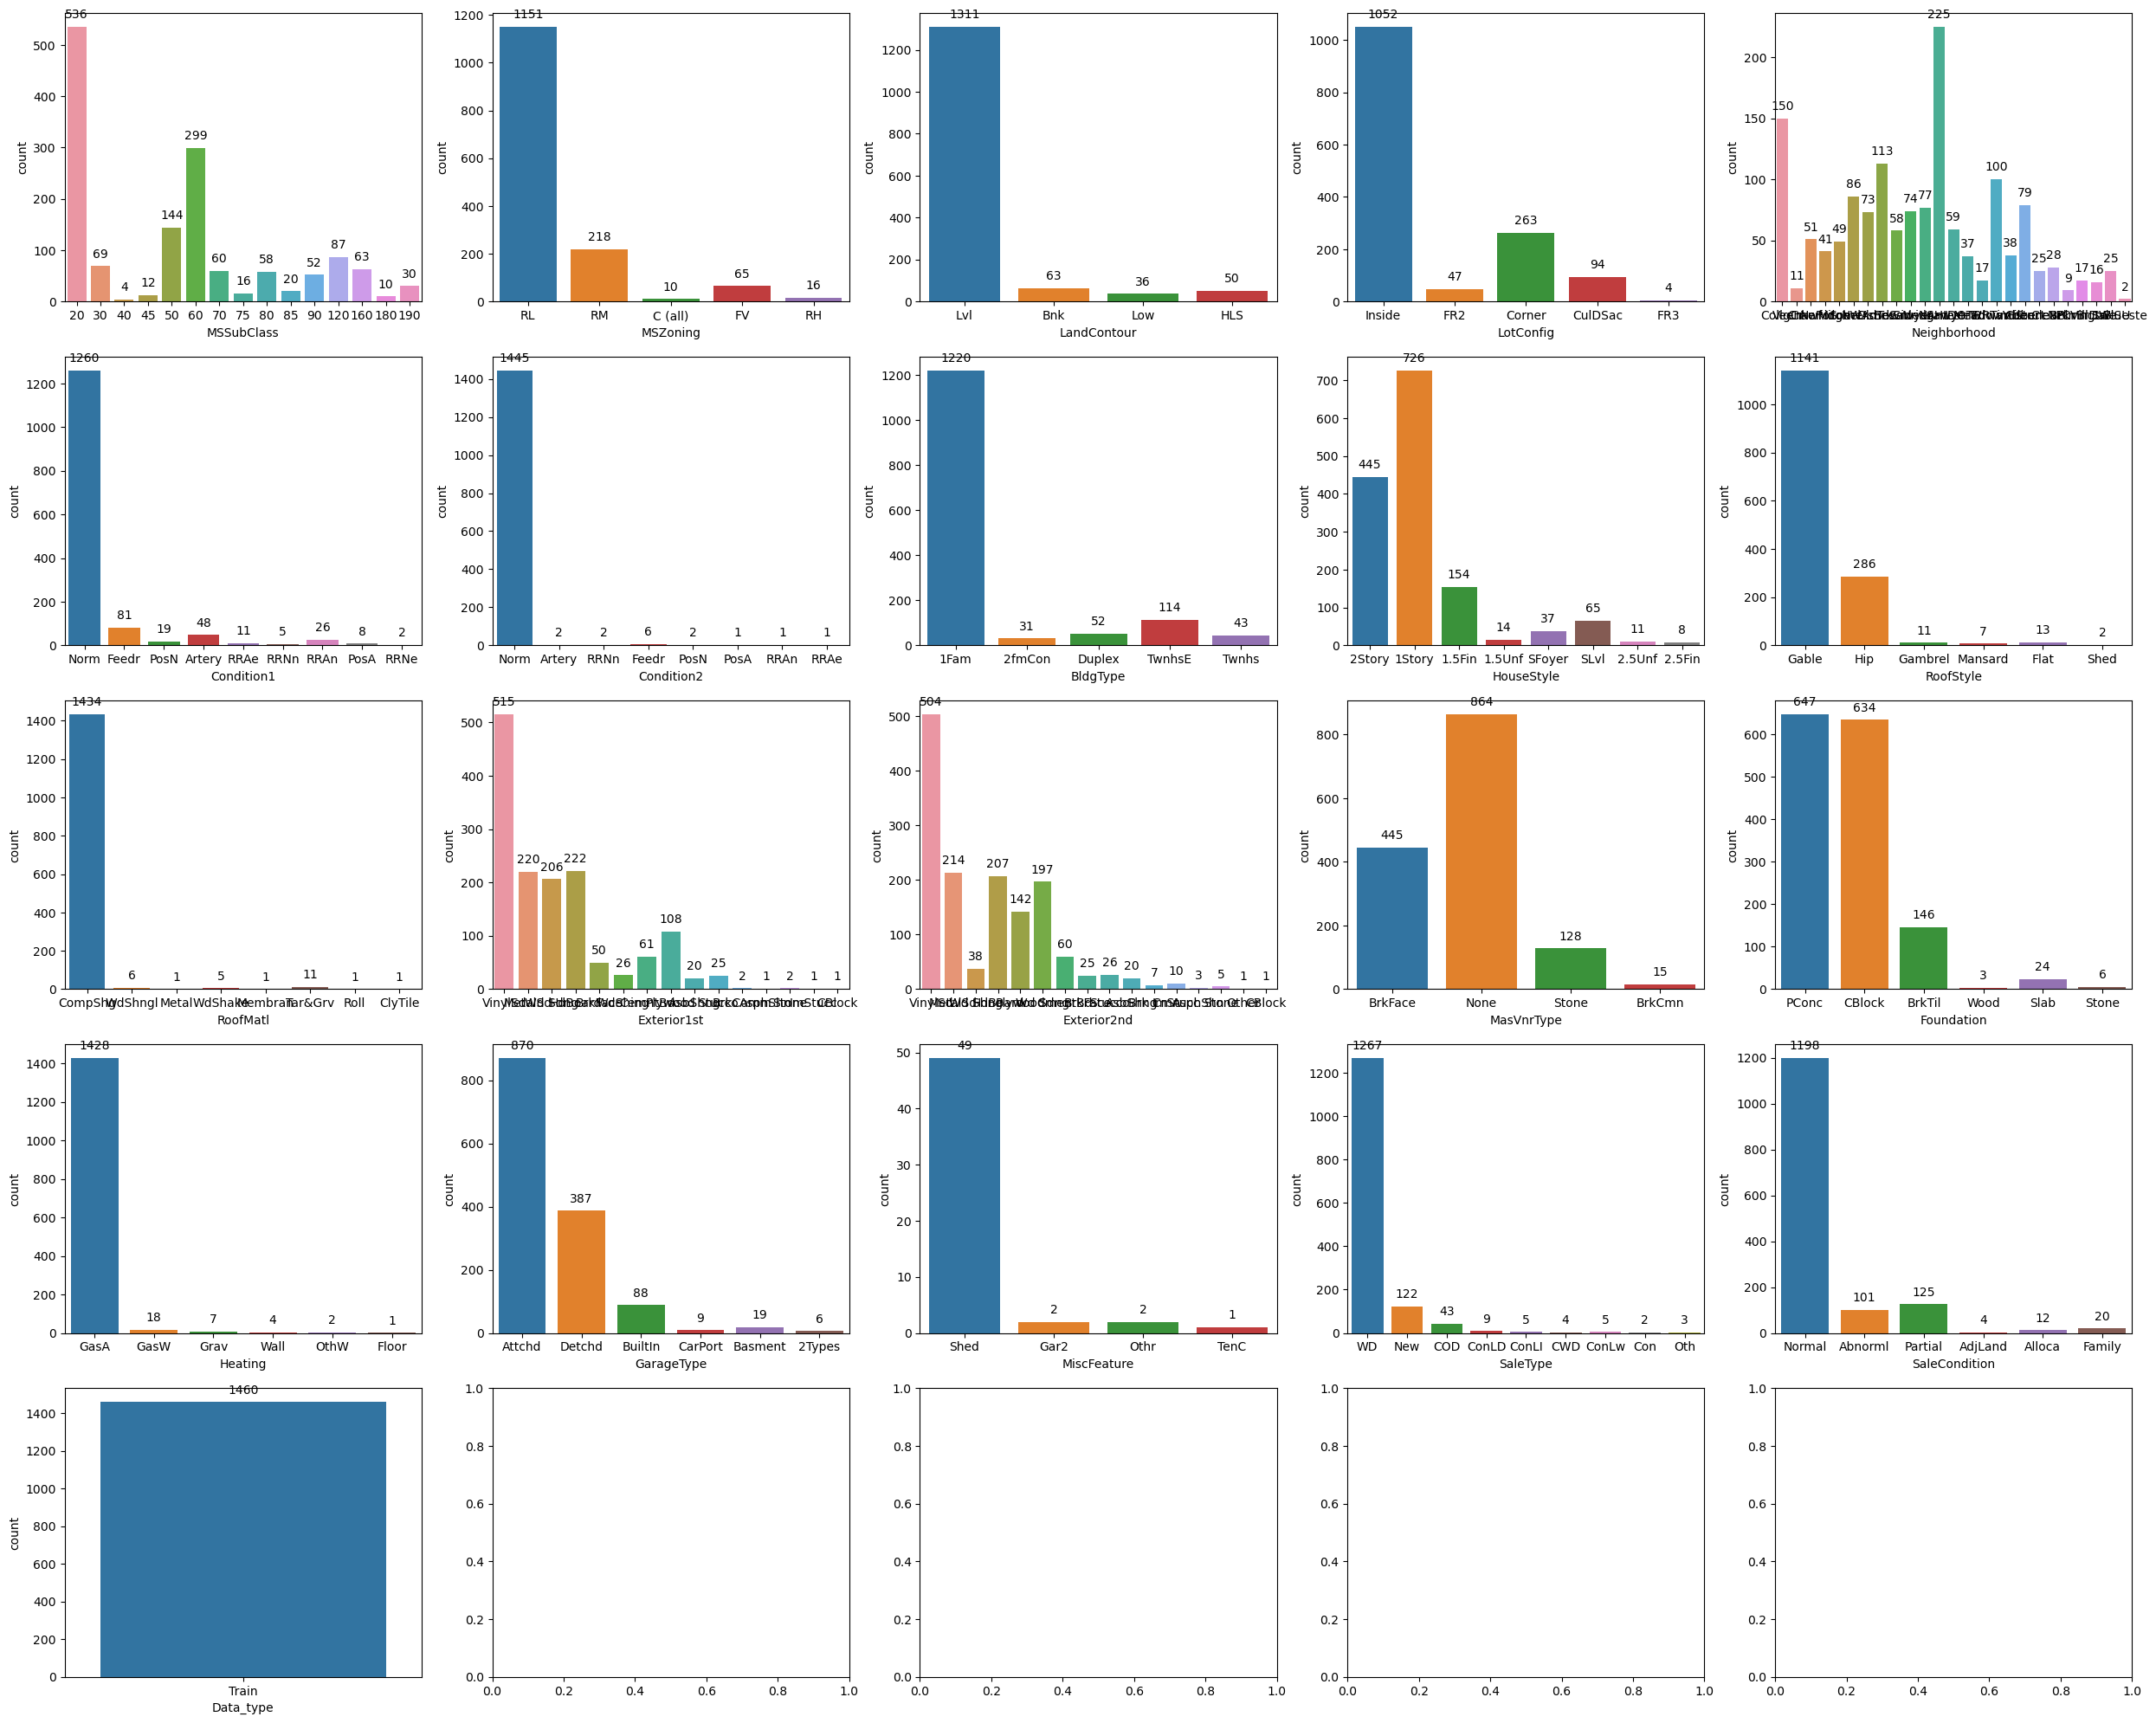

In [33]:
nominal = [col for col in categorical_cols if col not in ordinal]

ncols = 5
nrows = int(np.ceil(len(nominal)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))
for i, feature in enumerate(nominal, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.countplot(x=feature, data=hp_train)
    plt.tight_layout()
    
    # Adding count annotations to the bars
    for p in axs.flatten()[i - 1].patches:
        axs.flatten()[i - 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()
plt.close()

***Observations***
* Lot of categorical variables have majority of the houses in one category and rest miniscule count in various other categories. We can club such categories in the features. Features like LandContour, LotConfig, LandSlope, Condition1, Condition2, BldgType, RoofMatl, RoofStyle, BsmtFinType2, Heating, BsmtFinType2, Elctrical, Functional, SaleType, MiscFeature, SaleCondition, GarageCond, GarageQual, BsmtCond, ExterCond
* Heating is present in all the houses.

### E. Cardinality of categorical columns :
Checking to see if train and test datasets have difference in the categories that they have.

In [34]:
card_train = hp_train[categorical_cols].apply(lambda x: len(x.unique()))
card_test = hp_test[categorical_cols].apply(lambda x: len(x.unique()))

card_df = pd.concat([card_train, card_test], axis =1, keys=['Train', 'Test'])
card_df

Train  Test
MSSubClass        15    16
MSZoning           5     6
Street             2     2
Alley              3     3
LotShape           4     4
LandContour        4     4
Utilities          2     2
LotConfig          5     5
LandSlope          3     3
Neighborhood      25    25
Condition1         9     9
Condition2         8     5
BldgType           5     5
HouseStyle         8     7
RoofStyle          6     6
RoofMatl           8     4
Exterior1st       15    14
Exterior2nd       16    16
MasVnrType         5     5
ExterQual          4     4
ExterCond          5     5
Foundation         6     6
BsmtQual           5     5
BsmtCond           5     5
BsmtExposure       5     5
BsmtFinType1       7     7
BsmtFinType2       7     7
Heating            6     4
HeatingQC          5     5
CentralAir         2     2
Electrical         6     4
KitchenQual        4     5
Functional         7     8
FireplaceQu        6     6
GarageType         7     7
GarageFinish       4     4
GarageQual         6     5
GarageCond         6     6
PavedDrive         3     3
PoolQC             4     3
Fence              5     5
MiscFeature        5     4
SaleType           9    10
SaleCondition      6     6
Data_type          1     1

* Highest cardinality exists for NEIGHBORHOOD: 25, Exterior2nd: 16 and Exterior1st: 15, more than 10.

#### Check the difference in categories

In [35]:
print(len(categorical_cols))
cat_cols_same = [col for col in categorical_cols if set(hp_test[col]).issubset(set(hp_train[col]))]
print(len(cat_cols_same))

cat_cols_diff = list(set(categorical_cols)-set(cat_cols_same))
print(cat_cols_diff, '\n')

for i in cat_cols_diff:
    print(i)
    print(set(hp_train[i]))
    print(set(hp_test[i]), '\n')

45
36
['Data_type', 'Exterior1st', 'Utilities', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Exterior2nd', 'MSSubClass'] 

Data_type
{'Train'}
{'Test'} 

Exterior1st
{'Wd Sdng', 'Plywood', 'CemntBd', 'WdShing', 'BrkFace', 'VinylSd', 'CBlock', 'AsbShng', 'Stucco', 'ImStucc', 'MetalSd', 'HdBoard', 'AsphShn', 'BrkComm', 'Stone'}
{'Wd Sdng', nan, 'Plywood', 'CemntBd', 'WdShing', 'VinylSd', 'BrkFace', 'CBlock', 'AsbShng', 'Stucco', 'MetalSd', 'HdBoard', 'AsphShn', 'BrkComm'} 

Utilities
{'AllPub', 'NoSeWa'}
{nan, 'AllPub'} 

Functional
{'Mod', 'Maj2', 'Min1', 'Typ', 'Sev', 'Maj1', 'Min2'}
{nan, 'Mod', 'Maj2', 'Min1', 'Typ', 'Sev', 'Maj1', 'Min2'} 

KitchenQual
{'TA', 'Ex', 'Fa', 'Gd'}
{nan, 'Fa', 'TA', 'Ex', 'Gd'} 

MSZoning
{'RL', 'FV', 'C (all)', 'RM', 'RH'}
{nan, 'RL', 'FV', 'C (all)', 'RH', 'RM'} 

SaleType
{'ConLI', 'Con', 'ConLD', 'CWD', 'New', 'WD', 'COD', 'Oth', 'ConLw'}
{nan, 'ConLI', 'ConLw', 'ConLD', 'CWD', 'New', 'WD', 'COD', 'Oth', 'Con'} 

Exterior2nd
{'Wd Sdng', 'Oth

***Observations***
* 8 cols out of 44 cat cols show differences in Cardinality in train and test data due to missing values. 
* No new categories observed in Test data compared to Train data.
* KitchenQual, SaleType, MSZoning, Functional just have the difference of nan existing in test data
* Exterior2nd: Train data has a value 'Other' that is not present in test. Apart from nan difference.
* Utilities: Train data has a value 'NoSeWa', not present in test. Apart from nan
* Exterior1st: Train has 'Stone', 'ImStucc', not present in test. Apart from nan.

## 1.2 Bivariate Analysis

Initially, we conducted separate analyses on each feature. Now, the focus shifts to understanding the correlation between our target variable and predictors, along with exploring the relationships among the predictors themselves.

### A. Checking whether features follow Normal Distribution

We can start our analysis with correlation analysis. One of the ways to perform that is examining the Pearson correlation coefficients and presenting visually such as in a heatmap. However, before going further with correlation analysis, it is important to check whether variables in the dataset follow Normal Distribution. This preliminary test aims to comply with the assumptions of Pearson correlation, which states that variables should follow a normal distribution. I’ll perform Shapiro-Wilk test for normality to check the same.

***Shapiro-Wilk test***

Explanation of the code for the test written below. It returns a tuple with two elements: the test statistic and the p-value.
* ***[1]*** : specifically retrieves the p-value from this tuple. 
* ***< 0.01*** :  This compares the obtained p-value from the test to the significance level of 0.01 (99% confidence level). 
* It computes Shapiro-Wilk test for each col and returns a boolean value indicating whether the p-value obtained from the test is less than 0.01.
* If the p-value is less than 0.01, it means the ***null hypothesis (i.e. data follows Normal Distribution)*** is rejected at the 99% confidence level. 
* Indicating that the ***data in that column does not follow a normal distribution***.
* ***Not normal.any()*** checks if all columns passed the normality test (i.e., no columns failed the Shapiro-Wilk test). 

If it returns ***True***, it implies that 
* All numerical cols returned False indicating that none of them failed the Shapiro-Wilk test for normality
* Hence, overall it evaluates True as all cols follow normal distribution based on the specified threshold (p-value < 0.01)

In [36]:
#Check normal distribution of all numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(hp_train[numerical_cols])
normal = normal.apply(test_normality)
#print(normal, '\n')
print(not normal.any())

if (not normal.any()) == True:
    print("The numerical columns appear to be normally distributed (Fail to Reject the null hypothesis)")
else:
    print("The numerical columns does not appear to be normally distributed (Reject the null hypothesis)")


False
The numerical columns does not appear to be normally distributed (Reject the null hypothesis)


Below interpretation is for the overall ***'print(not normal.any())'*** Statement. Not to be interpreted for column wise values. As interpretation is when the boolean value is 'NOT'ed.
* ***True*** indicates that all the numerical columns pass the test for normality, suggesting that these features are approximately normally distributed.
* ***False*** implies that at least one numerical feature in the dataset fails the Shapiro-Wilk normality test. This suggests that there's at least one numerical column whose distribution significantly deviates from a normal distribution pattern.
* ***None of quantitative variables has normal distribution so these should be transformed***

### B.	Correlation analysis between predictor and target variables

***Spearman correlation Vs Pearson Correlation***

Continuous features don't follow normal distribution so can't apply ***Pearson correlation*** which assumes Normal distribution. 

Whereas ***Spearman correlation*** doesn't assume a distribution (its non-parametric) and is suitable for both continuous and ordinal variables. It picks up relationships between variables even when they are nonlinear. So applied Spearman correlation to check the strength and direction of association between dependent (SalePrice) and independent variables (all continuous features).

First, I performed the correlation with the target variable. Built the below graph for a quick glance of positive and negative correlated variables. 

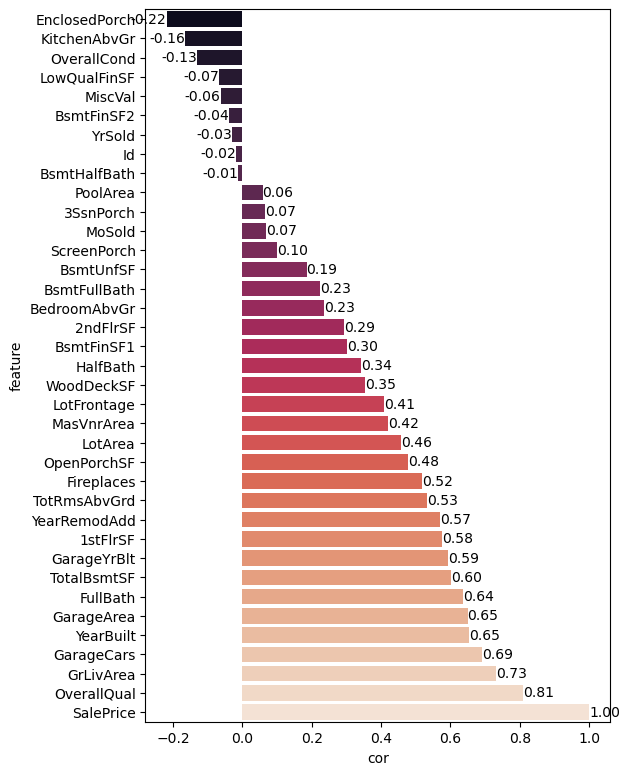

In [37]:
def spearman_cor(df, features):
    df1 = pd.DataFrame()
    df1['feature'] = features
    df1['cor'] = [df[f].corr(df['SalePrice'], 'spearman') for f in features]
    df1 = df1.sort_values('cor')
    
    plt.figure(figsize=(6, 0.25*len(features)))
    ax = sns.barplot(data=df1, y='feature', x='cor', orient='h',palette = "rocket")
    
    #Add annotations to the bars        
    for index, (value, feature) in enumerate(zip(df1['cor'], df1['feature'])):
        if value < 0:
            ax.text(value, index, f'{value:.2f}', ha='right', va='center', color='black')
        else:
            ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')
    plt.show()

spearman_cor(hp, numerical_cols)

***Observation***
* Features with correlation of 55% or more with the target variable are OverallQual, GrLivArea, GarageCars, YearBuilt, GarageArea, FullBath, TotalBsmtSF, GarageYrBlt, 1stFlrSF
* Area-related variables as well as quality and year are the major continuous factors associated with the sale price of a house.

### C.	Correlation between the independent features
A heatmap visually illustrates data by representing values through colors. Here, we'll create a heatmap displaying the correlation matrix of numerical features.

<Axes: >

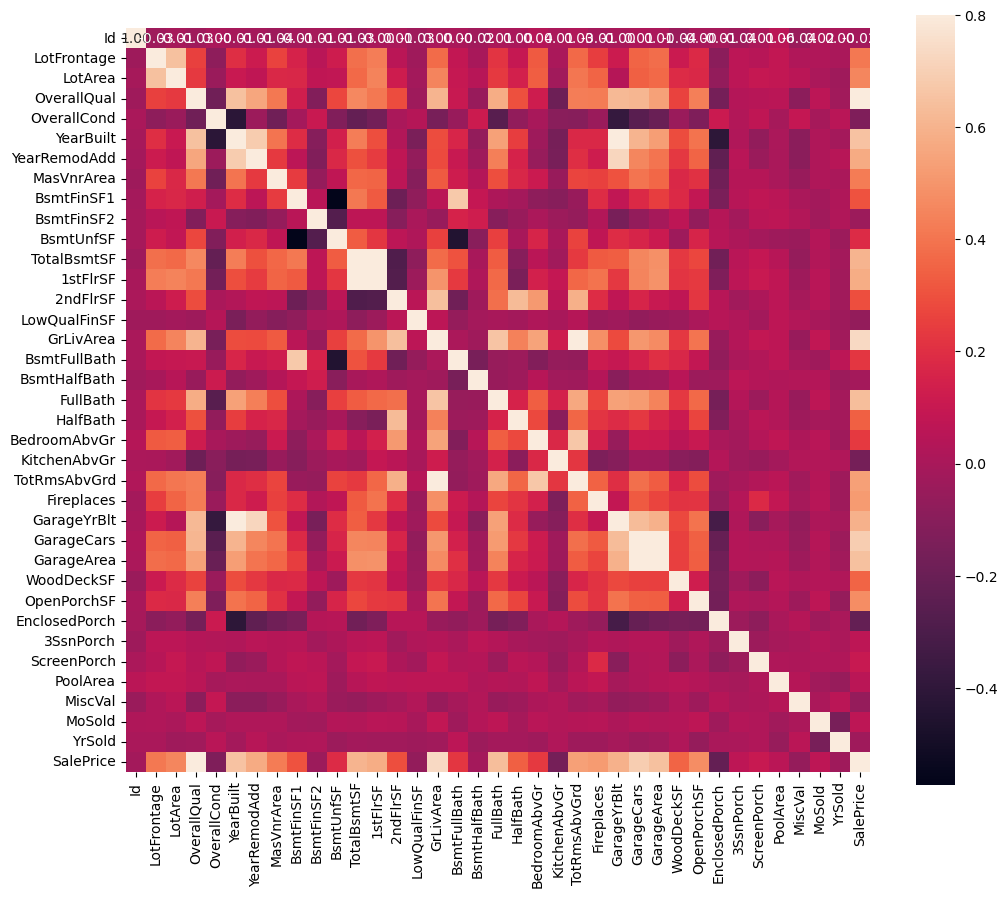

In [38]:
#Correlation matrix plot
corrmat = hp_train[numerical_cols].corr('spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')

In [39]:
#To filter out all the variable combinations with correlation higher or equal to 80%
for i in hp_train[numerical_cols]:
    for j in hp_train[numerical_cols]:
        if 0.80 <= round(corrmat.loc[i, j], 2) < 1.00:
            print(i, j, round(corrmat.loc[i, j],2))

OverallQual SalePrice 0.81
YearBuilt GarageYrBlt 0.89
TotalBsmtSF 1stFlrSF 0.83
1stFlrSF TotalBsmtSF 0.83
GrLivArea TotRmsAbvGrd 0.83
TotRmsAbvGrd GrLivArea 0.83
GarageYrBlt YearBuilt 0.89
GarageCars GarageArea 0.85
GarageArea GarageCars 0.85
SalePrice OverallQual 0.81


***Observations:***
At first sight, 2 white colored squares are visible. First one refers to TotalBsmtSF and 1stFlrSF variables and the second one refers to the Garage variables. There is an indication of multicollinearity.

* GarageCars and GarageArea show some strong correlation between the variables. Number of cars that fit in a garage is a consequence of the garage area. Both the variables give almost the same information. So we can remove one of them. 
* TotalBsmtSF & 1stFlrSF and GrLivArea & TotRmsAbvGrd similarly show a significant correlation. 
* YearBuilt and GarageYrBlt also show high correlation
* For all the pairs above, we can check the performance of the model by excluding one of them.

Variables giving almost the same information can give rise to a situation of Multicollinearity. This happens when two or more variables are highly correlated with each other. It makes the information in the variables redundant, making it challenging for the model to assess the individual effect of each predictor on the dependent variable. To manage multicollinearity, we can exclude one of the variables in the pair above that exhibits stronger correlation with the target variable and check the model performance.

In [40]:
#Top 10 highly positively correlated features
#This it to get the correlation value and decide which variable has higher correlation in the combination of variables exhibiting multicollinearity.
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
hp_train[cols].corr(method='spearman').style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

***Observations***
* OverallQual, GrLivArea are strongly correlated with 'SalePrice'.
* Will keep GarageCars variable since its correlation with SalePrice is higher. (GarageCars & GarageArea)
* Will keep TotalBsmtSF variable similarly. (TotalBsmtSF & 1stFlrSF)
* Will keep GrLivArea variable in the combination of (GrLivArea, TotRmsAbvGrd)
* Will keep YearBuilt variable. (YearBuilt & GarageYrBlt)

In [41]:
# round(corrmat,2) #Uncomment to see the entire matrix with values without the colors

# #To view the correlation between specific columns
# corr_specific = corrmat.loc[['GarageCars', 'GarageArea'], ['GarageCars', 'GarageArea']]
# print(round(corr_specific, 2))

# #To check correlation values in ascending order
# corrmat.sort_values(['SalePrice'], ascending = False)['SalePrice']

#### Scatter Plots

### D.	Analysing Numerical Features with Scatter Plots

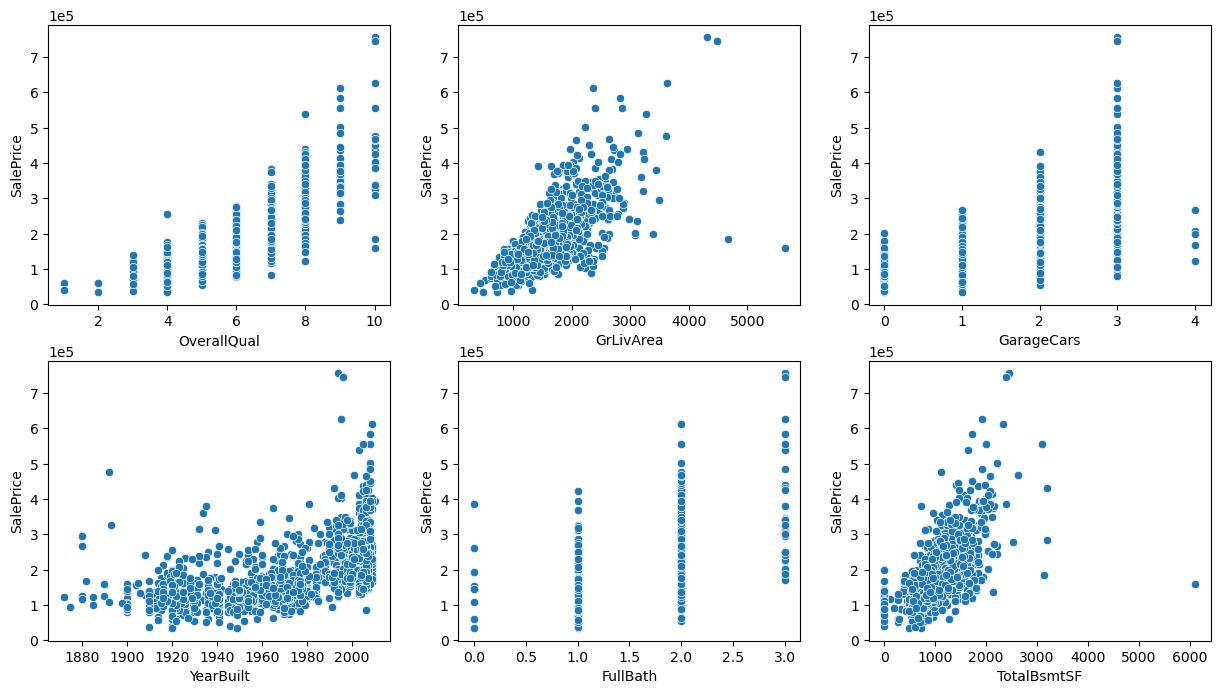

In [42]:
pos_cor = ['OverallQual', 'GrLivArea', 'GarageCars','YearBuilt','FullBath','TotalBsmtSF']
ncols = 3
nrows = int(np.ceil(len(pos_cor)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
for i, feature in enumerate(pos_cor, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.scatterplot(x=feature, y='SalePrice', data=hp_train)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature)
    plt.ylabel('SalePrice')#, size=15, labelpad=12.5)
plt.show()

***Observation***
* OverallQual, GrLivArea, TotalBsmtSF are positively linearly related with SalePrice.
* GrLivArea: As the living area increases, houses become more expensive. But there are some outliers. There are houses with huge areas but with reasonable prices. These are partial sales that likely don’t represent actual market values and can be excluded.
* TotalBsmtSF shows a steeper slope of the linear relationship.
* For Yearbuilt, more recent houses tend to have the higher prices. Although, there are some outliers of older houses with high prices.
* GarageCars showed positive correlation up to a point but then declined, i.e. homes with 4-car garages had lower prices than those with 3-car garages. Seems like fewer buyers look for this attribute. Also, likely that fewer of these homes are on the market.

***Rest of the features***

Similarly analysing rest of the features through the scatter plot. 

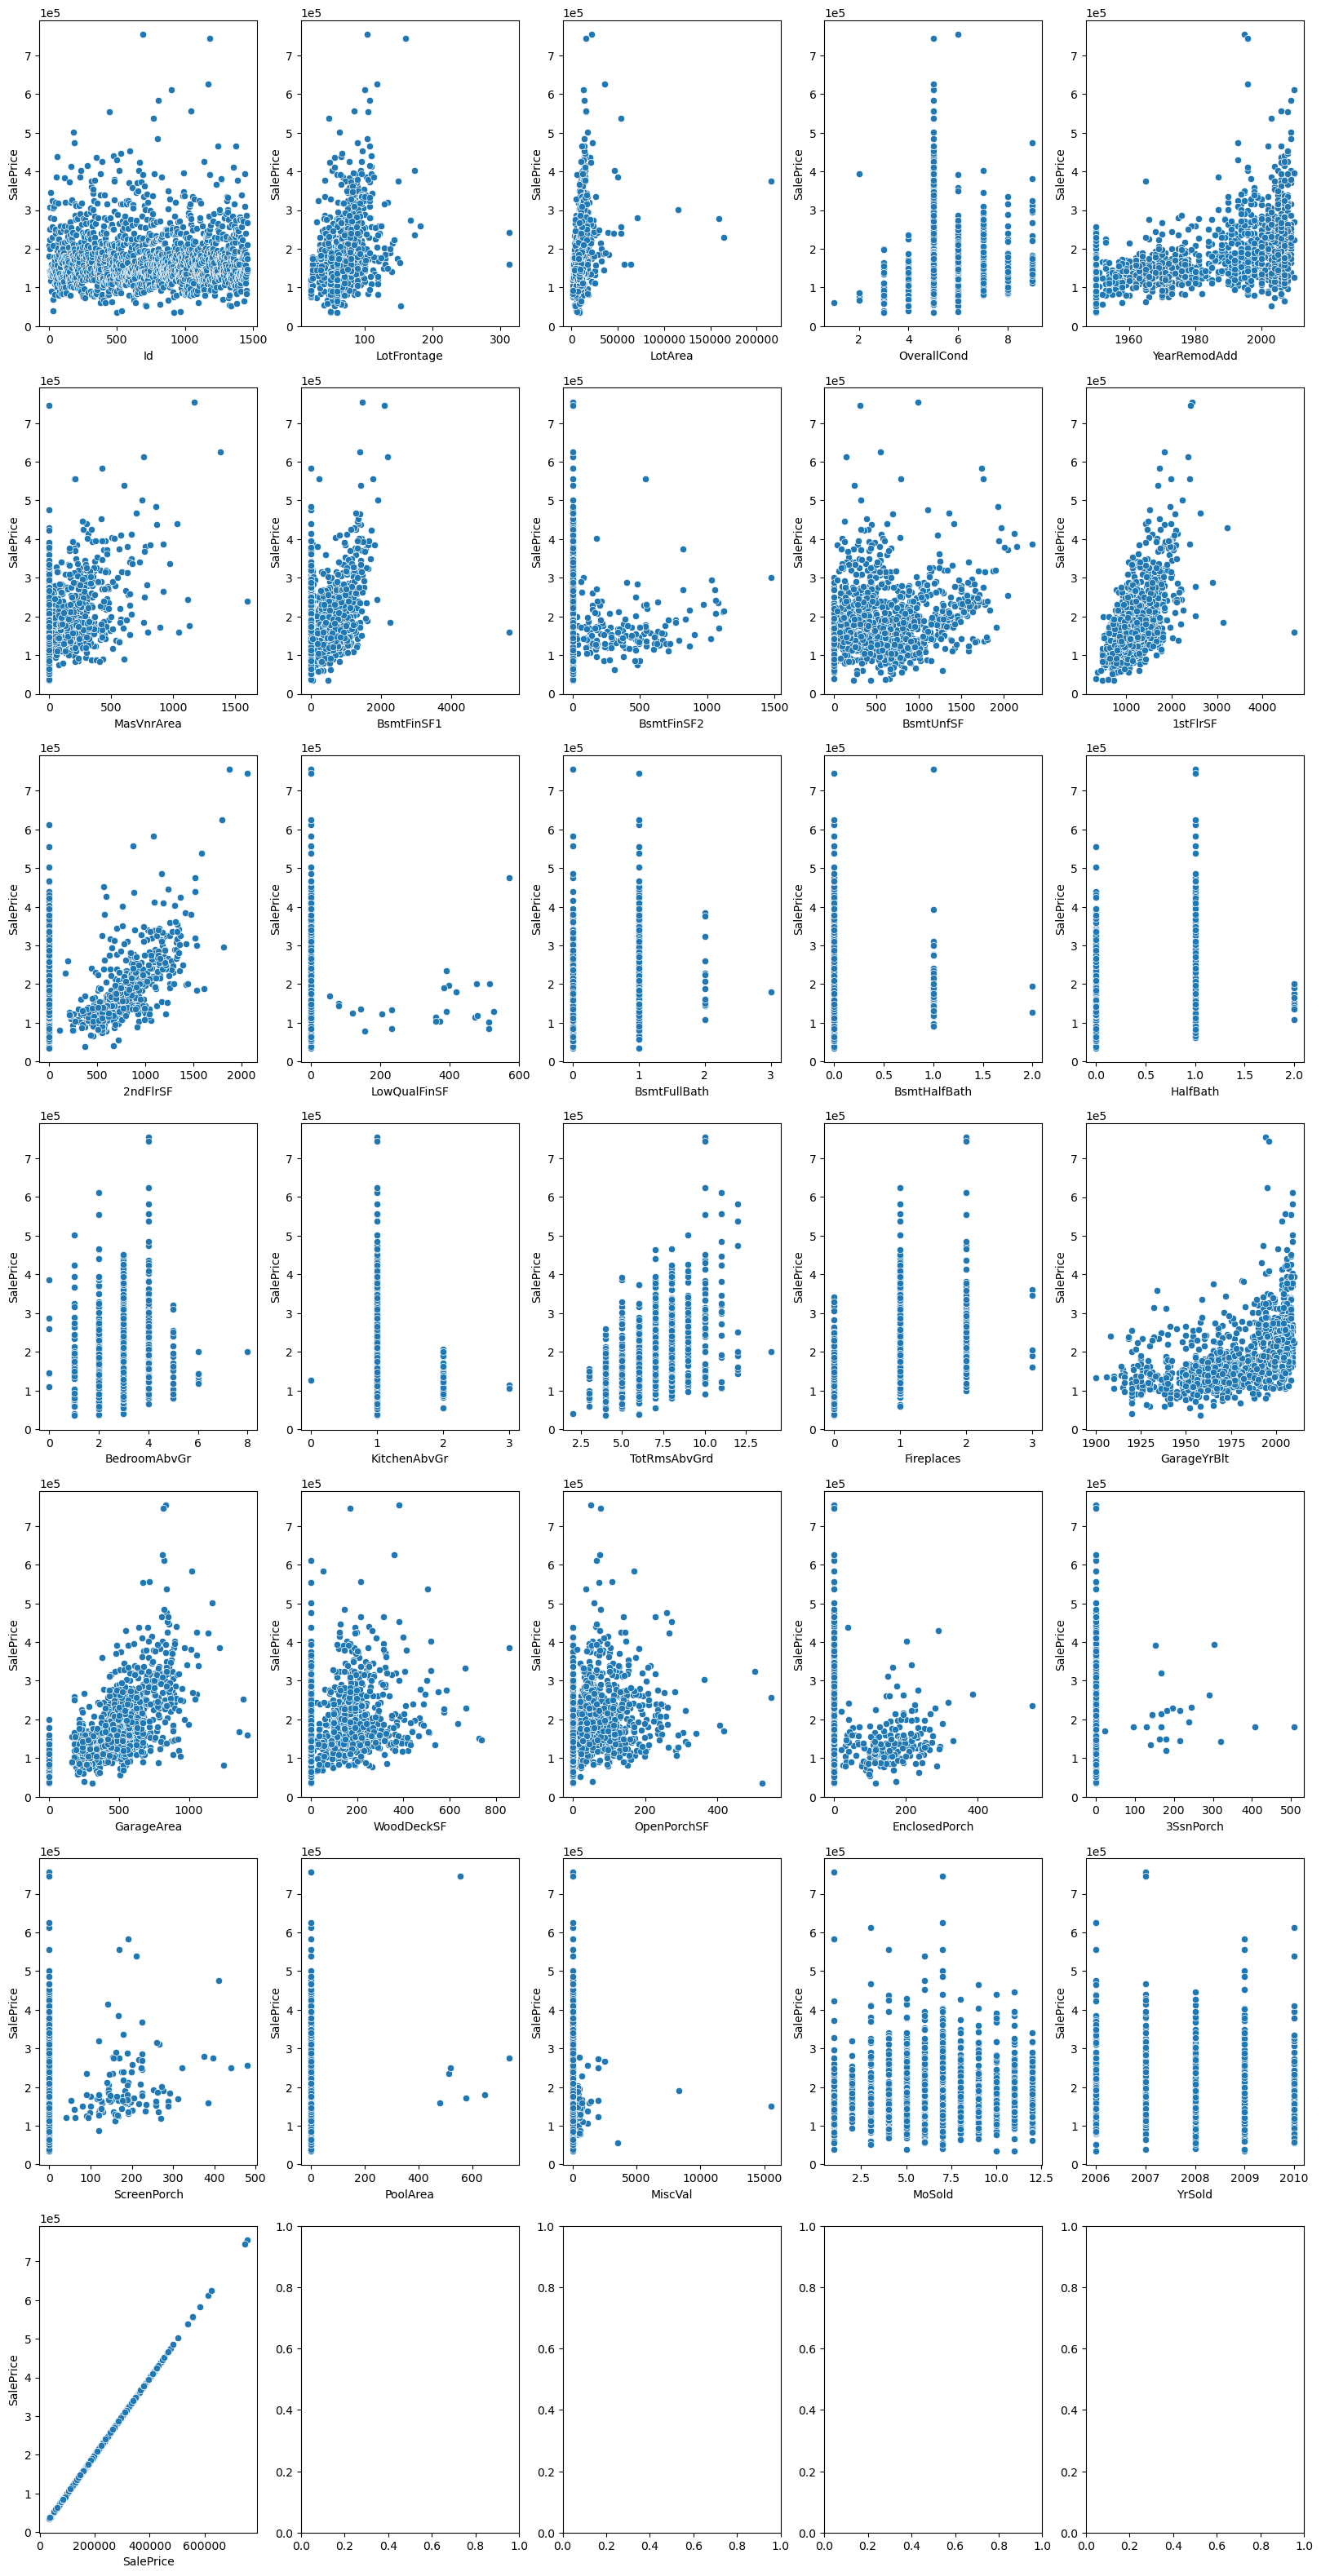

In [43]:
#Remaining variables and their relationship with target variable:
rem_cols = [cols for cols in numerical_cols if cols not in pos_cor]

ncols = 5
nrows = int(np.ceil(len(rem_cols)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
for i, feature in enumerate(rem_cols, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.scatterplot(x=feature, y='SalePrice', data=hp_train)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature)
    plt.ylabel('SalePrice')#, size=15)
plt.show()

***Observations***
* (TotRmsAbvGd) Total number of bedrooms has a positive impact on sale price. Although, houses with more than 11 rooms tend to see a fall in price regardless of more rooms.
* (Fireplaces) Houses with fireplaces tend to be more expensive. However, there are cases where house with no fireplace was sold at the same price as house with at least one. Also, houses with more than 2 fireplaces don’t continue to show rise in price.
* (LotArea) As the LotArea increases so does the final price of the house. However, there are some outliers.
* (MoSold) Houses are mostly sold in the early to mid-summer (May, June, July). The House Prices are not deviated much among months.

To get an idea on the average price of the house on a few important factors.

In [44]:
#Checking the average saleprice for each count of rooms in a house and overall quality of the house.
feat = ['TotRmsAbvGrd', 'OverallQual']

for f in feat:
    result = hp_train.pivot_table(index=f, values='SalePrice', aggfunc=np.median)
    print(result)

              SalePrice
TotRmsAbvGrd           
2               39300.0
3              100000.0
4              120500.0
5              130250.0
6              155000.0
7              184100.0
8              200000.0
9              252000.0
10             285000.0
11             311738.5
12             200000.0
14             200000.0
             SalePrice
OverallQual           
1              50150.0
2              60000.0
3              86250.0
4             108000.0
5             133000.0
6             160000.0
7             200141.0
8             269750.0
9             345000.0
10            432390.0


### E.	Analysing Categorical Variables – Scatter Plot

Let’s now focus on the categorical features.

In [45]:
for col in categorical_cols:
    print(hp_train[col].value_counts(), '\n')

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74


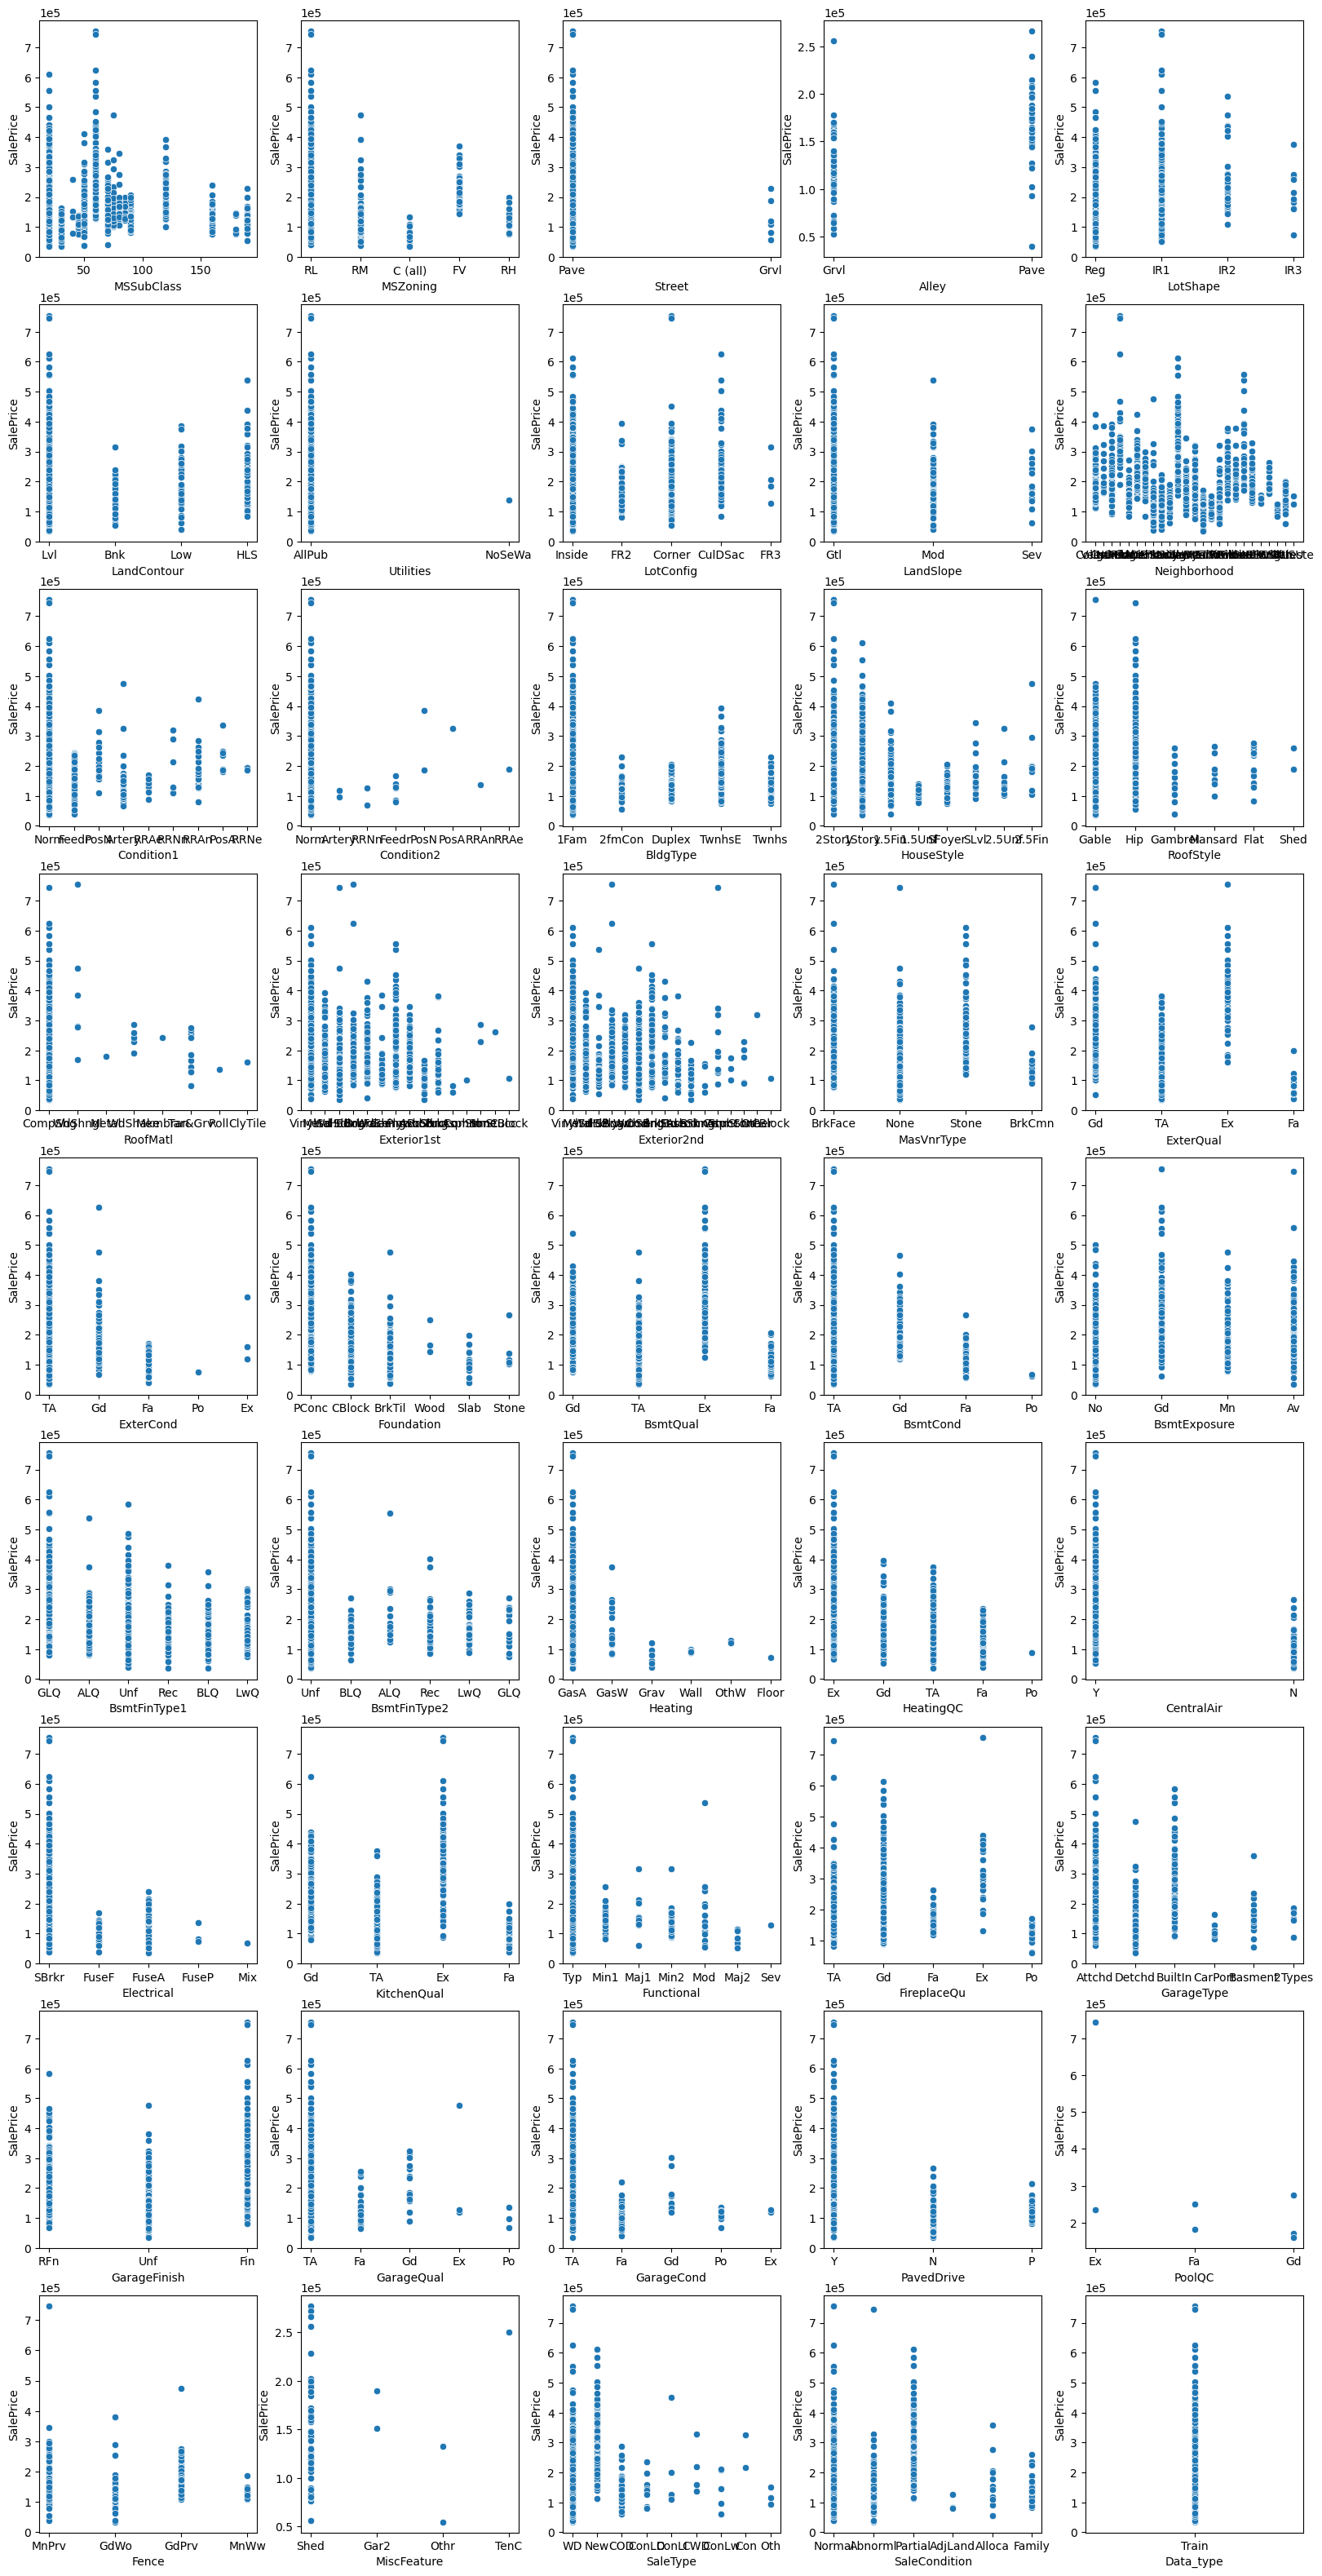

In [46]:
ncols = 5
nrows = int(np.ceil(len(categorical_cols)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.scatterplot(x=feature, y='SalePrice', data=hp_train)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature)
    plt.ylabel('SalePrice')#, size=15)
plt.show()

***Observations***
* (Heating) Most houses have GasA for heating system irrespective of them being cheap or costly. Hence, it does not seem to have a great impact on the sale value.
* Obviouslt Paved streets and paved alleys have higher sale price.
* (BldgType) Single Family detached buildings have been asking higher prices compared to other types. 
* (HouseStyle) 1 & 2 story house styles are costlier.
* (RoofStyle) Seems that people prefer Hip and Gable kind of roof more.

***Taking a deeper look at the Neighbourhood feature.***

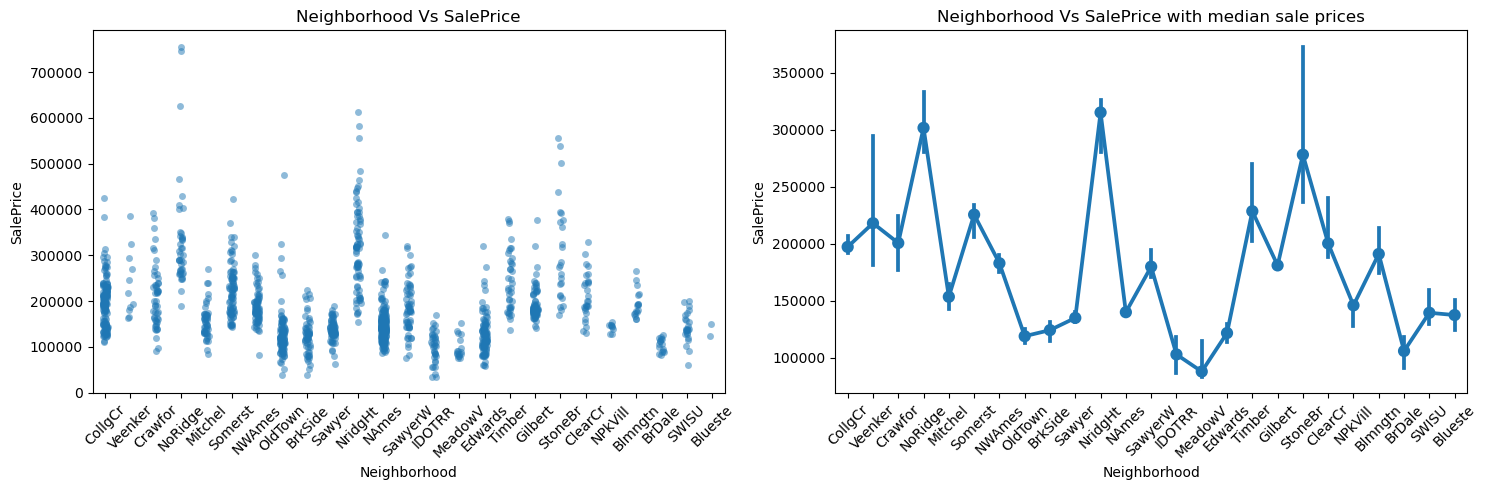

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#First graph Left
plt.subplot(1, 2, 1)
sns.stripplot(x = 'Neighborhood', y = 'SalePrice', data = hp_train, alpha=0.5)
axes[0].set_title('Neighborhood Vs SalePrice')
plt.xticks(rotation=45)

#Second graph Right
plt.subplot(1, 2, 2)
sns.pointplot(x = 'Neighborhood', y = 'SalePrice', data = hp_train, estimator=np.median)
axes[1].set_title('Neighborhood Vs SalePrice with median sale prices')
#Points represent the median saleprice for each neighbourhood (taken median to avoid the impact of outliers) 
#while the vertical bars indicate the variation in this value.

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # Display only the strip plot. Without this shows additional data that is not required for viz

***Observation:*** Some neighborhoods are more expensive than others. Neighborhoods like NoRidge, NridgeHt, StoneBr are among the most expensive ones.

### F.	Analysing Ordinal Variables – Box Plot

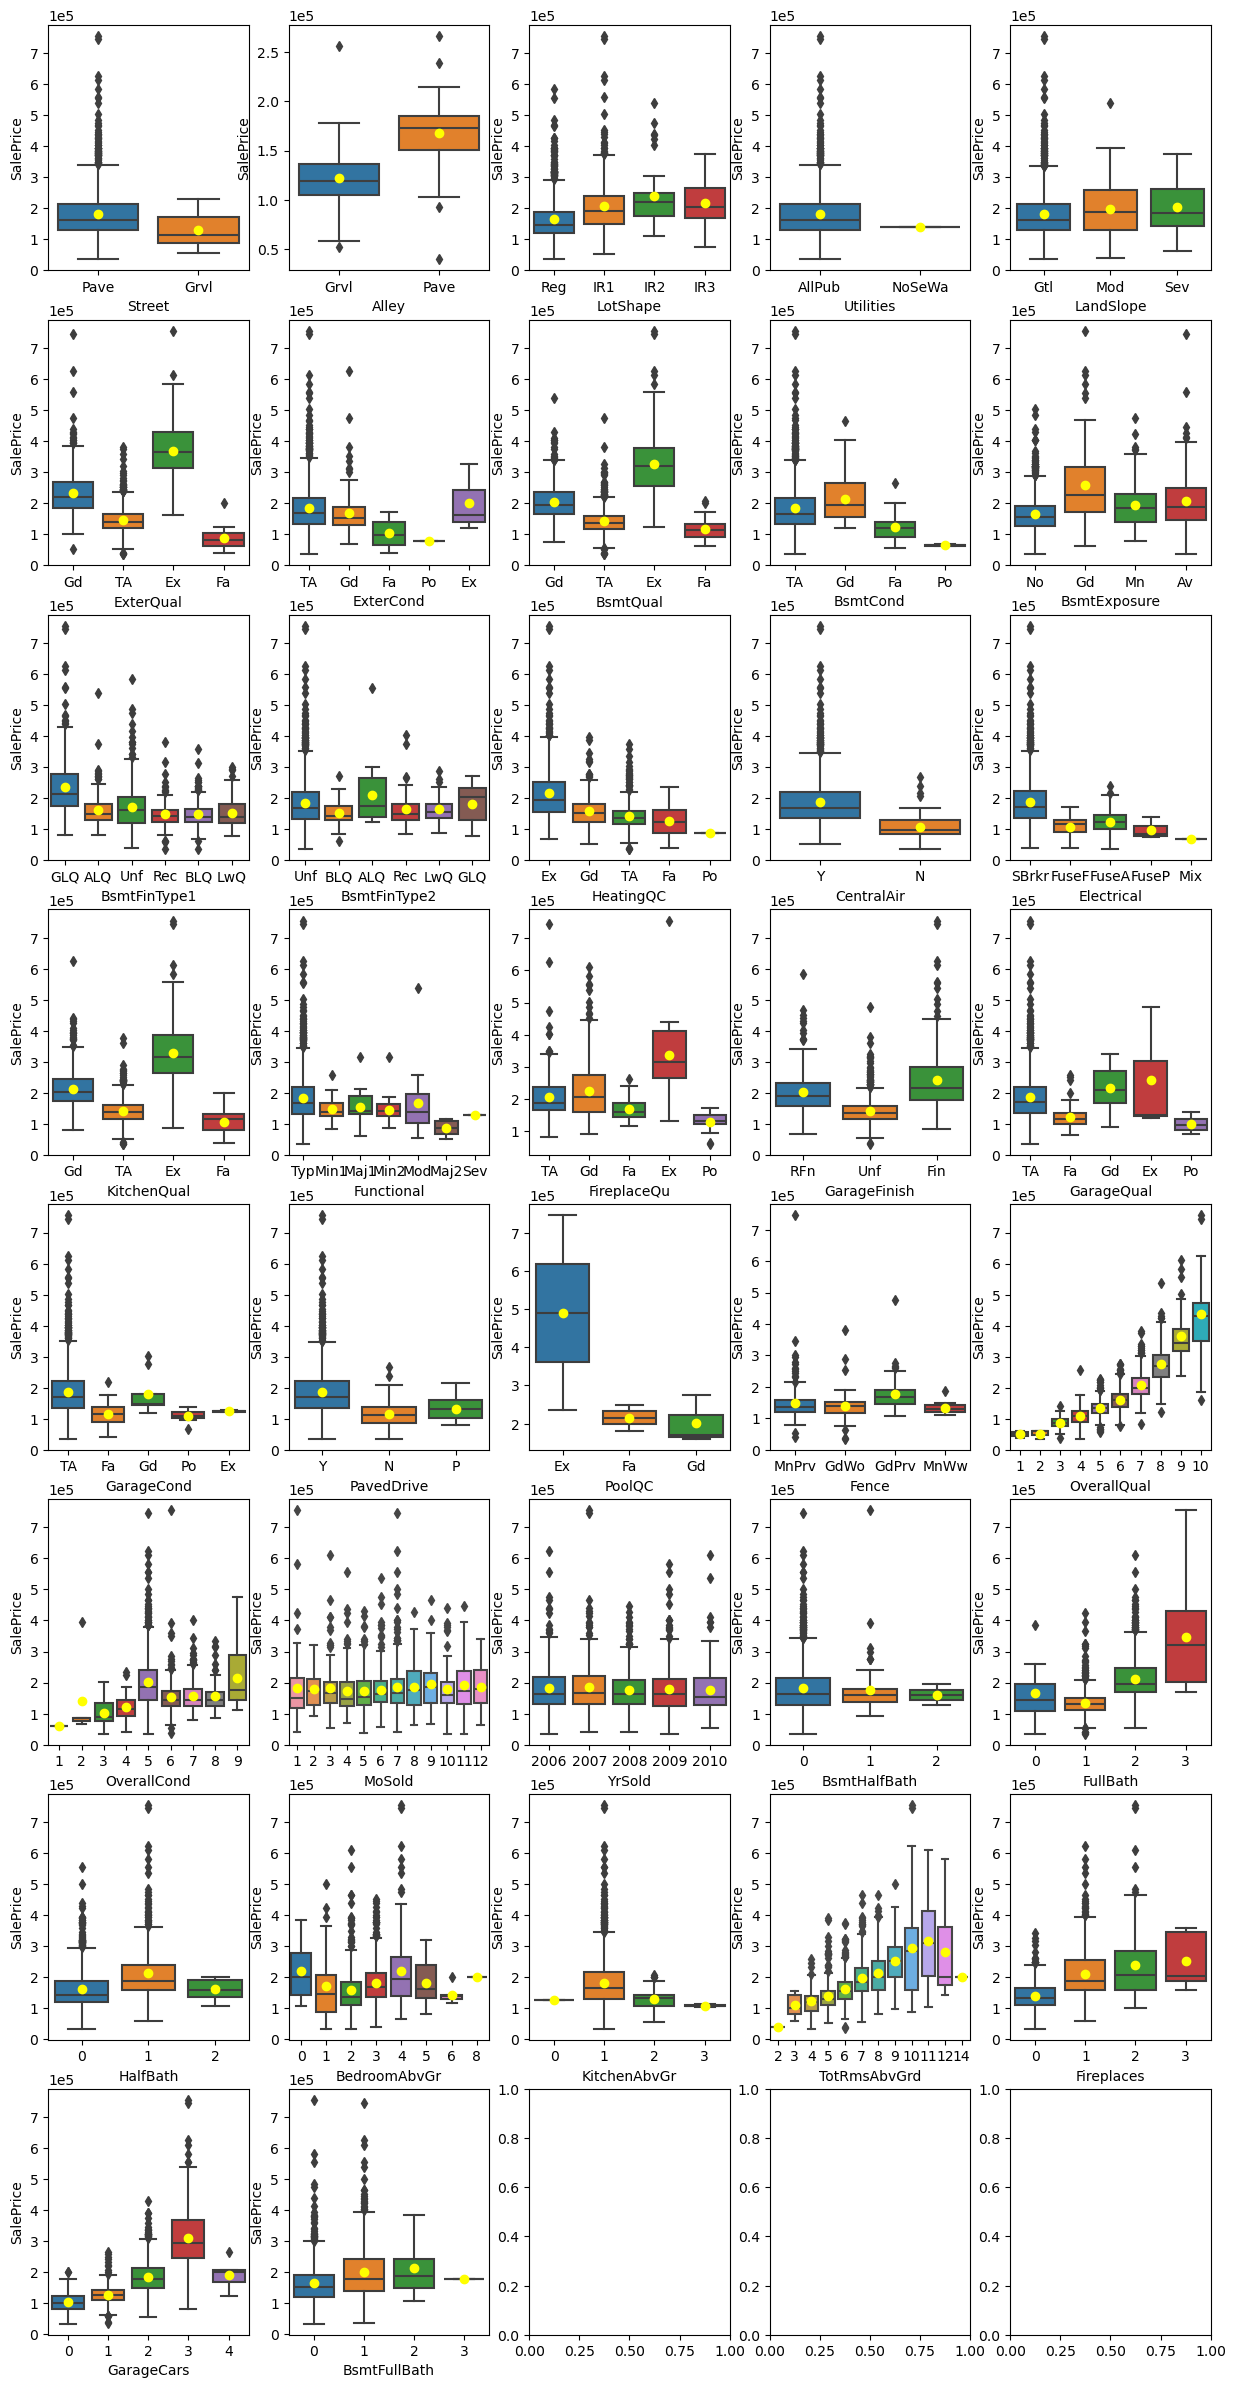

In [48]:
#Ordinal variables
ncols = 5
nrows = int(np.ceil(len(ordinal)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))
for i, feature in enumerate(ordinal, 1):
    plt.subplot(nrows, ncols, i) 
    sns.boxplot(x=feature, y = 'SalePrice', data = hp_train, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"yellow"})
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature, size=10)
    
plt.show()

***Observations***
* In OverallCond feature, 9 category has higher range of saleprice for houses compared to other categories. Although median selling price for condition 6 and onwards is almost same.
* Among ordinal features, the Overal Quality shows a strong correlation with SalePrice, next being Heating quality and  Fireplaces.
* GarageCars is also correlated to SalePrice. Although at capacity of 4, the house price drops, it seems that the citizen of Ames mostly have maximum 3 cars.

In [49]:
hp_train[['MSSubClass', 'YrSold', 'MoSold', 'YearBuilt','YearRemodAdd']].head()

MSSubClass  YrSold  MoSold  YearBuilt  YearRemodAdd
0          60    2008       2       2003          2003
1          20    2007       5       1976          1976
2          60    2008       9       2001          2002
3          70    2006       2       1915          1970
4          60    2008      12       2000          2000

In [50]:
#Keeping year values as int for now as we will need to perform calculations later on them for feature engineering
#hp_train['YrSold'] = hp_train['YrSold'].astype(str)
#hp_train['MoSold'] = hp_train['MoSold'].astype(str)
#hp_train['YearBuilt'] = hp_train['YearBuilt'].astype(str)
#hp_train['YearRemodAdd'] = hp_train['YearRemodAdd'].astype(str)
#hp_train['GarageYrBlt'] = hp_train['GarageYrBlt'].astype(str)

#hp_train['OverallCond'] = hp_train['OverallCond'].astype(str) 
#hp_train['OverallQual'] = hp_train['OverallQual'].astype(str)

In [51]:
# col_str = ['MSSubClass']#, 'YrSold', 'MoSold']
# for col in col_str:
#     numerical_cols.remove(col)
#     categorical_cols.append(col)
    
# #numerical_cols

## 2.	Data Pre-processing

Data pre-processing involves cleaning, transforming, and preparing the raw data to make it suitable for analysis. In this stage, we’ll deal with imputing missing values, handling skewed data and outlier values, creating new variables, encoding variables and removing any inconsistencies that exists in the data set.

### 2.1 Handling Missing Values

Let’s start with a preliminary exploration of missing values to determine if there is a pattern that might suggest a systematic absence of information. I've created a heatmap that visually represents the locations of these missing values within the dataset.

<Axes: >

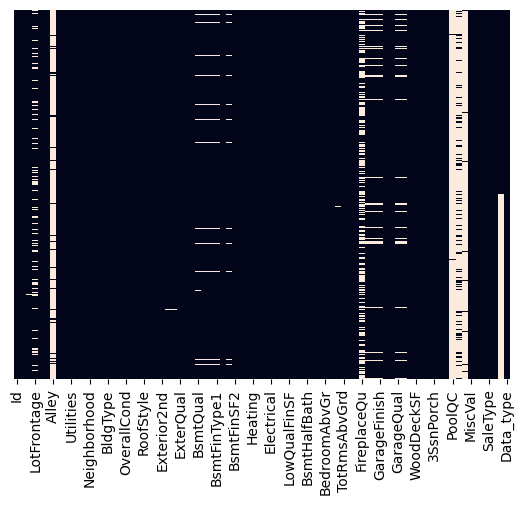

In [52]:
#Checking null values with graph for quick idea since there are lot of columns
sns.heatmap(hp.isnull(), yticklabels = False, cbar = False)

It shows there are certain columns which are almost entirely missing data. In certain locations, data is missing for some combination of columns together. We can look into those in detail.

In [53]:
##another way of removing columns with 0 missing values
# def missing_pcnt(df):
#     total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
#     percent = round(df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
#     return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

Checking the percentage of missing values for each column.

In [54]:
def missing_pcnt(df):
    na_cols = [col for col in df.columns if df[col].isnull().sum() > 0.000]
    total = df[na_cols].isnull().sum().sort_values(ascending = False)
    percent = round(df[na_cols].isnull().sum().sort_values(ascending = False)/df.shape[0]*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_pcnt(hp_train)

Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
GarageCond       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07

* 19 features have missing values. 
* PoolQC, MiscFeature, Alley, and Fence have more than 50% missing values in the train data.

In [55]:
missing_pcnt(hp_test)

Total  Percent
PoolQC         1456    99.79
MiscFeature    1408    96.50
Alley          1352    92.67
Fence          1169    80.12
FireplaceQu     730    50.03
LotFrontage     227    15.56
GarageCond       78     5.35
GarageYrBlt      78     5.35
GarageQual       78     5.35
GarageFinish     78     5.35
GarageType       76     5.21
BsmtCond         45     3.08
BsmtExposure     44     3.02
BsmtQual         44     3.02
BsmtFinType1     42     2.88
BsmtFinType2     42     2.88
MasVnrType       16     1.10
MasVnrArea       15     1.03
MSZoning          4     0.27
BsmtFullBath      2     0.14
BsmtHalfBath      2     0.14
Functional        2     0.14
Utilities         2     0.14
GarageCars        1     0.07
GarageArea        1     0.07
TotalBsmtSF       1     0.07
KitchenQual       1     0.07
BsmtUnfSF         1     0.07
BsmtFinSF2        1     0.07
BsmtFinSF1        1     0.07
Exterior2nd       1     0.07
Exterior1st       1     0.07
SaleType          1     0.07

* 33 features have missing values. 
* PoolQC, MiscFeature, Alley,Fence, and FireplaceQu have the more than 50% missing values in the test data.

In [56]:
missing_pcnt(hp)

Total  Percent
PoolQC         2909    99.66
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
SalePrice      1459    49.98
FireplaceQu    1420    48.65
LotFrontage     486    16.65
GarageCond      159     5.45
GarageYrBlt     159     5.45
GarageFinish    159     5.45
GarageQual      159     5.45
GarageType      157     5.38
BsmtExposure     82     2.81
BsmtCond         82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrType       24     0.82
MasVnrArea       23     0.79
MSZoning          4     0.14
Functional        2     0.07
BsmtHalfBath      2     0.07
BsmtFullBath      2     0.07
Utilities         2     0.07
KitchenQual       1     0.03
TotalBsmtSF       1     0.03
BsmtUnfSF         1     0.03
GarageCars        1     0.03
GarageArea        1     0.03
BsmtFinSF2        1     0.03
BsmtFinSF1        1     0.03
Exterior2nd       1     0.03
Exterior1st       1     0.03
SaleType          1     0.03
Electrical        1     0.03

***Imputing missing values***

We can use several strategies when dealing with missing values depending on the case. If we take a deeper look at the feature descriptions we’ll be able to understand why some of the predictors actually have so many missing values. These missing values may turn out to be relevant. Thumb rule is the more the meaningful data/feature, the better the results. I’ll separately deal with numerical and categorical columns and try to find their behaviour.

### A. Categorical Variables - a. Imputing values with None
Features relating to pool, garage or basement with missing values could actually imply that the house does not have a garage, pool or basement respectively. So, in this case, it would make sense to fill these missing values with something that captures this information. 


#### Checking Pool related variables

•	PoolQC, that is Pool Quality, has the most missing values. There is another variable related to pool called PoolArea. Looking at these two columns together could give a better idea. PoolArea doesn’t have missing values but it has a lot of 0s as its value (almost as many as the missing values that exist in PoolQC).

<Axes: >

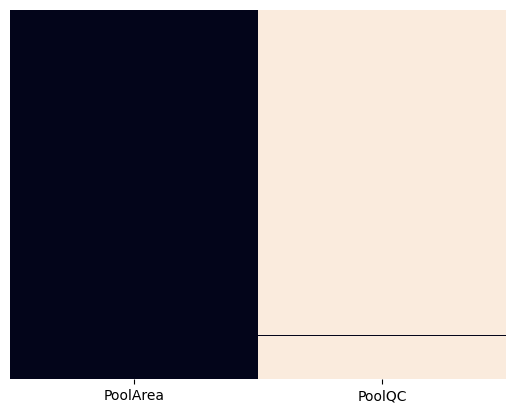

In [57]:
pool_vars = ['PoolArea', 'PoolQC']
sns.heatmap(hp[pool_vars].isnull(),yticklabels = False, cbar = False )

***Observations:***
* So wherever the pool area value is 0, PoolQC has a value missing. 
* This rather means that those values logically are not required as there is no pool.

In [58]:
hp['PoolArea'].isin([0, np.nan, 'None']).sum()

2906

In [59]:
#Not imputing this way directly as there are more missing values in PoolQC than in PoolArea, 
#meaning there exists missing value in PoolQC even though Pool Area exists.
#hp['PoolQC'].fillna('None', inplace = True)

#Imputed with None to show absence of pool
hp.loc[hp['PoolArea'].isin([0, np.nan, 'None']), 'PoolQC'] = hp.loc[hp['PoolArea'].isin([0, np.nan, 'None']), 'PoolQC'].fillna('None')


In [60]:
missing_pcnt(hp)

Total  Percent
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
SalePrice      1459    49.98
FireplaceQu    1420    48.65
LotFrontage     486    16.65
GarageCond      159     5.45
GarageQual      159     5.45
GarageFinish    159     5.45
GarageYrBlt     159     5.45
GarageType      157     5.38
BsmtExposure     82     2.81
BsmtCond         82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrType       24     0.82
MasVnrArea       23     0.79
MSZoning          4     0.14
PoolQC            3     0.10
BsmtHalfBath      2     0.07
Functional        2     0.07
BsmtFullBath      2     0.07
Utilities         2     0.07
KitchenQual       1     0.03
TotalBsmtSF       1     0.03
BsmtUnfSF         1     0.03
BsmtFinSF2        1     0.03
GarageCars        1     0.03
GarageArea        1     0.03
BsmtFinSF1        1     0.03
Exterior2nd       1     0.03
Exterior1st       1     0.03
SaleType          1     0.03
Electrical        1     0.03

On checking the missing values again, we see there are 3 missing values remaining. Will deal with them later when working with mod imputation.

#### Checking Garage related variables

Similarly take a look at Garage-related columns together (GarageCond, GarageYrBlt, GarageFinish, GarageQual, GarageType, GarageCars, GarageArea). Here, wherever the GarageArea column has a value of 0, all the other attributes are missing the value. This makes it probable that those values logically are not missing as there is no garage in those houses.

<Axes: >

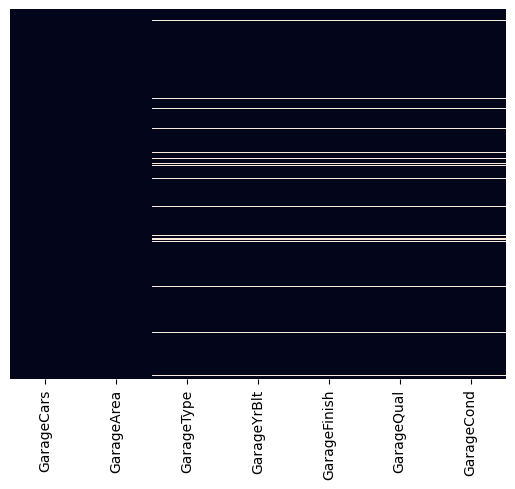

In [61]:
garage_vars = ['GarageCars', 'GarageArea','GarageType','GarageYrBlt',
               'GarageFinish', 'GarageQual', 'GarageCond']
sns.heatmap(hp[garage_vars].isnull(),yticklabels = False, cbar = False )

In [62]:
hp['GarageArea'].isin([0, np.nan]).sum()

158

In [63]:
#Checking the values of the other garage variables when the garage area is 0
hp[hp['GarageArea'].isin([0, np.nan])][garage_vars]

GarageCars  GarageArea GarageType  GarageYrBlt GarageFinish GarageQual  \
39           0.0         0.0        NaN          NaN          NaN        NaN   
48           0.0         0.0        NaN          NaN          NaN        NaN   
78           0.0         0.0        NaN          NaN          NaN        NaN   
88           0.0         0.0        NaN          NaN          NaN        NaN   
89           0.0         0.0        NaN          NaN          NaN        NaN   
99           0.0         0.0        NaN          NaN          NaN        NaN   
108          0.0         0.0        NaN          NaN          NaN        NaN   
125          0.0         0.0        NaN          NaN          NaN        NaN   
127          0.0         0.0        NaN          NaN          NaN        NaN   
140          0.0         0.0        NaN          NaN          NaN        NaN   
148          0.0         0.0        NaN          NaN          NaN        NaN   
155          0.0         0.0        NaN          NaN          NaN        NaN   
163          0.0         0.0        NaN          NaN          NaN        NaN   
165          0.0         0.0        NaN          NaN          NaN        NaN   
198          0.0         0.0        NaN          NaN          NaN        NaN   
210          0.0         0.0        NaN          NaN          NaN        NaN   
241          0.0         0.0        NaN          NaN          NaN        NaN   
250          0.0         0.0        NaN          NaN          NaN        NaN   
287          0.0         0.0        NaN          NaN          NaN        NaN   
291          0.0         0.0        NaN          NaN          NaN        NaN   
307          0.0         0.0        NaN          NaN          NaN        NaN   
375          0.0         0.0        NaN          NaN          NaN        NaN   
386          0.0         0.0        NaN          NaN          NaN        NaN   
393          0.0         0.0        NaN          NaN          NaN        NaN   
431          0.0         0.0        NaN          NaN          NaN        NaN   
434          0.0         0.0        NaN          NaN          NaN        NaN   
441          0.0         0.0        NaN          NaN          NaN        NaN   
464          0.0         0.0        NaN          NaN          NaN        NaN   
495          0.0         0.0        NaN          NaN          NaN        NaN   
520          0.0         0.0        NaN          NaN          NaN        NaN   
528          0.0         0.0        NaN          NaN          NaN        NaN   
533          0.0         0.0        NaN          NaN          NaN        NaN   
535          0.0         0.0        NaN          NaN          NaN        NaN   
562          0.0         0.0        NaN          NaN          NaN        NaN   
582          0.0         0.0        NaN          NaN          NaN        NaN   
613          0.0         0.0        NaN          NaN          NaN        NaN   
614          0.0         0.0        NaN          NaN          NaN        NaN   
620          0.0         0.0        NaN          NaN          NaN        NaN   
635          0.0         0.0        NaN          NaN          NaN        NaN   
636          0.0         0.0        NaN          NaN          NaN        NaN   
638          0.0         0.0        NaN          NaN          NaN        NaN   
649          0.0         0.0        NaN          NaN          NaN        NaN   
705          0.0         0.0        NaN          NaN          NaN        NaN   
710          0.0         0.0        NaN          NaN          NaN        NaN   
738          0.0         0.0        NaN          NaN          NaN        NaN   
750          0.0         0.0        NaN          NaN          NaN        NaN   
784          0.0         0.0        NaN          NaN          NaN        NaN   
826          0.0         0.0        NaN          NaN          NaN        NaN   
843          0.0         0.0        NaN          NaN          NaN        NaN   
921   

* Similar to Pool variables, wherever garage area value is 0, all the other attributes have a value missing. 
* Means that those values logically are not required as there is no garage.

In [64]:
hp['GarageCars'].unique()

array([ 2.,  3.,  1.,  0.,  4.,  5., nan])

Will deal with garage variables as below:
* ['GarageArea', 'GarageYrBlt'] to be dropped to avoid multicorrelation as we saw through the heatmap earlier. Although, for the sake of feature generation, will impute the na values of GarageYrBlt later on analysing the variable.
* ['GarageCars'] is a numerical variable. It will be imputed with 0, if garage area is 0.
* ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] are categorical variables. They'll be imputed with 'None'

In [65]:
hp[garage_vars].isnull().sum().sort_values(ascending = False)

GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
GarageType      157
GarageCars        1
GarageArea        1
dtype: int64

In [66]:
#Imputing 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
hp.loc[hp['GarageArea'].isin([0, np.nan]), ['GarageType', 'GarageFinish','GarageQual','GarageCond']] = hp.loc[hp['GarageArea'].isin([0, np.nan]), 
['GarageType','GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

In [67]:
#Imputing GarageCars
hp.loc[hp['GarageArea'].isin([0, np.nan]), ['GarageCars', 'GarageArea']] = hp.loc[hp['GarageArea'].isin([0, np.nan]),
                                                                  ['GarageCars', 'GarageArea']].fillna(0)

In [68]:
missing_pcnt(hp[garage_vars])

Total  Percent
GarageYrBlt     159     5.45
GarageFinish      1     0.03
GarageQual        1     0.03
GarageCond        1     0.03

In [69]:
hp[garage_vars][hp['GarageArea'].isin([0, np.nan])]

GarageCars  GarageArea GarageType  GarageYrBlt GarageFinish GarageQual  \
39           0.0         0.0       None          NaN         None       None   
48           0.0         0.0       None          NaN         None       None   
78           0.0         0.0       None          NaN         None       None   
88           0.0         0.0       None          NaN         None       None   
89           0.0         0.0       None          NaN         None       None   
99           0.0         0.0       None          NaN         None       None   
108          0.0         0.0       None          NaN         None       None   
125          0.0         0.0       None          NaN         None       None   
127          0.0         0.0       None          NaN         None       None   
140          0.0         0.0       None          NaN         None       None   
148          0.0         0.0       None          NaN         None       None   
155          0.0         0.0       None          NaN         None       None   
163          0.0         0.0       None          NaN         None       None   
165          0.0         0.0       None          NaN         None       None   
198          0.0         0.0       None          NaN         None       None   
210          0.0         0.0       None          NaN         None       None   
241          0.0         0.0       None          NaN         None       None   
250          0.0         0.0       None          NaN         None       None   
287          0.0         0.0       None          NaN         None       None   
291          0.0         0.0       None          NaN         None       None   
307          0.0         0.0       None          NaN         None       None   
375          0.0         0.0       None          NaN         None       None   
386          0.0         0.0       None          NaN         None       None   
393          0.0         0.0       None          NaN         None       None   
431          0.0         0.0       None          NaN         None       None   
434          0.0         0.0       None          NaN         None       None   
441          0.0         0.0       None          NaN         None       None   
464          0.0         0.0       None          NaN         None       None   
495          0.0         0.0       None          NaN         None       None   
520          0.0         0.0       None          NaN         None       None   
528          0.0         0.0       None          NaN         None       None   
533          0.0         0.0       None          NaN         None       None   
535          0.0         0.0       None          NaN         None       None   
562          0.0         0.0       None          NaN         None       None   
582          0.0         0.0       None          NaN         None       None   
613          0.0         0.0       None          NaN         None       None   
614          0.0         0.0       None          NaN         None       None   
620          0.0         0.0       None          NaN         None       None   
635          0.0         0.0       None          NaN         None       None   
636          0.0         0.0       None          NaN         None       None   
638          0.0         0.0       None          NaN         None       None   
649          0.0         0.0       None          NaN         None       None   
705          0.0         0.0       None          NaN         None       None   
710          0.0         0.0       None          NaN         None       None   
738          0.0         0.0       None          NaN         None       None   
750          0.0         0.0       None          NaN         None       None   
784          0.0         0.0       None          NaN         None       None   
826          0.0         0.0       None          NaN         None       None   
843          0.0         0.0       None          NaN         None       None   
921   

Since garage exists for the remaining missing values. Variables like GarageFinish, GarageQual, GarageCond will be imputed later when dealing with mod imputation.

##### Checking for GarageYrBlt

If the GarageYrblt is missing, we can’t just impute it with 0, it would make no sense. So for those missing values, would assume that the GarageYrblt was same as house YearBuilt.

In [70]:
#If the house has no garage we can't just impute with year 0, makes no sense. 
hp.update(hp['GarageYrBlt'].fillna(hp.YearBuilt))

Since, this variable might be used for feature generation later, will quickly check whether it has valid values.

Text(0, 0.5, 'GarageYrBlt')

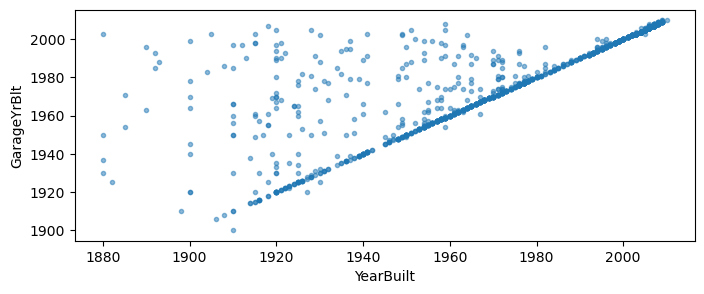

In [71]:
#Checking if all houses were already built with a garage or if it was constructed later on and checking whether values are valid 
plt.figure(figsize=(8,3))
plt.plot(hp_train.YearBuilt, hp_train.GarageYrBlt,'.', alpha=0.5)
plt.xlabel("YearBuilt")
plt.ylabel("GarageYrBlt")


***Observation:*** There are some houses which have garages built even before the houses (points below the diagonal), which is ridiculous. We can update these values as the house YearBuilt values.

In [72]:
hp.loc[hp['YearBuilt'] > hp['GarageYrBlt'],['YearBuilt', 'GarageYrBlt']]

YearBuilt  GarageYrBlt
29         1927       1920.0
93         1910       1900.0
324        1967       1961.0
600        2005       2003.0
736        1950       1949.0
1103       1959       1954.0
1376       1930       1925.0
1414       1923       1922.0
1418       1963       1962.0
61         1959       1956.0
116        2010       2009.0
345        1935       1920.0
380        1978       1960.0
435        1941       1940.0
437        1935       1926.0
662        1945       1925.0
803        2006       2005.0
1049       2006       2005.0

In [73]:
hp.reset_index(drop=True, inplace=True)
hp.loc[hp['YearBuilt'] > hp['GarageYrBlt'],'GarageYrBlt']=hp['YearBuilt']
hp.loc[hp['YearBuilt'] > hp['GarageYrBlt'],['YearBuilt', 'GarageYrBlt']]

Empty DataFrame
Columns: [YearBuilt, GarageYrBlt]
Index: []

In [74]:
missing_pcnt(hp)

Total  Percent
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
SalePrice      1459    49.98
FireplaceQu    1420    48.65
LotFrontage     486    16.65
BsmtCond         82     2.81
BsmtExposure     82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrType       24     0.82
MasVnrArea       23     0.79
MSZoning          4     0.14
PoolQC            3     0.10
Utilities         2     0.07
BsmtFullBath      2     0.07
BsmtHalfBath      2     0.07
Functional        2     0.07
BsmtFinSF2        1     0.03
GarageQual        1     0.03
SaleType          1     0.03
Exterior1st       1     0.03
GarageCond        1     0.03
Exterior2nd       1     0.03
GarageFinish      1     0.03
BsmtFinSF1        1     0.03
KitchenQual       1     0.03
Electrical        1     0.03
TotalBsmtSF       1     0.03
BsmtUnfSF         1     0.03

#### Checking Basement related variables

Next, checking the Basement related columns with high number of missing values (BsmtCond, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2). On examining the combination of these variables, it is clear that whenever these variables have a missing value, columns like TotalBsmtSF (Total basement surface area) have the value of 0. This essentially means that basement doesn’t exist for those houses.

<Axes: >

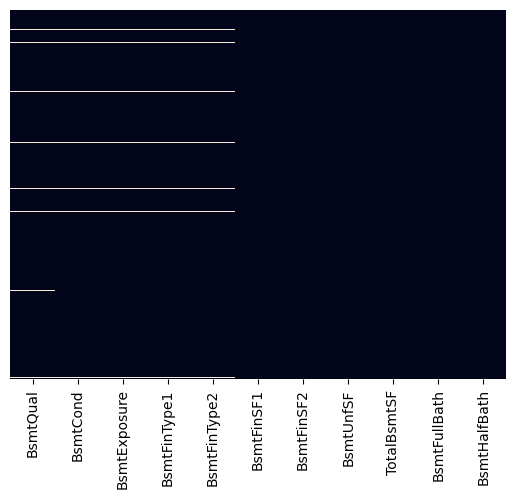

In [75]:
bsmt_vars = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 
             'BsmtFinType2', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 
             'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']
sns.heatmap(hp[bsmt_vars].isnull(),yticklabels = False, cbar = False )

In [76]:
#Since these cols have almost same % of values missing, checking the values of all the cols against one col.
#hp_bsmt[hp_bsmt['BsmtFinType1'].isna()]

hp[hp['TotalBsmtSF'].isin([np.nan, 0])][bsmt_vars]
#Whenever stuck, remind yourself that when a column has a value and its not nan,
#it doesn't necessarily mean that the value is more than 0. Value can be 0 as well.

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN         0.0   
39        NaN      NaN          NaN          NaN          NaN         0.0   
90        NaN      NaN          NaN          NaN          NaN         0.0   
102       NaN      NaN          NaN          NaN          NaN         0.0   
156       NaN      NaN          NaN          NaN          NaN         0.0   
182       NaN      NaN          NaN          NaN          NaN         0.0   
259       NaN      NaN          NaN          NaN          NaN         0.0   
342       NaN      NaN          NaN          NaN          NaN         0.0   
362       NaN      NaN          NaN          NaN          NaN         0.0   
371       NaN      NaN          NaN          NaN          NaN         0.0   
392       NaN      NaN          NaN          NaN          NaN         0.0   
520       NaN      NaN          NaN          NaN          NaN         0.0   
532       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
553       NaN      NaN          NaN          NaN          NaN         0.0   
646       NaN      NaN          NaN          NaN          NaN         0.0   
705       NaN      NaN          NaN          NaN          NaN         0.0   
736       NaN      NaN          NaN          NaN          NaN         0.0   
749       NaN      NaN          NaN          NaN          NaN         0.0   
778       NaN      NaN          NaN          NaN          NaN         0.0   
868       NaN      NaN          NaN          NaN          NaN         0.0   
894       NaN      NaN          NaN          NaN          NaN         0.0   
897       NaN      NaN          NaN          NaN          NaN         0.0   
984       NaN      NaN          NaN          NaN          NaN         0.0   
1000      NaN      NaN          NaN          NaN          NaN         0.0   
1011      NaN      NaN          NaN          NaN          NaN         0.0   
1035      NaN      NaN          NaN          NaN          NaN         0.0   
1045      NaN      NaN          NaN          NaN          NaN         0.0   
1048      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1090      NaN      NaN          NaN          NaN          NaN         0.0   
1179      NaN      NaN          NaN          NaN          NaN         0.0   
1216      NaN      NaN          NaN          NaN          NaN         0.0   
1218      NaN      NaN          NaN          NaN          NaN         0.0   
1232      NaN      NaN          NaN          NaN          NaN         0.0   
1321      NaN      NaN          NaN          NaN          NaN         0.0   
1412      NaN      NaN          NaN          NaN          NaN         0.0   
1585      NaN      NaN          NaN          NaN          NaN         0.0   
1593      NaN      NaN          NaN          NaN          NaN         0.0   
1729      NaN      NaN          NaN          NaN          NaN         0.0   
1778      NaN      NaN          NaN          NaN          NaN         0.0   
1814      NaN      NaN          NaN          NaN          NaN         0.0   
1847      NaN      NaN          NaN          NaN          NaN         0.0   
1848      NaN      NaN          NaN          NaN          NaN         0.0   
1856      NaN      NaN          NaN          NaN          NaN         0.0   
1857      NaN      NaN          NaN          NaN          NaN         0.0   
1858      NaN      NaN          NaN          NaN          NaN         0.0   
1860      NaN      NaN          NaN          NaN          NaN         0.0   
1915      NaN      NaN          NaN          NaN          NaN         0.0   
2050      NaN      NaN          NaN          NaN          NaN         0.0   
2066      NaN      NaN          NaN          NaN          NaN         0.0   
2

* For rows where value of TotalBsmtSF i.e Total basement surface area is 0 or Nan, all other basement variables show NaN or 0.
* This means basement doesn't exist for those houses
* If the basement doesn't exist than none of the other basement variables can have a value either.
* Hence nan can be filled with none for all those variables.

In [77]:
#hp[bsmt_vars].isnull().sum().sort_values(ascending = False)
missing_pcnt(hp[bsmt_vars])

Total  Percent
BsmtCond         82     2.81
BsmtExposure     82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
BsmtFullBath      2     0.07
BsmtHalfBath      2     0.07
BsmtFinSF1        1     0.03
BsmtFinSF2        1     0.03
BsmtUnfSF         1     0.03
TotalBsmtSF       1     0.03

***Will deal with basement variables as below:***

***Categorical variables***
* ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
* Impute 'None'

***Continuous numeric variables***
* ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',  'BsmtHalfBath']
* Impute with 0 as absence of value.

In [78]:
#Imputing None for all the bsmt variables corresponding to Total basement area being 0 or nan.
#Categorical Variables
hp.loc[hp['TotalBsmtSF'].isin([np.nan, 0.0]), ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2']] = hp.loc[hp['TotalBsmtSF'].isin([np.nan, 0]), ['BsmtQual', 
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')
#Continuous Variables
hp.loc[hp['TotalBsmtSF'].isin([np.nan, 0.0]), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']] = hp.loc[hp['TotalBsmtSF'].isin([np.nan, 0]), ['BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [79]:
missing_pcnt(hp[bsmt_vars])

Total  Percent
BsmtCond          3     0.10
BsmtExposure      3     0.10
BsmtQual          2     0.07
BsmtFinType2      1     0.03

Will deal with missing values in BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2 later when dealing with mod imputation for categorical variables.

In [80]:
#Checking the imputation as per column
hp[hp['TotalBsmtSF'].isin(['None', 0])][bsmt_vars]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17       None     None         None         None         None         0.0   
39       None     None         None         None         None         0.0   
90       None     None         None         None         None         0.0   
102      None     None         None         None         None         0.0   
156      None     None         None         None         None         0.0   
182      None     None         None         None         None         0.0   
259      None     None         None         None         None         0.0   
342      None     None         None         None         None         0.0   
362      None     None         None         None         None         0.0   
371      None     None         None         None         None         0.0   
392      None     None         None         None         None         0.0   
520      None     None         None         None         None         0.0   
532      None     None         None         None         None         0.0   
533      None     None         None         None         None         0.0   
553      None     None         None         None         None         0.0   
646      None     None         None         None         None         0.0   
705      None     None         None         None         None         0.0   
736      None     None         None         None         None         0.0   
749      None     None         None         None         None         0.0   
778      None     None         None         None         None         0.0   
868      None     None         None         None         None         0.0   
894      None     None         None         None         None         0.0   
897      None     None         None         None         None         0.0   
984      None     None         None         None         None         0.0   
1000     None     None         None         None         None         0.0   
1011     None     None         None         None         None         0.0   
1035     None     None         None         None         None         0.0   
1045     None     None         None         None         None         0.0   
1048     None     None         None         None         None         0.0   
1049     None     None         None         None         None         0.0   
1090     None     None         None         None         None         0.0   
1179     None     None         None         None         None         0.0   
1216     None     None         None         None         None         0.0   
1218     None     None         None         None         None         0.0   
1232     None     None         None         None         None         0.0   
1321     None     None         None         None         None         0.0   
1412     None     None         None         None         None         0.0   
1585     None     None         None         None         None         0.0   
1593     None     None         None         None         None         0.0   
1729     None     None         None         None         None         0.0   
1778     None     None         None         None         None         0.0   
1814     None     None         None         None         None         0.0   
1847     None     None         None         None         None         0.0   
1848     None     None         None         None         None         0.0   
1856     None     None         None         None         None         0.0   
1857     None     None         None         None         None         0.0   
1858     None     None         None         None         None         0.0   
1860     None     None         None         None         None         0.0   
1915     None     None         None         None         None         0.0   
2050     None     None         None         None         None         0.0   
2066     None     None         None         None         None         0.0   
2

#### Checking for 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' variables

Finally, other variables like MiscFeature, Alley, Fence, FireplaceQu, whose missing values occupy over 50% of the total (apart from SalePrice which is our target variable), similarly, will also mean that that feature doesn't exist for the house.

In [81]:
other_none = hp[['MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]

for i in other_none.columns:
    print(other_none[i].value_counts(), "\n")

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64 

Alley
Grvl    120
Pave     78
Name: count, dtype: int64 

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64 

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64 



In [82]:
hp.update(other_none.fillna("None"))

Could have deleted these features, but by retaining them this way, I aim to minimize the loss of valuable information from the dataset. If this was an ongoing project with continuous data accumulation, these columns may gain significance and could play a substantial role in enhancing the overall model, if identified as important features later.

In [83]:
missing_pcnt(hp)

Total  Percent
SalePrice      1459    49.98
LotFrontage     486    16.65
MasVnrType       24     0.82
MasVnrArea       23     0.79
MSZoning          4     0.14
BsmtCond          3     0.10
BsmtExposure      3     0.10
PoolQC            3     0.10
BsmtQual          2     0.07
Utilities         2     0.07
Functional        2     0.07
Exterior2nd       1     0.03
Exterior1st       1     0.03
Electrical        1     0.03
KitchenQual       1     0.03
GarageFinish      1     0.03
GarageQual        1     0.03
GarageCond        1     0.03
SaleType          1     0.03
BsmtFinType2      1     0.03

### B. Categorical Features - b. Imputing values with Mode

***Imputing values with Mode***
For the features, that seem to exist for the house as they are being measured, I can’t just impute None. So now, focusing on another way to address missing values for categorical features involves filling them with the mode value.
In our case, all the remaining categorical features with missing values have a dominant value for the data. Since there are no discernible reasons for the values to be missing, assumption is that data is missing at random. Hence, like the majority of the other observations, the missing values are likely to align with the most typical value, the mode.

In [84]:
#Since missing values in each col is just 1-2, thought to check incase they all fall for a particular row, 
#so just that row can be dropped instead of working on each col individually.
hp_cat_nan=hp[['MSZoning','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities','Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'Exterior1st', 'Electrical', 'KitchenQual', 'GarageCars', 'GarageArea', 'SaleType', 'TotalBsmtSF']]

hp_cat_nan[hp_cat_nan['Exterior2nd'].isna()]

#Observation: All missing values are not part of just one row. Have to work on the cols.

MSZoning  BsmtFullBath  BsmtHalfBath Functional Utilities Exterior2nd  \
2151       RL           1.0           0.0        Typ    AllPub         NaN   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF Exterior1st Electrical KitchenQual  \
2151      1035.0         0.0      545.0         NaN      SBrkr          Fa   

      GarageCars  GarageArea SaleType  TotalBsmtSF  
2151         0.0         0.0       WD       1580.0

In [85]:
impute_mode = hp[['PoolQC','MasVnrType', 'MSZoning', 'Functional', 'Exterior1st','Exterior2nd', 'Electrical', 
                  'KitchenQual', 'SaleType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2',
                  'GarageFinish','GarageQual', 'GarageCond']]

for i in impute_mode.columns:
    print(hp[i].value_counts(),'\n')

PoolQC
None    2906
Ex         4
Gd         4
Fa         2
Name: count, dtype: int64 

MasVnrType
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64 

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64 

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64 

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64 

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dt

In [86]:
for i in impute_mode:
    hp[i].fillna(hp_train[i].mode()[0], inplace=True)

#[0]: to extract the first mode in case there are multiple modes

Here, we have to be careful about data leakage. While taking mode, only consider the training dataset and not the entire data which has test set as well. This is to make sure that we use no information from our future data and can fairly evaluate model performance on test data.

In [87]:
missing_pcnt(hp)

Total  Percent
SalePrice     1459    49.98
LotFrontage    486    16.65
MasVnrArea      23     0.79
Utilities        2     0.07

### C. Numerical variables -  Mean or Median

In the case of categorical variables, where the occurrence of missing values seemed random, I employed mode imputation. Now, for numerical variables exhibiting a similar pattern of missing values, I will utilize mean or median imputation.

•	LotFrontage, it’s the width of the lot along the front boundary that faces the street. Lot frontage area must be > 0 as the front door cannot open right into the street. This variable has only about 17% missing data, hence should not be dropped. 
To address the missing values, have gone with the median imputation. However, rather than computing the median across the entire dataset, a median LotFrontage value is calculated based on each neighborhood. This is since, the frontage area of each street connected to the house is most likely to have a similar area as the other houses in its neighborhood. 

In [88]:
# median_lot_neigh = hp.pivot_table(index ="Neighborhood", values ="LotFrontage" , aggfunc = "median")
# median_lot_neigh

#This code using pivot_table here is for reference to view how the df would have looked when groupby is applied. 
#This is since groupby doesn't return a df and gives an object, it can't be viewed.

In [89]:
#Calculate median LotFrontage for each neighborhood
median_lot_neigh = hp_train.groupby("Neighborhood")["LotFrontage"].median()

#Apply imputation directly to the entire column using fillna
hp["LotFrontage"] = hp["LotFrontage"].fillna(hp["Neighborhood"].map(median_lot_neigh)).astype(float)

#hp["Neighborhood"].map(neigh_median_lot): it maps each neighborhood to its corresponding median LotFrontage value using the neigh_median_lot Series.
#.astype(float): It ensures that the "LotFrontage" col contains float values, which is consistent with the data type of the original col.  

Likewise, for MasVnrArea, the imputation strategy involves calculating the median value specific to each MasVnrType category, rather than using the median of the entire dataset. This approach accounts for variations in MasVnrArea within different MasVnrType groups.

In [90]:
#Calculate median MasVnrArea for each MasVnrType 
median_masvnr = hp_train.groupby("MasVnrType")["MasVnrArea"].median()

#Apply imputation directly to the entire column using fillna
hp["MasVnrArea"] = hp["MasVnrArea"].fillna(hp["MasVnrType"].map(median_masvnr)).astype(float)    

In [91]:
missing_pcnt(hp)

Total  Percent
SalePrice   1459    49.98
Utilities      2     0.07

### D. Dropping the variable

Finally only one variable remains, Utilities. A quick look at its categories reveals a consistent value throughout. Hence, as the variable has no distinguishing information to offer to the model, the variable can be dropped.

In [92]:
hp['Utilities'].value_counts()
#It has no information for the model to learn. So can be dropped.

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [93]:
hp.drop('Utilities', axis = 1, inplace = True)
#hp.drop(['Id', 'Utilities'], axis = 1, inplace = True)

#We'll keep 'ID' variable, as we need it in the prediction to be submitted.
#numerical_cols.remove('Id')
#num.remove('Id')
ordinal.remove('Utilities')

#Dropping variables with possibility of multi collinearity
#Will drop GarageYrBlt, GarageArea & 1stFlrSF later, as we might need it for feature engineering.
#hp.dropna(inplace = True) Dont do this as it may also delete a row from the test data whose value has to be submitted

In [94]:
missing_pcnt(hp)

Total  Percent
SalePrice   1459    49.98

In [95]:
hp.shape

(2919, 81)

In [96]:
# #Filling up the missing values in each column by just their mean and mode values without analysing them.
# hp['MSZoning'] = hp['MSZoning'].fillna(hp['MSZoning'].mode()[0])
# hp['Utilities'] = hp['Utilities'].fillna(hp['Utilities'].mode()[0])
# hp['Exterior1st'] = hp['Exterior1st'].fillna(hp['Exterior1st'].mode()[0])
# hp['Exterior2nd'] = hp['Exterior2nd'].fillna(hp['Exterior2nd'].mode()[0])
# hp['BsmtFinSF1'] = hp['BsmtFinSF1'].fillna(hp['BsmtFinSF1'].mean())
# hp['BsmtFinSF2'] = hp['BsmtFinSF2'].fillna(hp['BsmtFinSF2'].mean())
# hp['BsmtUnfSF'] = hp['BsmtUnfSF'].fillna(hp['BsmtUnfSF'].mean())
# hp['TotalBsmtSF'] = hp['TotalBsmtSF'].fillna(hp['TotalBsmtSF'].mean())
# hp['Electrical'] = hp['Electrical'].fillna(hp['Electrical'].mode()[0])
# hp['KitchenQual'] = hp['KitchenQual'].fillna(hp['KitchenQual'].mode()[0])
# hp['BsmtFullBath'] = hp['BsmtFullBath'].fillna(hp['BsmtFullBath'].mean())
# hp['BsmtHalfBath'] = hp['BsmtHalfBath'].fillna(hp['BsmtHalfBath'].mean())
# hp['Functional'] = hp['Functional'].fillna(hp['Functional'].mode()[0])
# hp['GarageCars'] = hp['GarageCars'].fillna(hp['GarageCars'].mean())
# hp['GarageArea'] = hp['GarageArea'].fillna(hp['GarageArea'].mean())
# hp['SaleType'] = hp['SaleType'].fillna(hp['SaleType'].mode()[0])
# hp['LotFrontage'] = hp['LotFrontage'].fillna(hp['LotFrontage'].mean())
# hp['BsmtQual'] = hp['BsmtQual'].fillna(hp['BsmtQual'].mode()[0])
# hp['BsmtCond'] = hp['BsmtCond'].fillna(hp['BsmtCond'].mode()[0])
# hp['BsmtExposure'] = hp['BsmtExposure'].fillna(hp['BsmtExposure'].mode()[0])
# hp['BsmtFinType1'] = hp['BsmtFinType1'].fillna(hp['BsmtFinType1'].mode()[0])
# hp['BsmtFinType2'] = hp['BsmtFinType2'].fillna(hp['BsmtFinType2'].mode()[0])
# hp['FireplaceQu'] = hp['FireplaceQu'].fillna(hp['FireplaceQu'].mode()[0])
# hp['GarageType'] = hp['GarageType'].fillna(hp['GarageType'].mode()[0])
# hp['GarageFinish'] = hp['GarageFinish'].fillna(hp['GarageFinish'].mode()[0])
# hp['GarageQual'] = hp['GarageQual'].fillna(hp['GarageQual'].mode()[0])
# hp['GarageCond'] = hp['GarageCond'].fillna(hp['GarageCond'].mode()[0])
# hp['MasVnrType'] = hp['MasVnrType'].fillna(hp['MasVnrType'].mode()[0])
# hp['MasVnrArea'] = hp['MasVnrArea'].fillna(hp['MasVnrArea'].mean())

## 2.2 Feature Generation

Feature generation is the art of crafting new, more informative attributes from existing data. These features capture hidden patterns and relationships within the dataset. This way we empower models to better understand and predict. The process involves mathematical transformations, aggregations, or combining existing attributes to create new ones.

In [97]:
hp['N_HasWoodDeck'] = (hp['WoodDeckSF'] != 0) * 1 #*1 changes boolean value to 1 & 0. So if porch exists than 1 or else 0
hp['N_HasOpenPorch'] = (hp['OpenPorchSF'] != 0) * 1
hp['N_HasEnclosedPorch'] = (hp['EnclosedPorch'] != 0) * 1
hp['N_Has3SsnPorch'] = (hp['3SsnPorch'] != 0) * 1
hp['N_HasScreenPorch'] = (hp['ScreenPorch'] != 0) * 1

hp['N_Haspool'] = hp['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
hp['N_Has2ndfloor'] = hp['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp['N_Hasgarage'] = hp['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
hp['N_Hasbsmt'] = hp['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hp['N_Hasfireplace'] = hp['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

hp['N_Remodeled'] = hp['YearRemodAdd'] - hp['YearBuilt']
hp['N_Remodeled'] = hp.apply(lambda x: x['N_Remodeled'] > 0 and 1.0 or 0.0, axis=1).astype(float)
hp['N_YearsSinceRemodel'] = hp['YrSold'].astype(int) - hp['YearRemodAdd'].astype(int)
hp['N_HouseAge'] = hp['YrSold'].astype(int) - hp['YearBuilt'].astype(int) #hp['YearRemodAdd'] - hp['YearBuilt'] 
#hp['HouseAge'] = np.where(hp['YearRemodAdd'] > 0, (hp['YrSold'].astype(int) - hp['YearRemodAdd'].astype(int)), (hp['YrSold'].astype(int) - hp['YearBuilt'].astype(int)))

hp['N_TotalSF'] = hp['TotalBsmtSF'] + hp['1stFlrSF'] + hp['2ndFlrSF']
#complete house area
hp['N_HouseArea'] = hp['LotArea'] + hp['MasVnrArea'] + hp['GrLivArea'] + hp['GarageArea'] + hp['PoolArea'] + hp['TotalBsmtSF']
hp['N_Total_porch_sf'] = hp['OpenPorchSF'] + hp['3SsnPorch'] + hp['EnclosedPorch'] + hp['ScreenPorch'] + hp['WoodDeckSF']
hp['N_Low_UF_SF'] = hp['BsmtUnfSF'] + hp['LowQualFinSF'] #self
hp['N_Total_Bathrooms'] = hp['FullBath'] + (0.5 * hp['HalfBath']) + hp['BsmtFullBath'] + (0.5 * hp['BsmtHalfBath'])
hp['N_Total_Home_Quality'] = hp['OverallQual'] + hp['OverallCond']


Here I have created above features as:
* ***'N_TotalSF' :*** This is aggregation of square feet area of basement, 1stfloor and 2ndfloor. This is since area of the house is one of the big factors in determining the price.
* ***'N_Total_Bathrooms' :*** This is total number of bathrooms present in the house, half or full. Bathrooms adds convenience upto certain proportion considering the room count.
* ***'N_Total_porch_sf' :*** This is culmination of all porch square feet area.
* ***'N_Remodeled' :*** This is to know whether the house was remodelled. This is since remodelling the house, increases its preference.
* ***'N_YearsSinceRemodel' :*** It calculates how long has it been since the remodelling of the house. Since the most recent remodelled house will be higher in demand.
* ***'N_Total_Home_Quality' :*** This is adding the overall rating.
* ***'N_HouseArea' :*** This is overall house area, including the amenities in the house.
* ***'N_HouseAge' :*** This is age of the house. Newer the house, more likely for the house to be sold at a higher price, as we see in the scatter plot as well.
* ***'N_Low_UF_SF' :*** This is all the unfinished square feet of area present in the house. This would either mean that the resident have to put in money to finish it or wait till it’s done by the constructors. Hence, would reflect on the price.
* ***'N_Hasfireplace', 'N_Hasbsmt', 'N_Hasgarage', 'N_Has2ndfloor', 'N_Haspool', 'N_HasScreenPorch', 'N_Has3SsnPorch', 'N_HasEnclosedPorch', 'N_HasOpenPorch', 'N_HasWoodDeck' :*** These variables all show the presence of each facility respectively. This way model would be able to see the relationship between each facility’s presence with the house price, better. 

In [98]:
new_vars = ['N_HasWoodDeck', 'N_HasOpenPorch', 'N_HasEnclosedPorch','N_Has3SsnPorch', 'N_HasScreenPorch', 'N_Haspool',
            'N_Has2ndfloor','N_Hasgarage', 'N_Hasbsmt','N_Hasfireplace', 'N_Remodeled', 'N_YearsSinceRemodel', 
            'N_HouseAge', 'N_TotalSF', 'N_HouseArea', 'N_Total_porch_sf','N_Low_UF_SF', 'N_Total_Bathrooms', 'N_Total_Home_Quality' ]


Since, we have already created new variables from existing ones, we can remove those variables which had very less variability in value, even after taking care of missing values. By creating new variable, we are still using the information from these existing variables.

In [99]:
hp.drop(['PoolArea', 'PoolQC', 'MiscVal', 'MiscFeature'], axis = 1, inplace = True)

In [100]:
for i in ['PoolArea', 'MiscVal']:
    num.remove(i)
    
ordinal.remove('PoolQC')
nominal.remove('MiscFeature')

In [101]:
#Updating the train and test sets for further analysis
hp_train = hp[hp['Data_type'] == 'Train']
hp_test = hp[hp['Data_type'] == 'Test']

hp_train.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7      

In [102]:
for i in ['N_HouseAge', 'N_TotalSF', 'N_HouseArea', 'N_Total_porch_sf', 'N_Low_UF_SF']:
    num.append(i)
print(num)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice', 'N_HouseAge', 'N_TotalSF', 'N_HouseArea', 'N_Total_porch_sf', 'N_Low_UF_SF']


Can see the relation with the SalePrice for each of the newly created variables.

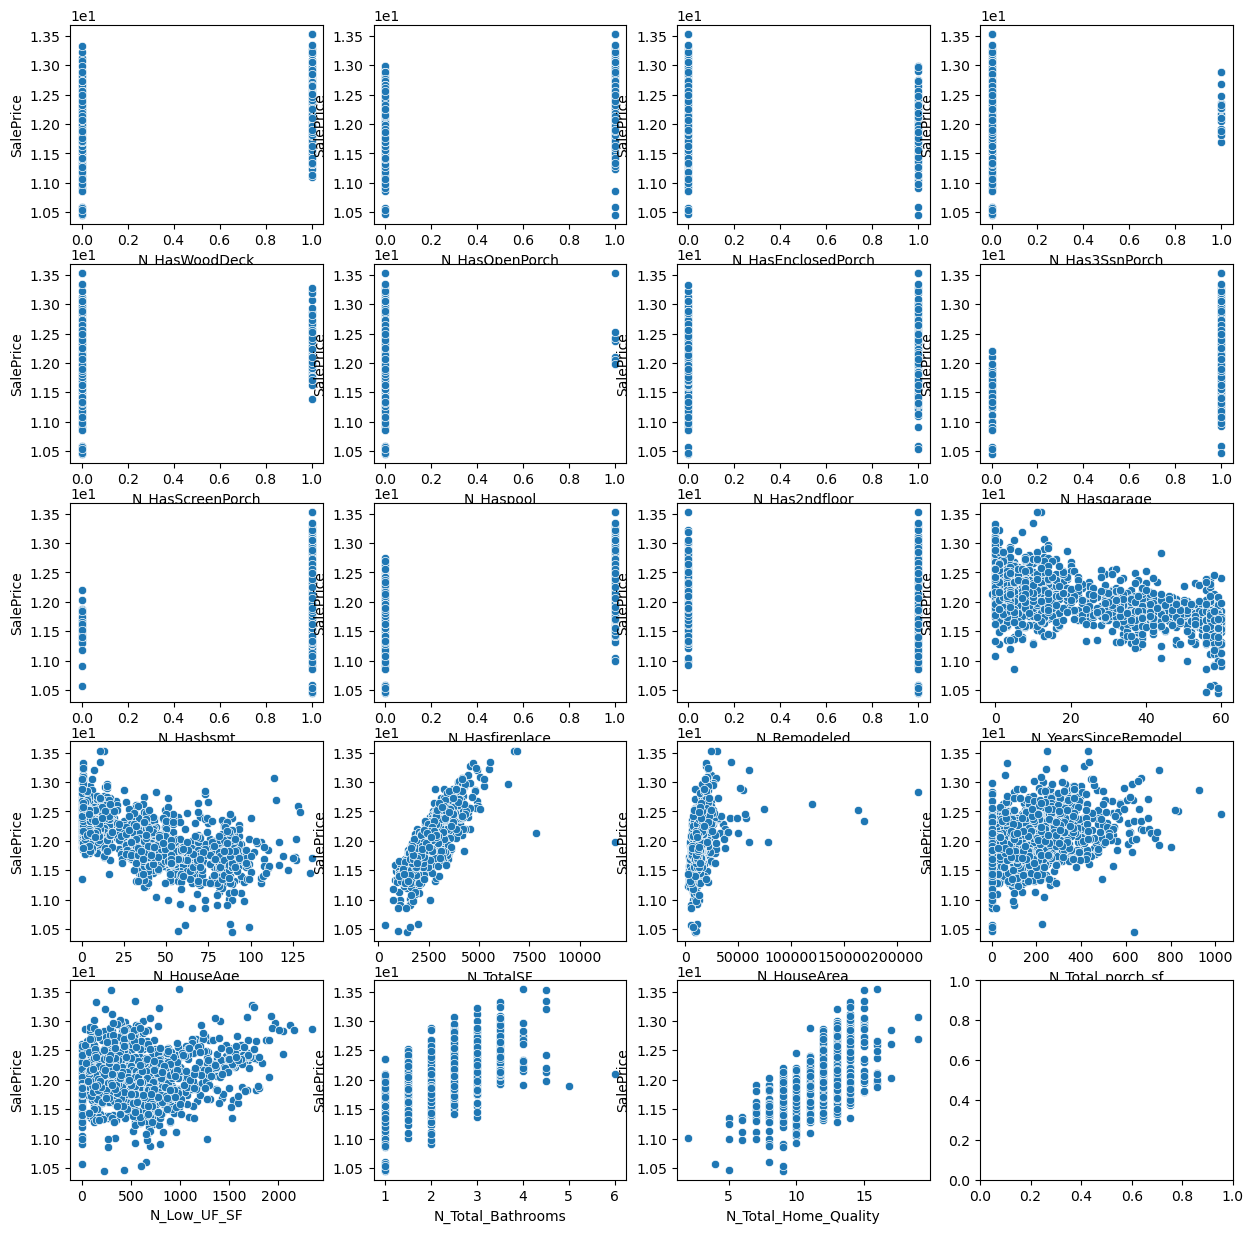

In [103]:
ncols = 4
nrows = int(np.ceil(len(new_vars)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
for i, feature in enumerate(new_vars, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.scatterplot(x=feature, y='SalePrice', data=hp)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature)
    plt.ylabel('SalePrice')#, size=15, labelpad=12.5)
plt.tight_layout
plt.show()

***Observation***
* (N_HouseAge) Newer the house, more likely for the house to be sold at a higher price. 

## 2.3. Handling Outliers

Outliers can have a significant impact on the statistical properties of a dataset and can distort the results of data analysis. Some machine learning algorithms are sensitive to outliers and can get disproportionately influenced by them when making predictions. Removing outliers can help improve the performance and accuracy of these models.

Since, the data is not normally distributed (checked by Shapiro-Wilk Test), will use the methods based on percentiles or interquartile range (IQR). The IQR method is relatively robust to outliers compared to mean and standard deviation-based methods. Since, there are numerous outliers present in our dataset, I’m using a wider range of quartiles (10th to 90th percentile). This might include more data in the "normal" range and be less sensitive to moderate outliers.

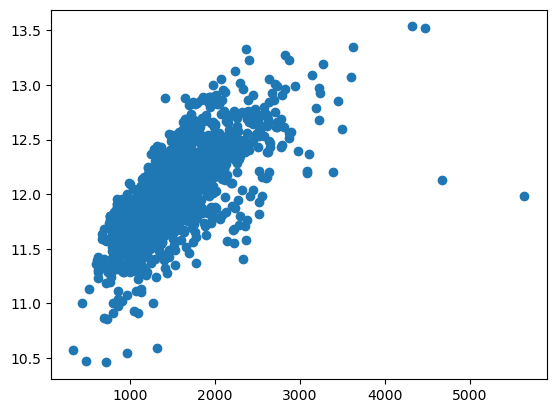

In [104]:
#Bivariate analysis SalePrice & GrLivArea
plt.scatter(x='GrLivArea', y='SalePrice', data = hp_train);

***Observations***
* 5 observations seem outliers. 3 are true outliers i.e. Sales that likely don’t represent actual market values and 2 of them are unusual sales i.e.very large houses priced relatively low.
* 2 values with higher GrLivArea and low Saleprice seem strange. They are not following the trend and are not representative of the typical case. Therefore, they can be categorised as outliers.
* 3 observations in the top have an exceptionally high SalePrice. Although they follow the trend, they look like special cases. For that reason, will keep them for now.

In [105]:
hp_train.drop(hp_train[(hp_train['GrLivArea']>4000) & (hp_train['SalePrice']<300000)].index, inplace=True)
hp_train.reset_index(drop=True, inplace=True)

/var/folders/0_/hkxp5tnx7ls1223y5s_0vk700000gn/T/ipykernel_25277/3724067528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_train.drop(hp_train[(hp_train['GrLivArea']>4000) & (hp_train['SalePrice']<300000)].index, inplace=True)


Outliers removal is not always safe. Deleted these two as they are extremely large areas for very low prices. Hence, outlier that might affect the model badly.

In [106]:
# #deleting points
# hp_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# hp_train = hp_train.drop(hp_train[hp_train['Id'] == 1298].index)
# hp_train = hp_train.drop(hp_train[hp_train['Id'] == 523].index)

# hp_train = hp_train.drop(hp_train[(hp_train['GarageArea']>1200) & (hp_train['SalePrice']<500000)].index)
# hp_train = hp_train.drop(hp_train[(hp_train['TotalBsmtSF']>3000) & (hp_train['SalePrice']<700000)].index)
# hp_train = hp_train.drop(hp_train[(hp_train['1stFlrSF']>2700) & (hp_train['1stFlrSF']<700000)].index)
# hp_train = hp_train.drop(hp_train[(hp_train['OverallQual']<5) & (hp_train['SalePrice']>200000)].index)
# hp_train = hp_train.drop(hp_train[(hp_train['GrLivArea']>4500) & (hp_train['SalePrice']<300000)].index)
# hp.reset_index(drop=True, inplace=True)

# hp_train = hp_train.drop(train[train.LotFrontage > 300].index)
# hp_train = hp_train.drop(train[train.BsmtFinSF1 > 5000].index)
# hp_train = hp_train.drop(train[train.TotalBsmtSF > 6000].index)
# hp_train = hp_train.drop(train[train["1stFlrSF"] > 4000].index)
# hp_train = hp_train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 200000)].index)
# hp_train = hp_train.drop(train[train.EnclosedPorch > 500].index)
# hp_train = hp_train.drop(train[train.MiscVal > 7500].index)

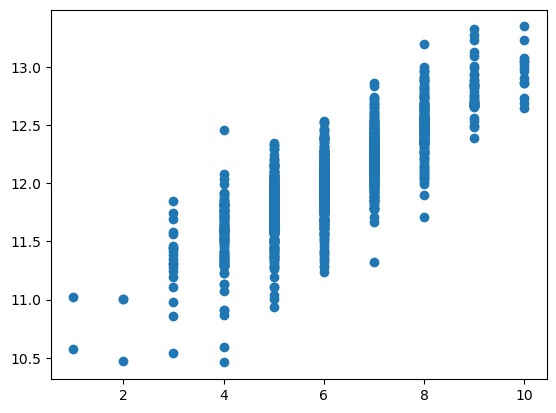

In [107]:
plt.scatter(x='OverallQual', y='SalePrice', data = hp_train);

In [108]:
outlier_cols = [col for col in num if col not in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice']]
print(outlier_cols)

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'N_HouseAge', 'N_TotalSF', 'N_HouseArea', 'N_Total_porch_sf', 'N_Low_UF_SF']


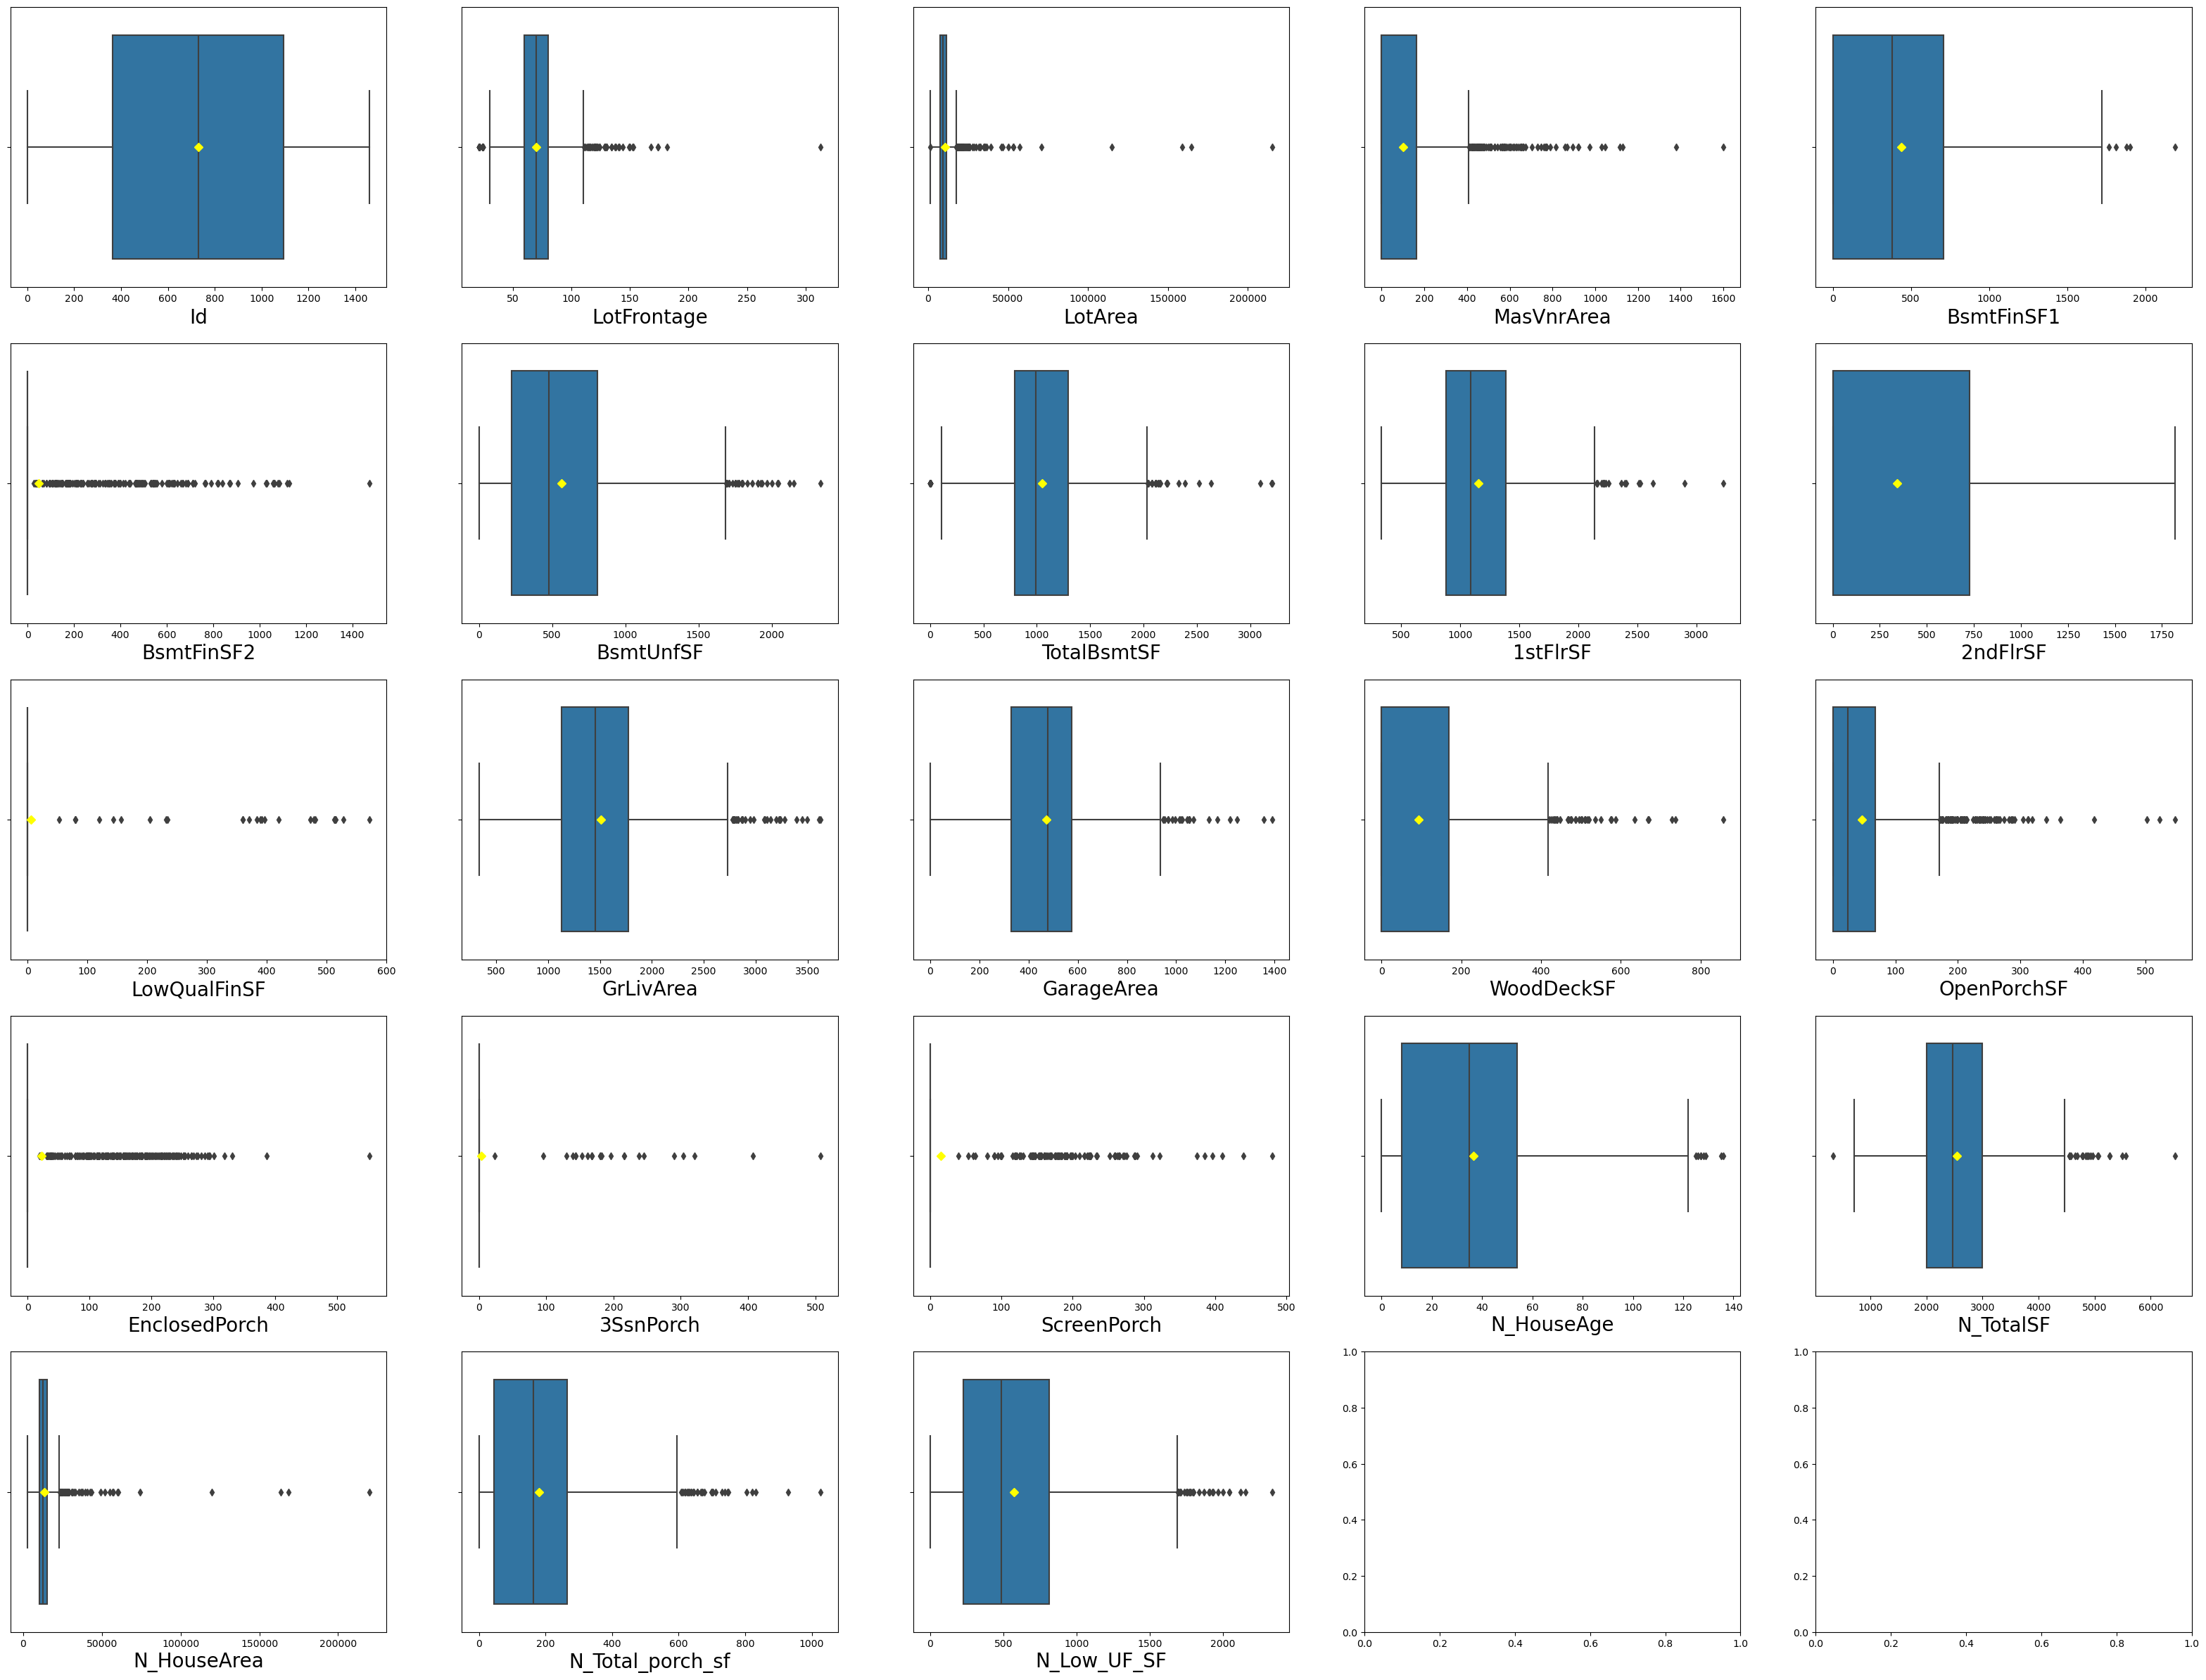

In [109]:
ncols = 5
nrows = int(np.ceil(len(outlier_cols)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 30))
for i, feature in enumerate(outlier_cols, 1):
    plt.subplot(nrows, ncols, i) 
    sns.boxplot(x=hp_train[feature], showmeans=True, meanprops={"marker":"D", "markerfacecolor":"yellow", "markeredgecolor":"yellow"})
    plt.xlabel(feature, size=20)
    
plt.show()


For handling outlier values, have defined three functions that takes in numerical columns (except for the target column) and a dataframe as input. 
* ***outlier_thresholds():*** Calculates the upper and lower limits of acceptable values for a given column based on specified quantiles.
* ***check_outlier():*** Checks if any values in a given column fall outside of these limits.
* ***replace_with_thresholds():*** This function replaces the outlier values with the calculated thresholds, if outlier detected.

In [110]:
#Defining a function that can calculate outlier thresholds for columns
def outlier_thresholds(df, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = df[variable].quantile(low_quantile)
    quantile_three = df[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

#Checking for outliers
def check_outlier(df, num_cols):
    for col in num_cols:
        low_limit, up_limit = outlier_thresholds(df, col)
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            print(col)
        else:
            pass #not printing cols with no outliers

check_outlier(hp, outlier_cols)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
TotalBsmtSF
1stFlrSF
LowQualFinSF
GrLivArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
N_TotalSF
N_HouseArea
N_Total_porch_sf


In [111]:
#Replacing outliers with threshold values
def replace_with_thresholds(df, df_train, num_cols):
    for col in num_cols:
        low_limit, up_limit = outlier_thresholds(df_train, col)
        df.loc[(df[col] < low_limit), col] = low_limit
        df.loc[(df[col] > up_limit), col] = up_limit

replace_with_thresholds(hp, hp_train, outlier_cols)
check_outlier(hp, outlier_cols)

MasVnrArea
BsmtFinSF1
GrLivArea
WoodDeckSF
N_HouseArea


***Observation:***
On checking for outliers again, we still get some variables. Possible reasons could be:
* The IQR method defines outliers based on statistical thresholds (1.5 * IQR above Q3 and below Q1). However, it's possible that our data, which contains extreme values, lies beyond these thresholds, and hence, outliers still exist.
* Some variables in our data have  highly skewed or heavy-tailed distribution, the IQR method might not effectively capture all extreme values, leaving some outliers even after capping.
* I'm not dealing with these variables as of now, this is because I'll be transforming them through one of the transformations later to make the data normally distributed. Transformations like log, box-cox transformations adjusts the data to a more normal-like distribution, potentially reducing the effect of outliers.

Another way to identify the outliers is through visual representations. Plotting the data using box plots, histograms, or scatter plots can help visually identify outliers. Points that fall significantly outside the overall pattern of the data may be considered outliers.

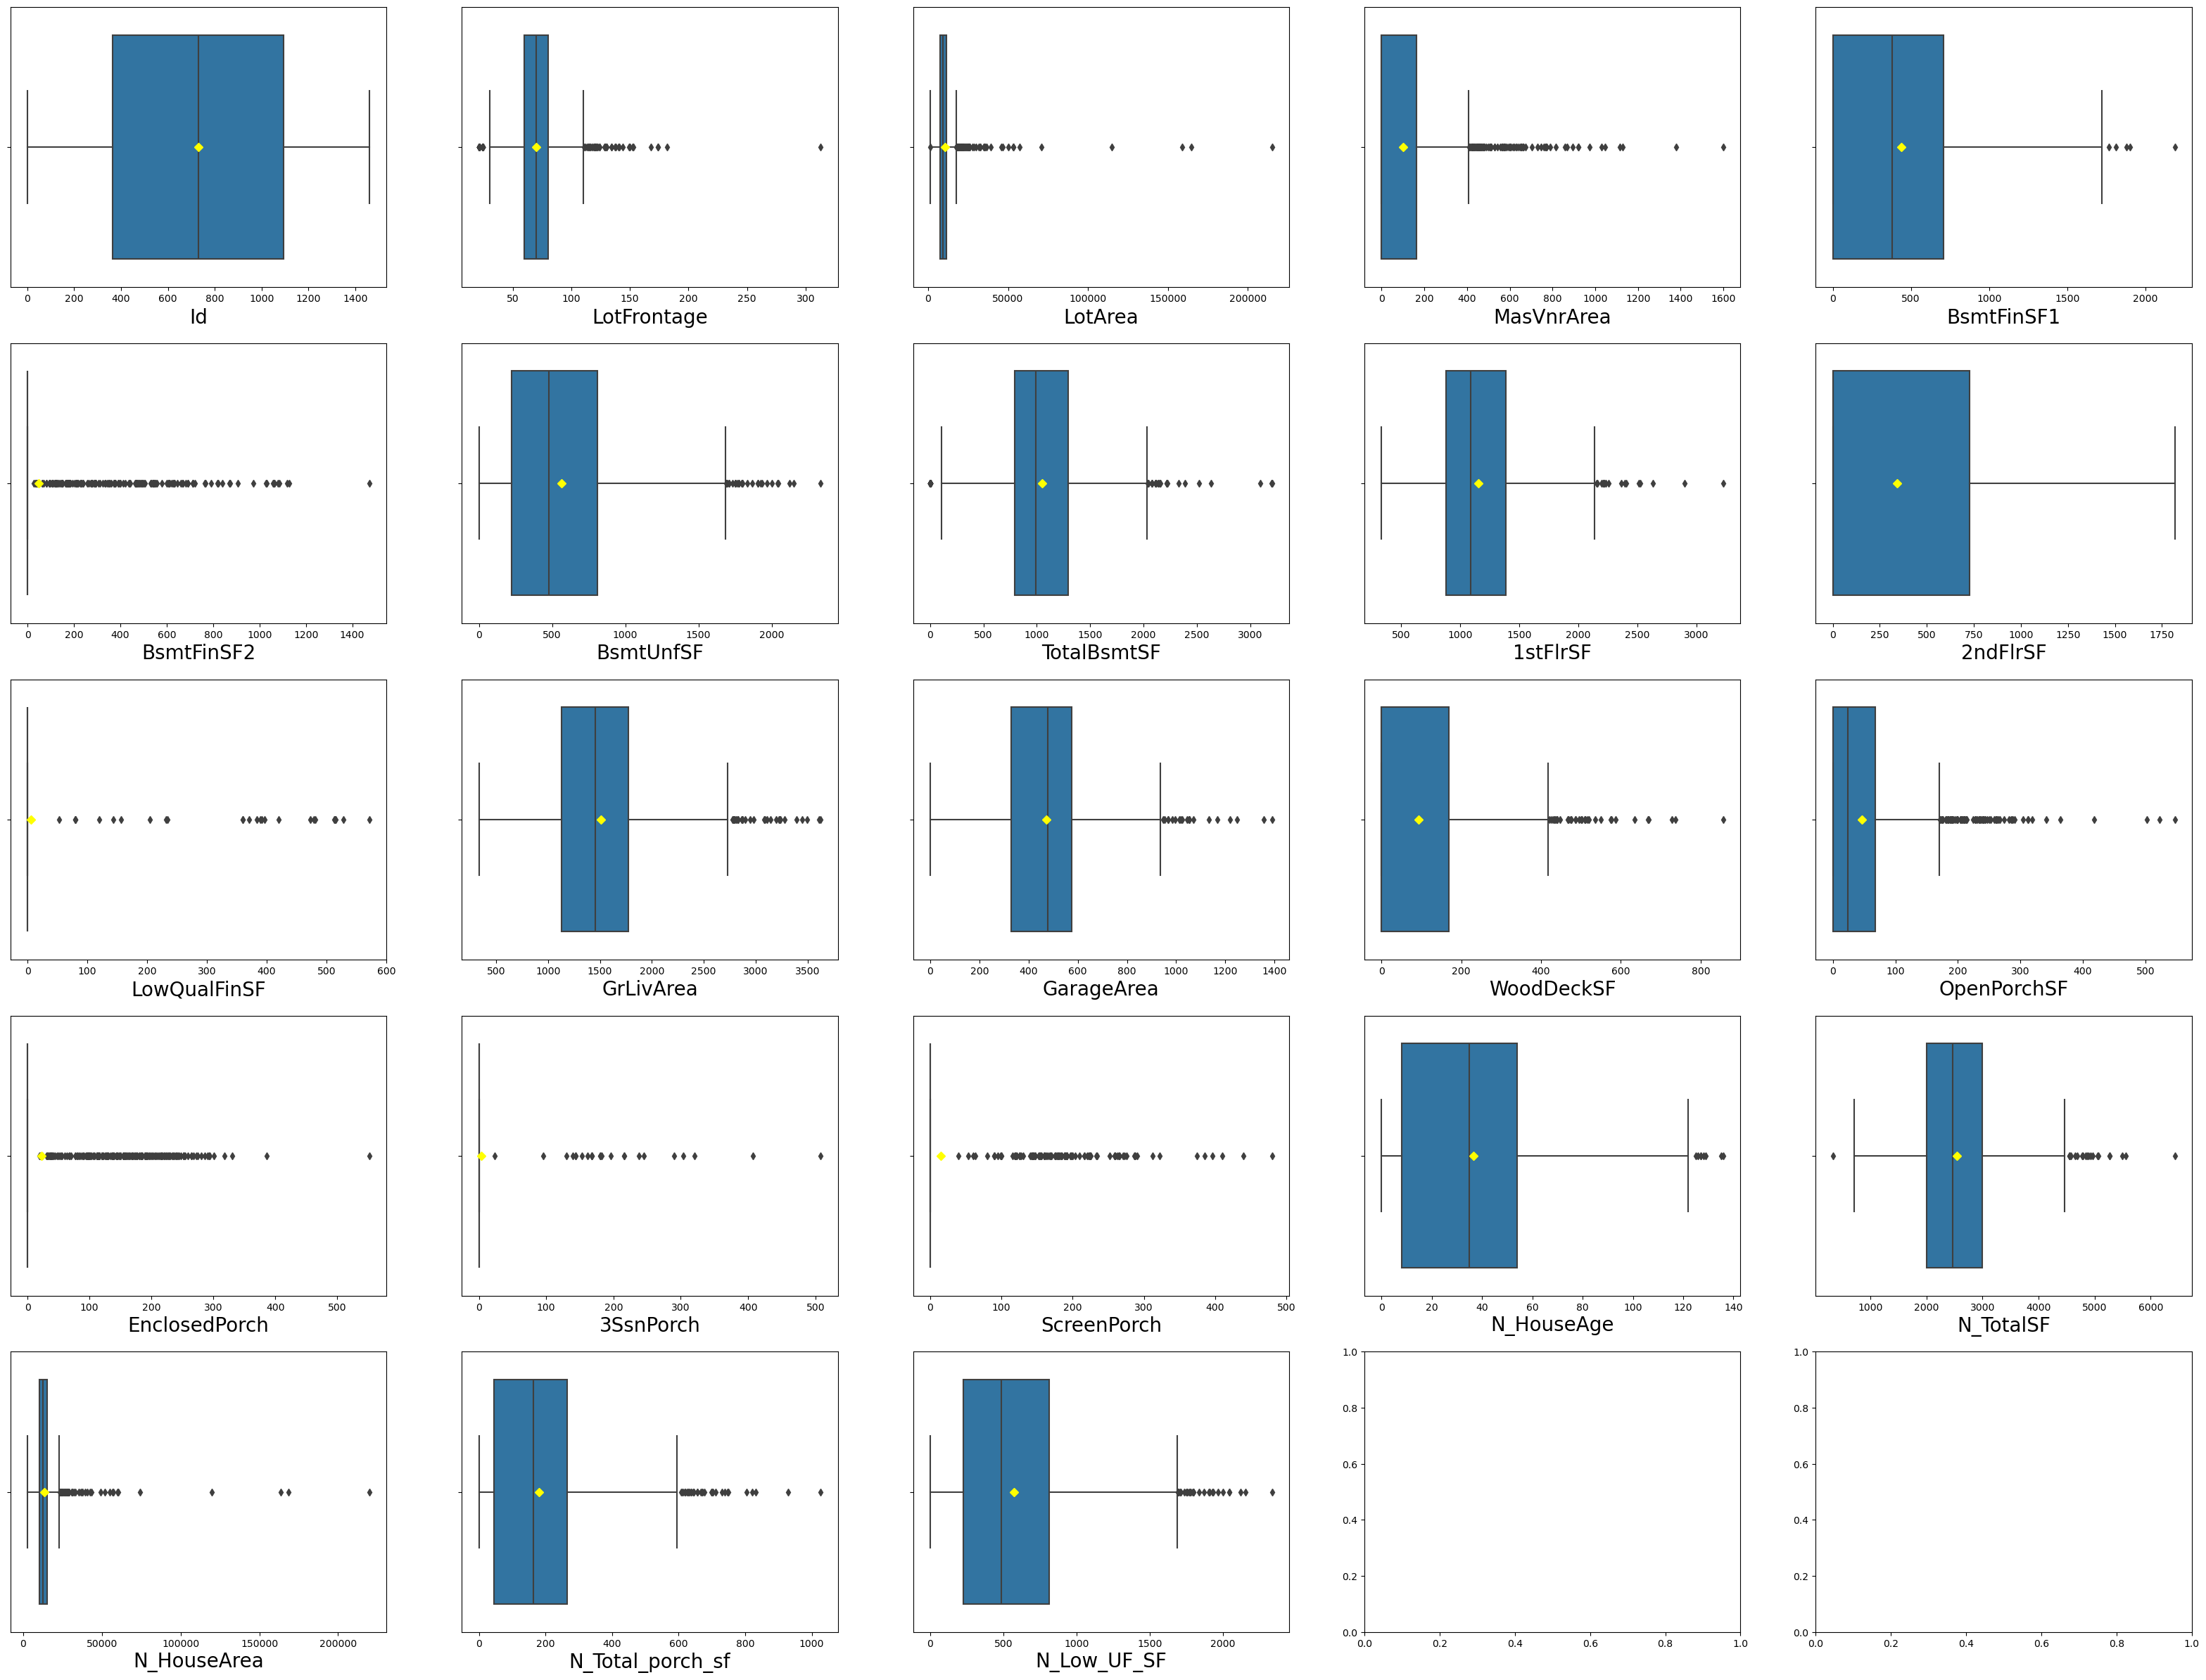

In [112]:
ncols = 5
nrows = int(np.ceil(len(outlier_cols)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 30))
for i, feature in enumerate(outlier_cols, 1):
    plt.subplot(nrows, ncols, i) 
    sns.boxplot(x=hp_train[feature], showmeans=True, meanprops={"marker":"D", "markerfacecolor":"yellow", "markeredgecolor":"yellow"})
    plt.xlabel(feature, size=20)
    
plt.show()


## 2.4. Fixing Skewness

Transforming skewed data using mathematical functions (e.g. logarithmic, square root, Box-Cox transformation) can sometimes improve model performance by making the data more symmetrical and closer to a normal distribution. These transformations can help satisfy assumptions of certain models.

Let's identify the features displaying major skewness that could influence the outcomes and apply a logarithmic transformation to those skewed values.

In [113]:
#compute skewness
skewed_feats = hp[num].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

BsmtFinSF2          2.741841
EnclosedPorch       2.736178
MasVnrArea          2.069921
OpenPorchSF         1.840973
WoodDeckSF          1.451313
N_HouseArea         1.410630
LotArea             1.341873
N_Total_porch_sf    1.171877
GrLivArea           1.013699
1stFlrSF            0.954909
N_Low_UF_SF         0.927823
BsmtUnfSF           0.919339
BsmtFinSF1          0.903757
2ndFlrSF            0.861675
N_TotalSF           0.775461
N_HouseAge          0.598609
LotFrontage         0.514884
TotalBsmtSF         0.469908
GarageArea          0.239257
Id                  0.000000
YearRemodAdd       -0.451020
GarageYrBlt        -0.457086
YearBuilt          -0.599806
LowQualFinSF             NaN
3SsnPorch                NaN
ScreenPorch              NaN
SalePrice                NaN
dtype: float64

In [114]:
skewed_feats = skewed_feats[skewed_feats > 0.50].index
skewed_feats

Index(['BsmtFinSF2', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'N_HouseArea', 'LotArea', 'N_Total_porch_sf', 'GrLivArea',
       '1stFlrSF', 'N_Low_UF_SF', 'BsmtUnfSF', 'BsmtFinSF1', '2ndFlrSF',
       'N_TotalSF', 'N_HouseAge', 'LotFrontage'],
      dtype='object')

In [115]:
#Checking if there is negative or 0 value in variables
for i in skewed_feats:
    if (hp[i] <=0).any():
        print(i)

for i in skewed_feats:
    #hp_train[i] +=1
    hp_train.loc[:, i] += 1
    hp.loc[:, i] += 1

BsmtFinSF2
EnclosedPorch
MasVnrArea
OpenPorchSF
WoodDeckSF
N_Total_porch_sf
N_Low_UF_SF
BsmtUnfSF
BsmtFinSF1
2ndFlrSF
N_HouseAge


The ***Box-Cox transformation*** method determines the optimal value of λ that maximises the normality of the transformed data. When applying the Box-Cox transformation to a dataset, we compute λ for each feature based on the training data and then apply the transformation to both the entire dataset using the λ values obtained from the training data.

In [116]:
hp.shape

(2919, 96)

In [117]:
lambda_values = {}
for var in skewed_feats:
    hp_train.loc[:, var], lambda_values[var] = boxcox(hp_train[var])

# Apply Box-Cox transformation using the lambdas from train data to both train and test data
for var in skewed_feats:
    transformed_col = boxcox(hp[var], lmbda=lambda_values[var])
    hp.loc[:, var + '_transformed'] = transformed_col
    hp.drop(var, axis = 1, inplace =True)


In [118]:
hp.shape

(2919, 96)

In [119]:
hp.head()

Id MSSubClass MSZoning Street Alley LotShape LandContour LotConfig  \
0  1.0         60       RL   Pave  None      Reg         Lvl    Inside   
1  2.0         20       RL   Pave  None      Reg         Lvl       FR2   
2  3.0         60       RL   Pave  None      IR1         Lvl    Inside   
3  4.0         70       RL   Pave  None      IR1         Lvl    Corner   
4  5.0         60       RL   Pave  None      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating  \
0       TA           No          GLQ          Unf        856.0    GasA   
1       TA           Gd          ALQ          Unf       1262.0    GasA   
2       TA           Mn          GLQ          Unf        920.0    GasA   
3       Gd           No          ALQ          Unf        756.0    GasA   
4       TA           Av          GLQ          Unf       1145.0    GasA   

  HeatingQC CentralAir Electrical  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0        Ex          Y      SBrkr             0           1.0           0.0   
1        Ex          Y      SBrkr             0           0.0           1.0   
2        Ex          Y      SBrkr             0           1.0           0.0   
3        Gd          Y      SBrkr             0           1.0           0.0   
4        Ex          Y      SBrkr             0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0        Typ           0        None     Attchd       2003.0          RFn   
1        Typ           1          TA     Attchd       1976.0          RFn   
2        Typ           1          TA     Attchd       2001.0          RFn   
3        Typ           1          Gd     Detchd       1998.0          Unf   
4        Typ           1          TA     Attchd       2000.0          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  3SsnPorch  \
0         2.0       548.0         TA         TA          Y          0   
1         2.0       460.0         TA         TA          Y          0   
2         2.0       608.0         TA         TA          Y          0   
3         3.0       642.0         TA         TA         

In [120]:
all_cols = hp.columns.tolist()

trans_cols = [cols for cols in all_cols if cols.endswith('_transformed')]
trans_cols

['BsmtFinSF2_transformed',
 'EnclosedPorch_transformed',
 'MasVnrArea_transformed',
 'OpenPorchSF_transformed',
 'WoodDeckSF_transformed',
 'N_HouseArea_transformed',
 'LotArea_transformed',
 'N_Total_porch_sf_transformed',
 'GrLivArea_transformed',
 '1stFlrSF_transformed',
 'N_Low_UF_SF_transformed',
 'BsmtUnfSF_transformed',
 'BsmtFinSF1_transformed',
 '2ndFlrSF_transformed',
 'N_TotalSF_transformed',
 'N_HouseAge_transformed',
 'LotFrontage_transformed']

Now if we check for outliers again, we’ll find that the remaining outliers have been taken care of.

In [121]:
outlier_rem = [col for col in outlier_cols if col not in skewed_feats]
print(outlier_rem, '\n')

check_outlier(hp, outlier_rem)
check_outlier(hp, trans_cols)

['Id', 'TotalBsmtSF', 'LowQualFinSF', 'GarageArea', '3SsnPorch', 'ScreenPorch'] 



## 2.5. Feature transformations

* This process aims to capture non-linear relationships or patterns that might not be adequately represented by the original linear features. 
* Creating more features by calculating the log and square transformations of our numerical features. 
* Doing this manually as ML models can't tell on its own if log(feature) or feature^2 is a predictor of the SalePrice.
* We can use this process to work on features
    * Which still have outliers present in them
    * Features that are highly skewed in nature
    * Feature that are highly correlated - Instead of dropping one, we can transform one and check if it still maintains its reltionship with the target variable. This way we will retain valuable information in highly correlated features

We saw below mentioned combinations being higly correlated and potentially causing multicollinearity. Will deal with them as below:
* ***(GarageCars & GarageArea)***: Will log transform GarageArea and keep GarageCars variable as is. This is because GarageCar has higher correlation with SalePrice.
* ***(TotalBsmtSF & 1stFlrSF)***: We have already box-cox transformed 1stFlrSF earlier while handling skewed variables. Will keep TotalBsmtSF as is as it has higher correlation with SalePrice.
* ***(GrLivArea, TotRmsAbvGrd)***: We have already box-cox transformed GrLivArea earlier while handling skewed variables. 
* ***(YearBuilt & GarageYrBlt)***: Will keep YearBuilt variable and drop GarageYrBlt. 

In [122]:
#Log transformation can sometimes improve model performance by making the data more symmetrical
#and closer to a normal distribution. These transformations can help satisfy assumptions of certain models.

hp['GarageArea'] = np.log1p(hp['GarageArea'])
hp.rename(columns={'GarageArea': 'GarageArea_log'}, inplace=True)

In [123]:
#Features to drop to avoid multicollinearity
hp.drop('GarageYrBlt', axis = 1, inplace = True)

## 2.6. Feature encoding

### A. Categorical - Ordinal Encoding

Given that more than half of our features are in a categorical format, and considering that the majority of machine learning algorithms require numerical inputs, it becomes necessary to transform or encode these non-numeric features.

I’ll focus on ordinal and nominal variables separately for encoding. This is to ensure I can preserve the respective information. 

***Encoding for Ordinal Features***
Ordinal variables exhibit a clear order or ranking among the categories. The order between categories is meaningful and interpretable. 

In [124]:
print(ordinal)

['Street', 'Alley', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'BsmtFullBath']


In [125]:
for col in ordinal:
    if col not in ['YrSold']:
        print(hp[col].value_counts(),'\n')

Street
Pave    2907
Grvl      12
Name: count, dtype: int64 

Alley
None    2721
Grvl     120
Pave      78
Name: count, dtype: int64 

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64 

LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64 

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64 

ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64 

BsmtQual
TA      1285
Gd      1209
Ex       258
Fa        88
None      79
Name: count, dtype: int64 

BsmtCond
TA      2609
Gd       122
Fa       104
None      79
Po         5
Name: count, dtype: int64 

BsmtExposure
No      1907
Av       418
Gd       276
Mn       239
None      79
Name: count, dtype: int64 

BsmtFinType1
Unf     851
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: count, dtype: int64 

BsmtFinType2
Unf     2494
Rec      105
LwQ       87
None      79
BLQ       68
ALQ       52
GLQ   

In [126]:
# #Apply LabelEncoder to categorical features
# for c in cols:
#    lbl = LabelEncoder()
#    lbl.fit(list(hp[c].values)) 
#    hp[c] = lbl.transform(list(hp[c].values))

First, I observed that a few variables had similar categories of values namely (Ex: Excellent, Gd: Good, TA: Average/Typical, Fa: Fair, Po: Poor, None: Doesn't exist). So instead of just applying label encoder directly, I customized encoding to make it more meaningful. I prepared a unified mapping for these columns and then encoded the variables according to the same.

***Ex:***  Excellent,  ***Gd:***  Good,  ***TA:***  Average/Typical,  ***Fa:***  Fair,  ***Po:***  Poor,  ***None:***  Doesn't exist

In [127]:
cols_w_scale = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
              'GarageQual', 'GarageCond']

#Define a unified mapping covering all categories from all above columns
unified_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None': -1}
# 'Ex': Excellent, 'Gd': Good, 'TA': Average/Typical, 'Fa': Fair, 'Po': Poor, 'None': Doesn't exist

# Create mapping for each column with the 'col' key
column_mappings = [{'col': col, 'mapping': unified_mapping} for col in cols_w_scale]
#column_mappings

encoder = ce.OrdinalEncoder(cols=cols_w_scale, mapping=column_mappings)
hp = encoder.fit_transform(hp)

hp.head()

Id MSSubClass MSZoning Street Alley LotShape LandContour LotConfig  \
0  1.0         60       RL   Pave  None      Reg         Lvl    Inside   
1  2.0         20       RL   Pave  None      Reg         Lvl       FR2   
2  3.0         60       RL   Pave  None      IR1         Lvl    Inside   
3  4.0         70       RL   Pave  None      IR1         Lvl    Corner   
4  5.0         60       RL   Pave  None      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  ExterQual  ExterCond Foundation  \
0     VinylSd     VinylSd    BrkFace          3          2      PConc   
1     MetalSd     MetalSd       None          2          2     CBlock   
2     VinylSd     VinylSd    BrkFace          3          2      PConc   
3     Wd Sdng     Wd Shng       None          2          2     BrkTil   
4     VinylSd     VinylSd    BrkFace          3          2      PConc   

   BsmtQual  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF  \
0         3         2           No          GLQ          Unf        856.0   
1         3         2           Gd          ALQ          Unf       1262.0   
2         3         2           Mn          GLQ          Unf        920.0   
3         2         3           No          ALQ          Unf        756.0   
4         3         2           Av          GLQ          Unf       1145.0   

  Heating  HeatingQC CentralAir Electrical  LowQualFinSF  BsmtFullBath  \
0    GasA          4          Y      SBrkr             0           1.0   
1    GasA          4          Y      SBrkr             0           0.0   
2    GasA          4          Y      SBrkr             0           1.0   
3    GasA          3          Y      SBrkr             0           1.0   
4    GasA          4          Y      SBrkr             0           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType GarageFinish  \
0             8        Typ           0           -1     Attchd          RFn   
1             6        Typ           1            2     Attchd          RFn   
2             6        Typ           1            2     Attchd          RFn   
3             7        Typ           1            3     Detchd          Unf   
4             9        Typ           1            2     Attchd          RFn   

   GarageCars  GarageArea_log  GarageQual  GarageCond PavedDrive  3SsnPorch  \
0         2.0        6.308098           2           2          Y          0   
1         2.0        6.133398           2           2          Y          0   
2         2.0        6.411818           2           2          Y          0   
3         3.0        6.466145           2           2          Y    

In [128]:
# #For all the columns below have done the replacement via category encoder as they had the same mappings
# hp.ExterQual = hp.ExterQual.replace({'Ex': 4,'Gd':3, 'TA':2, 'Fa':1})
# hp.ExterCond = hp.ExterCond.replace({'Ex': 4,'Gd':3, 'TA':2, 'Fa':1, 'Po': 0})
# hp.BsmtQual = hp.BsmtQual.replace({'Ex': 4,'Gd':3, 'TA':2, 'Fa':1,'None':-1})
# hp.BsmtCond = hp.BsmtCond.replace({'Gd':3, 'TA':2, 'Fa':1,'None':-1,'Po': 0})
# hp.HeatingQC = hp.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
# hp.KitchenQual = hp.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
# hp.FireplaceQu = hp.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
# hp.GarageQual = hp.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
# hp.GarageCond = hp.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
# hp.PoolQC = hp.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})

#These 2 columns have categories that show an order when taken into business context
hp.Street = hp.Street.replace({'Pave':2, 'Grvl':1})
hp.Alley = hp.Alley.replace({'Pave':2, 'Grvl': 1, 'None': 0})
hp.CentralAir = hp.CentralAir.replace({'Y':2, 'N': 1, 'None': 0})

#Rest of the ordinal variables replaced with labels to preserve the order
hp.LotShape = hp.LotShape.replace({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
hp.LandSlope = hp.LandSlope.replace({'Gtl':2, 'Mod':1, 'Sev':0})
hp.BsmtExposure = hp.BsmtExposure.replace({'Gd':4, 'Av':3, 'Mn':2,'No':1, 'None':0})
hp.BsmtFinType1 = hp.BsmtFinType1.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
hp.BsmtFinType2 = hp.BsmtFinType2.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
hp.Electrical = hp.Electrical.replace({'SBrkr':4, 'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0})
hp.Functional = hp.Functional.replace({'Typ':6, 'Min1':5, 'Min2':4, 'Mod':3, 'Maj1':2, 'Maj2':1, 'Sev':0})
hp.GarageFinish = hp.GarageFinish.replace({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})
hp.PavedDrive = hp.PavedDrive.replace({'Y':2, 'P':1, 'N':0})
hp.Fence = hp.Fence.replace({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})

In [129]:
print(ordinal) 
#All the ordinal variables converted to numerical form except for these below, which are either already numerical or year
#'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'Fireplaces','MoSold', 'YrSold'

['Street', 'Alley', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'BsmtFullBath']


In [130]:
#Simplification of existing features
hp["SimplOverallQual"] = hp.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 }) # good
hp["SimplOverallCond"] = hp.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 })# good

# hp_train["SimplPoolQC"] = hp_train.PoolQC.replace({1 : 1, 2 : 1, # average
#                                              3 : 2, 4 : 2 })# good
# hp_train["SimplGarageCond"] = hp_train.GarageCond.replace({1 : 1, # bad
#                                                      2 : 1, 3 : 1, # average
#                                                      4 : 2, 5 : 2 })# good
# hp_train["SimplGarageQual"] = hp_train.GarageQual.replace({1 : 1, # bad
#                                                      2 : 1, 3 : 1, # average
#                                                      4 : 2, 5 : 2 })# good
# hp_train["SimplFireplaceQu"] = hp_train.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 })# good
# hp_train["SimplFunctional"] = hp_train.Functional.replace({1 : 1, 2 : 1, # bad
#                                                      3 : 2, 4 : 2, # major
#                                                      5 : 3, 6 : 3, 7 : 3, # minor
#                                                      8 : 4 })# typical
# hp_train["SimplKitchenQual"] = hp_train.KitchenQual.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 })# good
# hp_train["SimplHeatingQC"] = hp_train.HeatingQC.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 })# good
# hp_train["SimplBsmtFinType1"] = hp_train.BsmtFinType1.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 })# living quarters
# hp_train["SimplBsmtFinType2"] = hp_train.BsmtFinType2.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 })# living quarters
# hp_train["SimplBsmtCond"] = hp_train.BsmtCond.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 })# good
# hp_train["SimplBsmtQual"] = hp_train.BsmtQual.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 })# good
# hp_train["SimplExterCond"] = hp_train.ExterCond.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 })# good
# hp_train["SimplExterQual"] = hp_train.ExterQual.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 })# good

In [131]:
print(hp['SimplOverallQual'].unique())

hp.drop(['OverallQual', 'OverallCond'], axis = 1, inplace = True)

[3 2 1]


### B. Categorical - Nominal Encoding

Now, will need to convert all categories of nominal variables into numeric types.

In [132]:
print(nominal)

['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'SaleType', 'SaleCondition', 'Data_type']


In [133]:
for col in nominal: 
    print(hp[col].value_counts(), '\n')

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64 

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64 

LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64 

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64 

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64 

Condition1
Norm      2511
Feed

Before encoding these features, I realize that some variables contain numerous categories. Also, there were variables where one category highly dominates the rest of others as the distribution is unbalanced. If these variables would be dummy encoded without reducing the categories, excessive number of dummy variables would be generated, causing high dimensionality issue.
To mitigate this problem, I've grouped categories within each variable under 'Others' label, if their value count is significantly low (less than 50). This is done to control the number of new columns that will be generated with respect to each category, when they go through dummy encoding process.

In [134]:
nominal.remove('Data_type')
for col in nominal:
    vc = hp[col].value_counts()
    cat_to_replace = vc[vc < 50].index.tolist() #Can try by making the threshold as 100 as well
    hp[col] = hp[col].apply(lambda x: 'Other' if x in cat_to_replace else x)

In [135]:
for col in nominal: 
    print(hp[col].value_counts(), '\n')

MSSubClass
20       1079
60        575
50        287
120       182
30        139
70        128
160       128
80        118
Other     113
90        109
190        61
Name: count, dtype: int64 

MSZoning
RL       2269
RM        460
FV        139
Other      51
Name: count, dtype: int64 

LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64 

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
Other        14
Name: count, dtype: int64 

Neighborhood
NAmes      443
CollgCr    267
Other      244
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
Name: count, dtype: int64 

Condition1
Norm      2511
Feedr      164
Other      102
Artery      92
RRAn        50
Name: count, dtype: int64 

Condition2
Norm     2889
Other      30
Name: count, dtype: int64 

BldgType
1Fam   

In [136]:
# hp.Heating = hp.Heating.replace({'GasW':"Others", 'Grav':"Others", 'Wall':"Others", 'OthW':"Others", 'Floor':"Others"})
# hp.Condition1 = hp.Condition1.replace({'RRAn':"Others", 'PosN':"Others", 'RRAe':"Others", 'PosA':"Others", 'RRNn':"Others",'RRNe':"Others"})
# hp.Condition2 = hp.Condition2.replace({'Feedr': 'Others','Artery': 'Others','RRAn':"Others", 'PosN':"Others", 'RRAe':"Others", 'PosA':"Others", 'RRNn':"Others"})
# hp.RoofMatl = hp.RoofMatl.replace({'Tar&Grv': 'Others','WdShake': 'Others', 'WdShngl': 'Others', 'Metal': 'Others', 'Membran': 'Others', 'Roll': 'Others', 'ClyTile': 'Others'})
# hp.Exterior1st = hp.Exterior1st.replace({'BrkComm': 'Others', 'AsphShn': 'Others', 'Stone': 'Others', 'CBlock': 'Others', 'ImStucc': 'Others'})
# hp.Exterior2nd = hp.Exterior2nd.replace({'Brk Cmn': 'Other', 'AsphShn': 'Other', 'Stone': 'Other', 'CBlock': 'Other', 'ImStucc': 'Other'})
# hp.Foundation = hp.Foundation.replace({'Slab': 'Others', 'Stone': 'Others', 'Wood': 'Others'})
# hp.Heating = hp.Heating.replace({'GasW': 'Others', 'Grav': 'Others', 'Wall': 'Others', 'OthW': 'Others', 'Floor': 'Others'})
# hp.GarageType = hp.GarageType.replace({'Basment': 'Others', '2Types': 'Others', 'CarPort': 'Others'})
# hp.MiscFeature = hp.MiscFeature.replace({'Shed': 'Others', 'Gar2': 'Others', 'Othr': 'Others', 'TenC': 'Others'})
# hp.SaleType = hp.SaleType.replace({'ConLD': 'Others', 'CWD': 'Others', 'ConLI': 'Others', 'ConLw': 'Others', 'Oth': 'Others', 'Con': 'Others'})


### C. Categorical Features - One Hot Encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format that machine learning algorithms can understand. It involves using pd.get_dummies to transform categorical data into a binary columns, called dummy variables. A new binary column is created for each unique category in the original categorical feature, assigning 1 or 0 to indicate the presence or absence of a particular category in each observation. 

This method avoids imposing any ordinal relationship between categories, making it suitable for models that cannot interpret categorical data directly. 

* Variables left for encoding - Nominal variables
* Variables encoded - Continuous variables, Ordinal variables

In [137]:
hp.shape

(2919, 95)

In [138]:
hp.head()

Id MSSubClass MSZoning  Street  Alley  LotShape LandContour LotConfig  \
0  1.0         60       RL       2      0         3         Lvl    Inside   
1  2.0         20       RL       2      0         3         Lvl       FR2   
2  3.0         60       RL       2      0         2         Lvl    Inside   
3  4.0         70       RL       2      0         2         Lvl    Corner   
4  5.0         60       RL       2      0         2         Lvl       FR2   

   LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          2      CollgCr       Norm       Norm     1Fam     2Story   
1          2        Other      Feedr       Norm     1Fam     1Story   
2          2      CollgCr       Norm       Norm     1Fam     2Story   
3          2      Crawfor       Norm       Norm     1Fam     2Story   
4          2      NoRidge       Norm       Norm     1Fam     2Story   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0    BrkFace          3          2      PConc         3         2   
1       None          2          2     CBlock         3         2   
2    BrkFace          3          2      PConc         3         2   
3       None          2          2     BrkTil         2         3   
4    BrkFace          3          2      PConc         3         2   

   BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF Heating  HeatingQC  \
0             1             6             1        856.0    GasA          4   
1             4             5             1       1262.0    GasA          4   
2             2             6             1        920.0    GasA          4   
3             1             5             1        756.0    GasA          3   
4             3             6             1       1145.0    GasA          4   

   CentralAir  Electrical  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0           2           4             0           1.0           0.0         2   
1           2           4             0           0.0           1.0         2   
2           2           4             0           1.0           0.0         2   
3           2           4             0           1.0           0.0         1   
4           2           4             0           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            3             8   
1         0             3             1            2             6   
2         1             3             1            3             6   
3         0             3             1            3             7   
4         1             4             1            3             9   

   Functional  Fireplaces  FireplaceQu GarageType  GarageFinish  GarageCars  \
0           6           0           -1     Attchd             2         2.0   
1           6           1            2     Attchd             2         2.0   
2           6           1            2     Attchd             2         2.0   
3           6           1            3     Detchd             1         3.0   
4           6           1            2     Attchd             2         3.0   

   GarageArea_log  GarageQual  GarageCond  PavedDrive  3SsnPorch  ScreenPorch  \
0        6.308098           2           2           2          0            0   
1        6.133398           2           2           2          0            0   
2        6.411818           2           2           2          0            0   
3        6.466145           2           2           2          0            0 

In [139]:
hp = pd.get_dummies(hp, columns = nominal).reset_index(drop=True)
hp.head()

Id  Street  Alley  LotShape  LandSlope  YearBuilt  YearRemodAdd  \
0  1.0       2      0         3          2       2003          2003   
1  2.0       2      0         3          2       1976          1976   
2  3.0       2      0         2          2       2001          2002   
3  4.0       2      0         2          2       1915          1970   
4  5.0       2      0         2          2       2000          2000   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          2         3         2             1             6   
1          2          2         3         2             4             5   
2          3          2         3         2             2             6   
3          2          2         2         3             1             5   
4          3          2         3         2             3             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  CentralAir  Electrical  LowQualFinSF  \
0             1        856.0          4           2           4             0   
1             1       1262.0          4           2           4             0   
2             1        920.0          4           2           4             0   
3             1        756.0          3           2           4             0   
4             1       1145.0          4           2           4             0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            3             8           6           0           -1   
1            2             6           6           1            2   
2            3             6           6           1            2   
3            3             7           6           1            3   
4            3             9           6           1            2   

   GarageFinish  GarageCars  GarageArea_log  GarageQual  GarageCond  \
0             2         2.0        6.308098           2           2   
1             2         2.0        6.133398           2           2   
2             2         2.0        6.411818           2           2   
3             1         3.0        6.466145           2           2   
4             2         3.0        6.729824           2           2   

   PavedDrive  3SsnPorch  ScreenPorch  Fence  MoSold  YrSold  SalePrice  \
0           2          0            0      0       2    2008  12.247694   
1           2          0            0      0       5    2007  12.109011   
2           2          0            0      0       9    2008  12.317167   
3           2          0            0      0       2    2006  11.849398   
4           2          0            0      0      12    2008  12.429216   

  Data_type  N_HasWoodDeck  N_HasOpenPorch  N_HasEnclosedPorch  \
0     Train              0               1                   0   
1     Train              1               0                   0   
2     Train              0               1                   0   
3     Train              0               1                   1   
4     Train              1               1                   0   

   N_Has3SsnPorch  N_HasScreenPorch  N_Haspool  N_Has2ndfloor  N_Hasgarage  \
0               0                 0          0              1            1   
1               0                 0          0              0            1   
2               0                 0          0              1            1   
3               0                 0          0              1            1   
4               0                 0          0              1           

In [140]:
hp.shape

(2919, 181)

Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

## Dividing data into Train & Test sets

In [141]:
hp_train = hp[hp['Data_type'] == 'Train']
hp_test = hp[hp['Data_type'] == 'Test']

hp_train.drop('Data_type', axis = 1, inplace = True)
hp_test.drop('Data_type', axis = 1, inplace = True)

y_train = hp_train['SalePrice']
X_train = hp_train.drop(columns=['SalePrice'])
y_test = hp_test['SalePrice']
X_test = hp_test.drop(columns=['SalePrice'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/0_/hkxp5tnx7ls1223y5s_0vk700000gn/T/ipykernel_25277/623473564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_train.drop('Data_type', axis = 1, inplace = True)
/var/folders/0_/hkxp5tnx7ls1223y5s_0vk700000gn/T/ipykernel_25277/623473564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_test.drop('Data_type', axis = 1, inplace = True)


In [142]:
hp_train.shape

(1460, 180)

## 2.7. Standardization

Finally, before we start working on model building, will perform one last process called standardization. Log or Box-Cox transformations might resolve skewness or non-linear relationships, but they don't necessarily standardize the scales of features. Features might still have varying scales, impacting certain algorithms. 

Standardization is a technique used to bring numerical features onto a standard scale, ensuring that all features have a mean of 0 and a standard deviation of 1. It is also known as Z-score normalization, where it transforms numerical data by subtracting the mean and dividing by the standard deviation. 

***Key Benefits of Standardization:***
* Ensures all features are on the same scale, preventing certain features from dominating the learning process due to their larger magnitude.
* While changing the scale, it maintains the original relationships between data points.
* Assists many Machine Learning algorithms:
    * Gradient Descent-based algorithms: Facilitates faster convergence in optimization algorithms by ensuring that the steps taken during optimization are more balanced across features.
    * Certain algorithms, like SVM, KNN, and neural networks, are sensitive to feature scales. Standardization can assist in improving the performance of these algorithms.
    * For models like Linear Regression, standardization ensures that coefficients have the same scale, aiding in the correct interpretation of feature importance.

***Reasons for performing standardization after splitting:***
* ***Preventing Data Leakage:*** Performing standardization on the entire dataset before splitting might introduce information from the test set into the training set, leading to biased evaluation and overestimation of model performance.
* ***Mimicking Real-world Scenarios:*** In real-world scenarios, the model deals with unseen data during training. Separating the test set before preprocessing simulates this scenario more accurately.
* It's crucial to ensure that the target variable is not included in the scaling process to prevent any data leakage.

* Numerical categorical variables don't require standardization because they don't express a magnitude or level in a way that necessitates scaling.

* Standardization is typically applied to continuous numerical variables whose values represent quantities or measurements on a consistent scale. 

* However, if the numerical categorical variable behaves like an ordinal variable (i.e., it represents ordered categories with a meaningful sequence), and the categories have a relationship based on magnitude or levels, standardization might be considered. Yet, in most scenarios, categorical variables, whether numerical or not, are left as they are or undergo encoding techniques suitable for categorical data, such as one-hot encoding or label encoding, rather than standardization.

In [143]:
print(list(X_train))

['Id', 'Street', 'Alley', 'LotShape', 'LandSlope', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea_log', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'N_HasWoodDeck', 'N_HasOpenPorch', 'N_HasEnclosedPorch', 'N_Has3SsnPorch', 'N_HasScreenPorch', 'N_Haspool', 'N_Has2ndfloor', 'N_Hasgarage', 'N_Hasbsmt', 'N_Hasfireplace', 'N_Remodeled', 'N_YearsSinceRemodel', 'N_Total_Bathrooms', 'N_Total_Home_Quality', 'BsmtFinSF2_transformed', 'EnclosedPorch_transformed', 'MasVnrArea_transformed', 'OpenPorchSF_transformed', 'WoodDeckSF_transformed', 'N_HouseArea_transformed', 'LotArea_transformed', 'N_

In [144]:
cols_std = ['TotalBsmtSF','LowQualFinSF', 'GarageArea_log', '3SsnPorch', 'ScreenPorch','BsmtFinSF2_transformed', 
            'EnclosedPorch_transformed', 'MasVnrArea_transformed', 'OpenPorchSF_transformed', 'WoodDeckSF_transformed',
            'N_HouseArea_transformed', 'LotArea_transformed', 'N_Total_porch_sf_transformed', 'GrLivArea_transformed',
            '1stFlrSF_transformed', 'N_Low_UF_SF_transformed', 'BsmtUnfSF_transformed', 'BsmtFinSF1_transformed', 
            '2ndFlrSF_transformed', 'N_TotalSF_transformed', 'LotFrontage_transformed','N_HouseAge_transformed']

In [145]:
scaler = StandardScaler()

scaler.fit(X_train[cols_std]) # Fit the scaler on the training data

# Transform the dataset using the scaler fitted on the training set
X_train_scaled = scaler.transform(X_train[cols_std])
X_test_scaled = scaler.transform(X_test[cols_std])

# hp[final_og_cols] = scaler.fit_transform(hp[final_og_cols])

There is no hard and fast rule about standardizing transformed variables. Before applying standardization to transformed variables, carefully assess the modeling technique, assumptions of the model, and the trade-offs between standardization and interpretability to determine whether it is suitable for your analysis.